In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as px
from plotly.offline import iplot
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [4]:
#Load the dataset
data=pd.read_csv("D:\\internship\\train.csv")

In [5]:
data

date  store  item  sales
0       2013-01-01      1     1     13
1       2013-01-02      1     1     11
2       2013-01-03      1     1     14
3       2013-01-04      1     1     13
4       2013-01-05      1     1     10
...            ...    ...   ...    ...
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

[913000 rows x 4 columns]

# Exploratory Data Analysis

In [6]:
#dataset description
data.describe()

store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000     231.000000

In [7]:
#Checking the column informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [8]:
#Checking the dimensiality
data.shape

(913000, 4)

In [9]:
data['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [10]:
data['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

#Observations
1.Date column is in object format,So need to convert it into series.
2.10 stores and 50 items details are here
3.Sales column contains zero values,that means some items didn't sell on some days.

# Data Preprocessing

In [11]:
#Checking for missing values
data.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [12]:
data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [13]:
data['date']=pd.to_datetime(data['date'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [15]:
# Find the starting and ending dates
start_date = data['date'].min()
end_date = data['date'].max()

In [16]:
start_date

Timestamp('2013-01-01 00:00:00')

In [17]:
end_date

Timestamp('2017-12-31 00:00:00')

In [18]:
#No of items in each store
data.groupby(['store'])['item'].nunique()

store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

In [19]:
# extract year, month, and day
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [20]:
data

date  store  item  sales  year  month  day
0      2013-01-01      1     1     13  2013      1    1
1      2013-01-02      1     1     11  2013      1    2
2      2013-01-03      1     1     14  2013      1    3
3      2013-01-04      1     1     13  2013      1    4
4      2013-01-05      1     1     10  2013      1    5
...           ...    ...   ...    ...   ...    ...  ...
912995 2017-12-27     10    50     63  2017     12   27
912996 2017-12-28     10    50     59  2017     12   28
912997 2017-12-29     10    50     74  2017     12   29
912998 2017-12-30     10    50     62  2017     12   30
912999 2017-12-31     10    50     82  2017     12   31

[913000 rows x 7 columns]

In [21]:
data['year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [22]:
data['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [23]:
#Sort sales based on store,item and date of sales
data.sort_values(by=['store', 'item', 'date'], axis=0, inplace=True)

In [24]:
#Heatmap of total sales details of each store

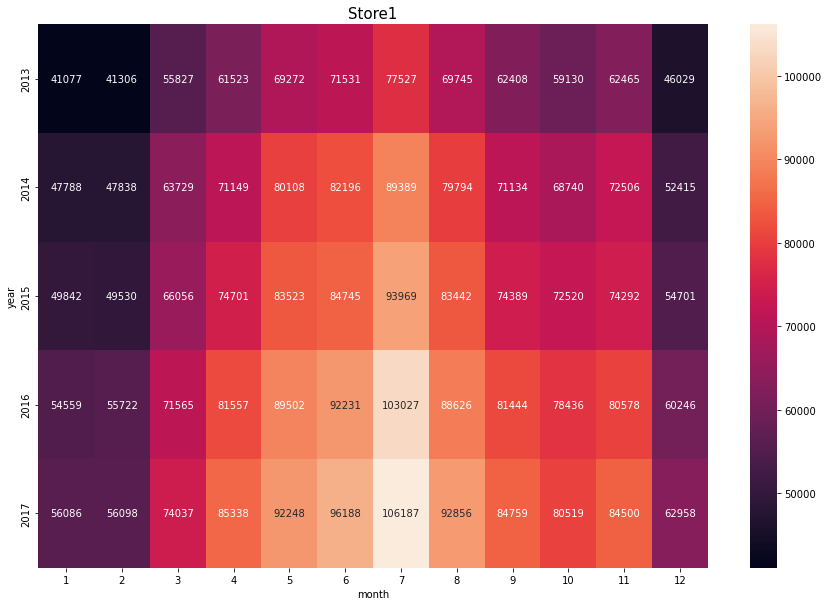

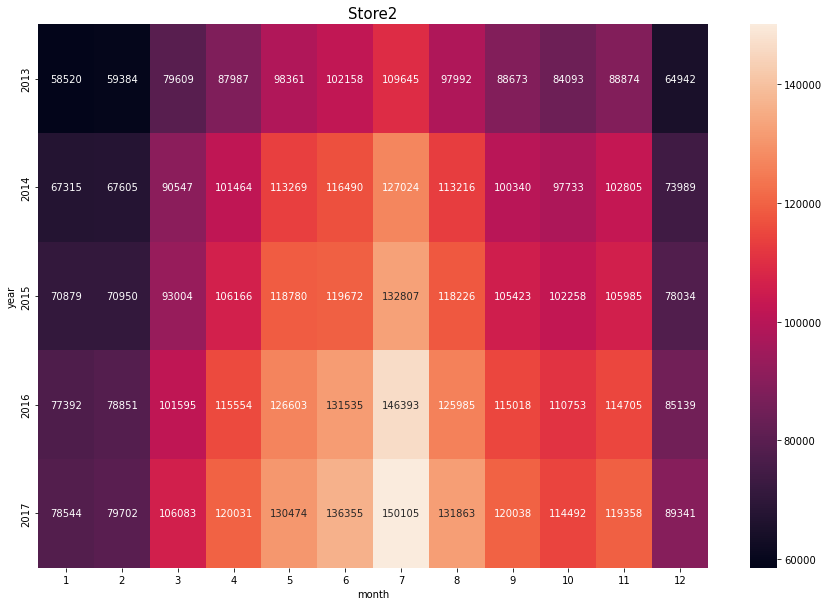

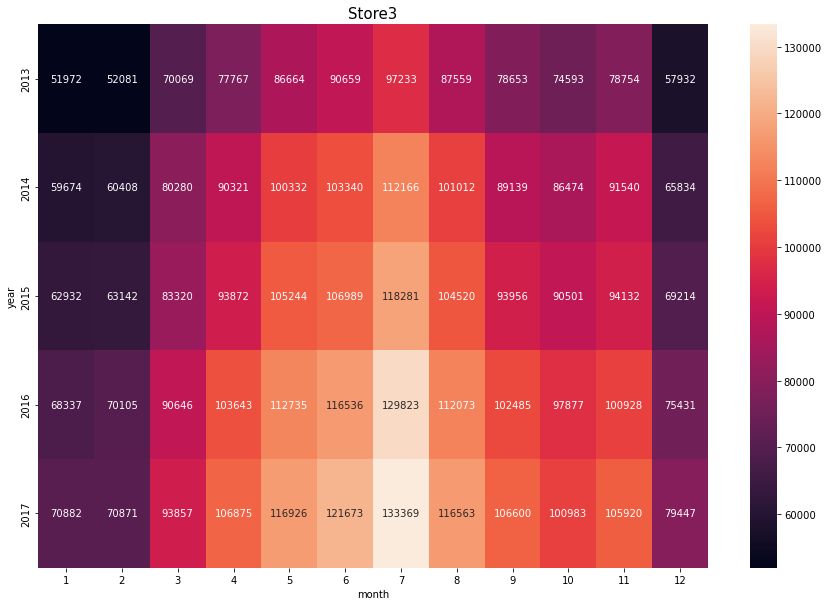

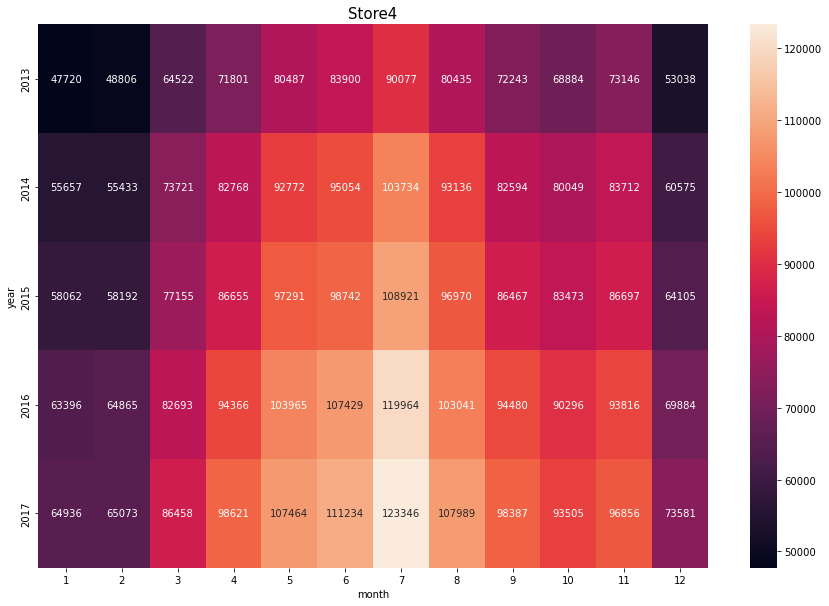

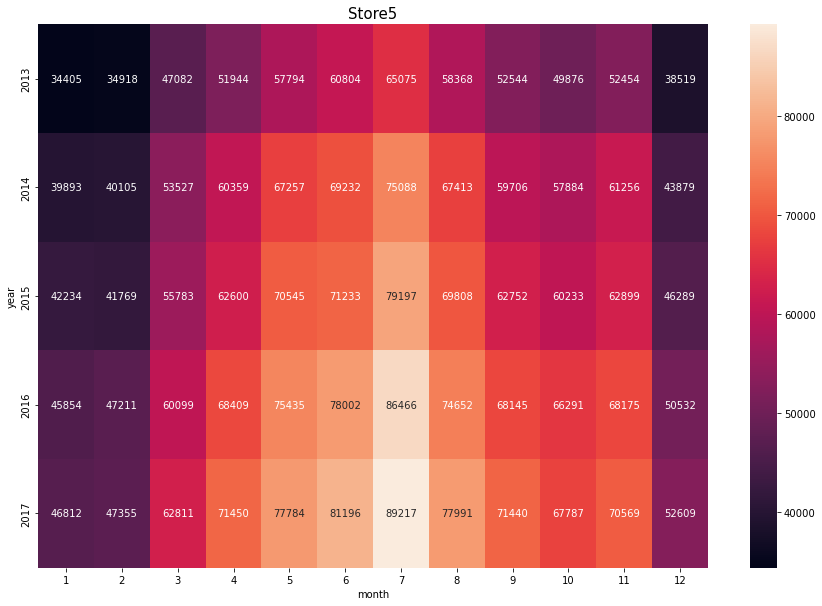

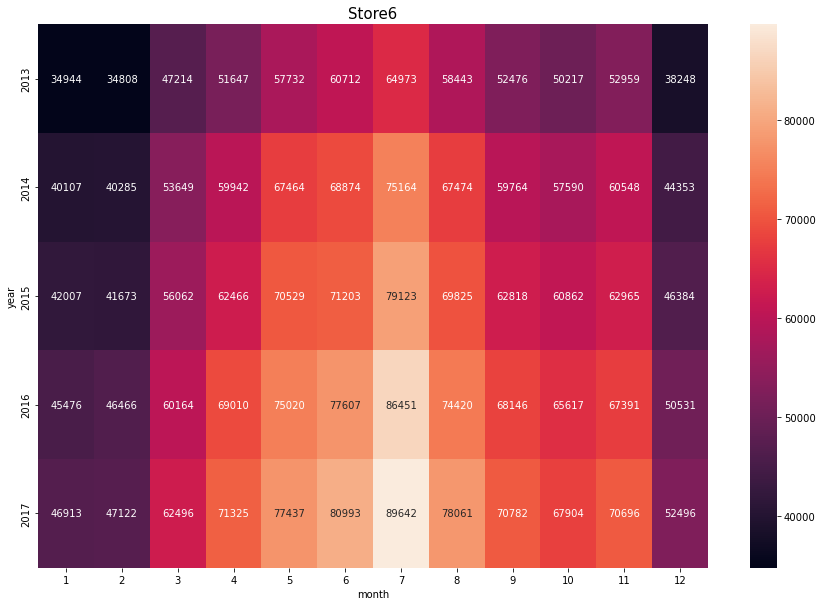

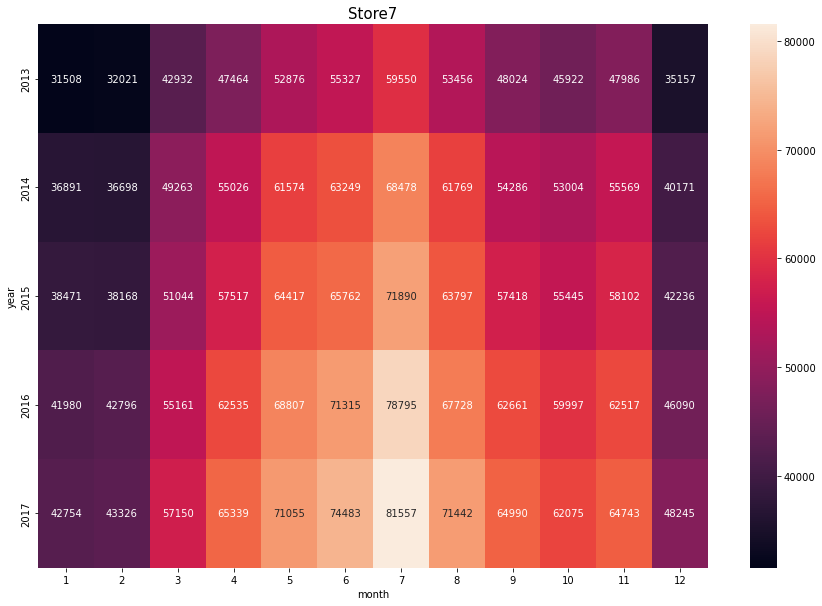

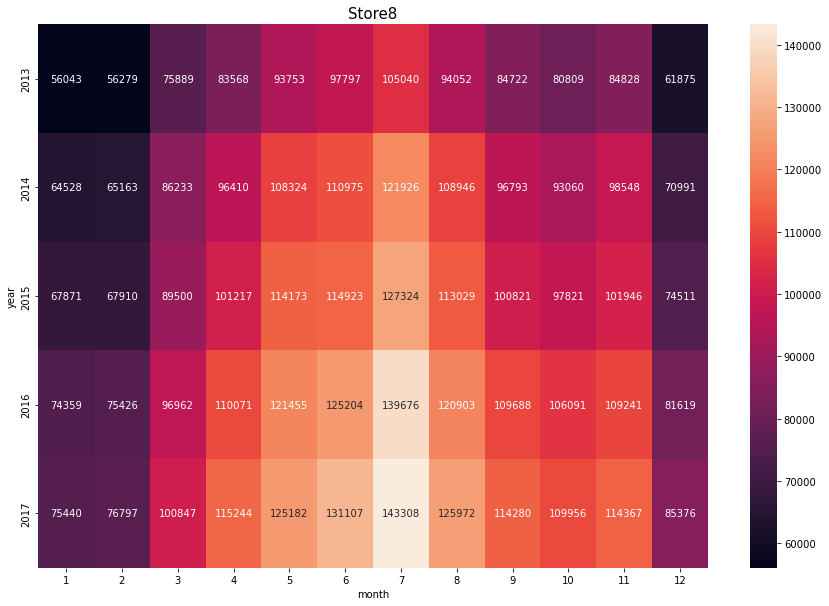

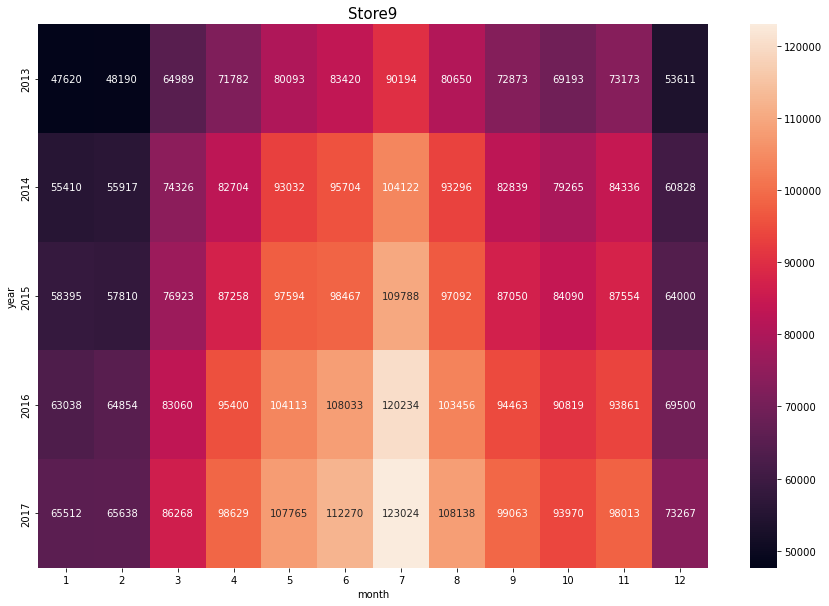

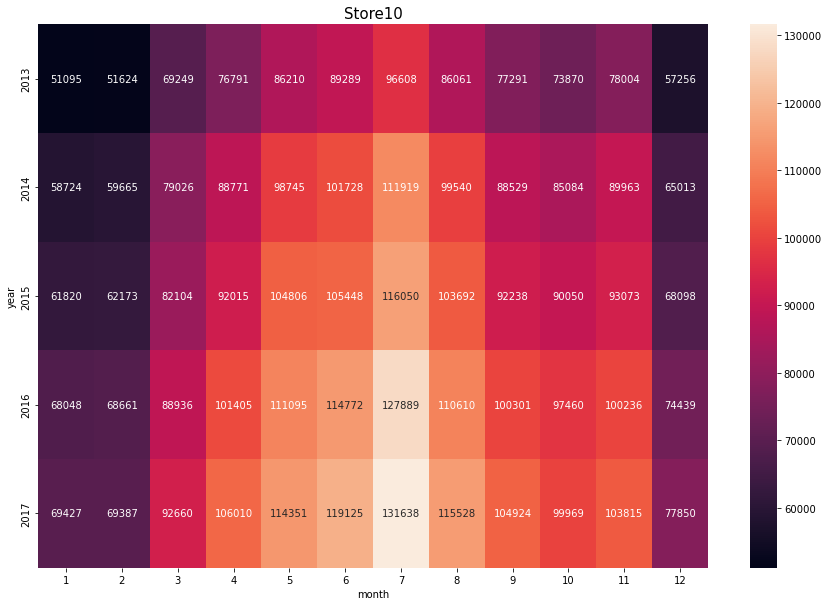

In [23]:
for i in data['store'].unique():
    store_value=data[data['store']==i]
    plt.figure(figsize=(15,10))
    heatmap_sales=pd.pivot_table(data=store_value,values='sales', index ='year',columns =['month'],aggfunc = np.sum)
    sns.heatmap(heatmap_sales,annot=True,fmt='g')
    plt.title('Store'+ str(i), fontsize = 15)
    plt.show()

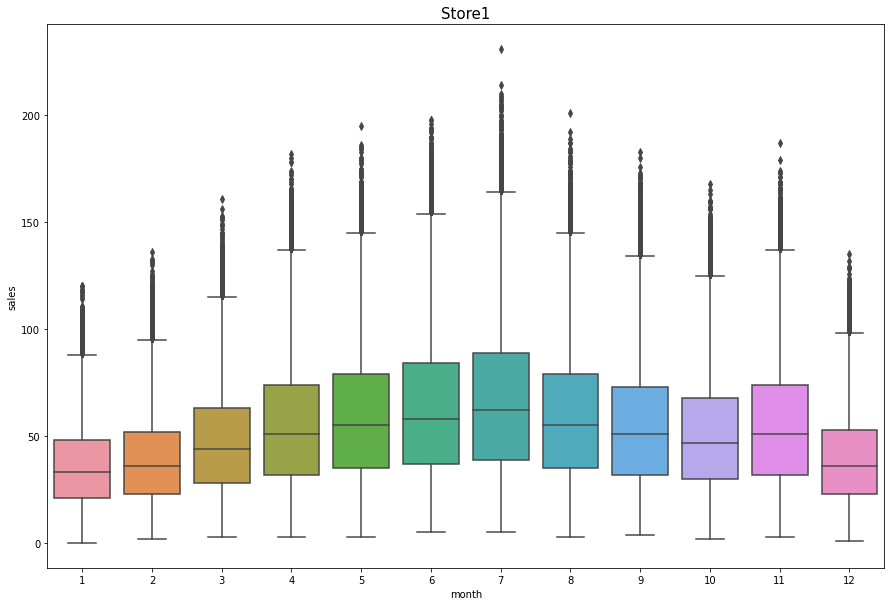

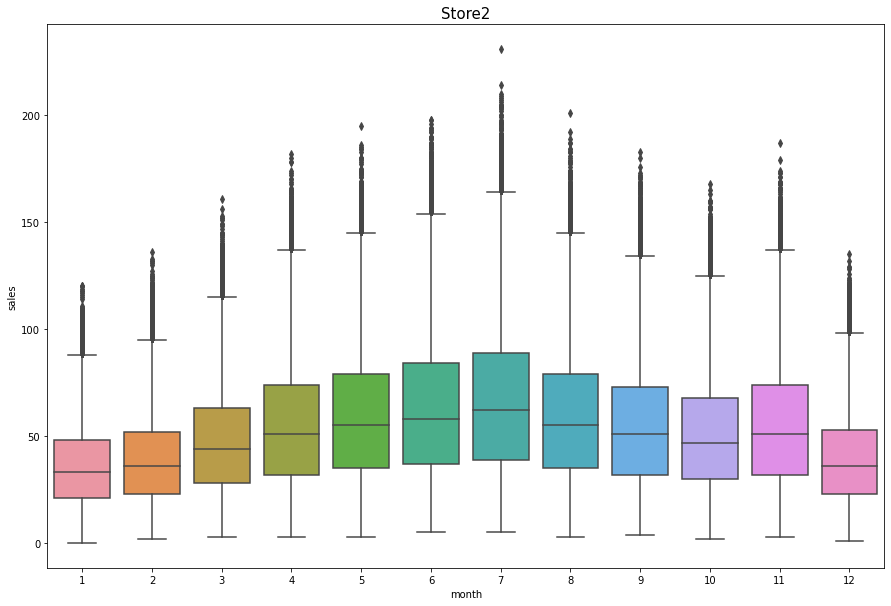

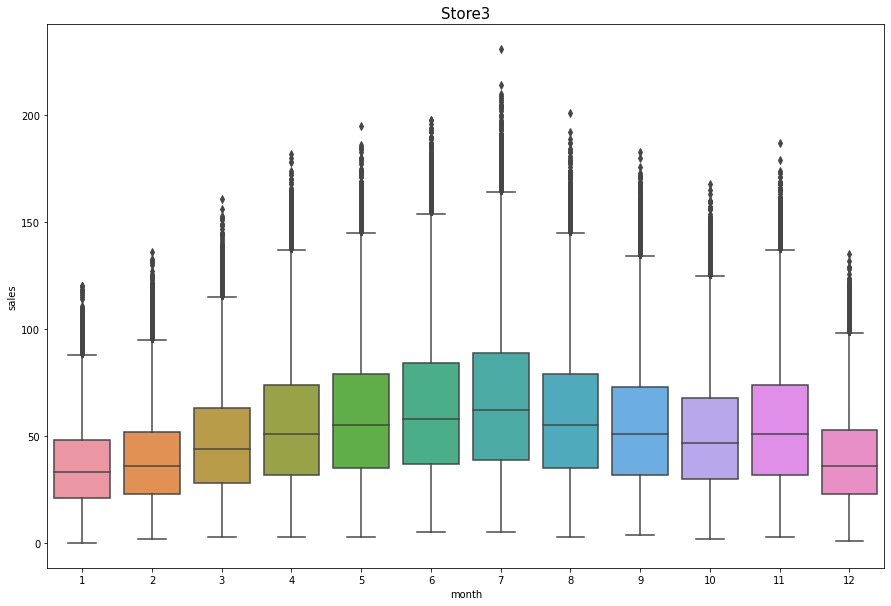

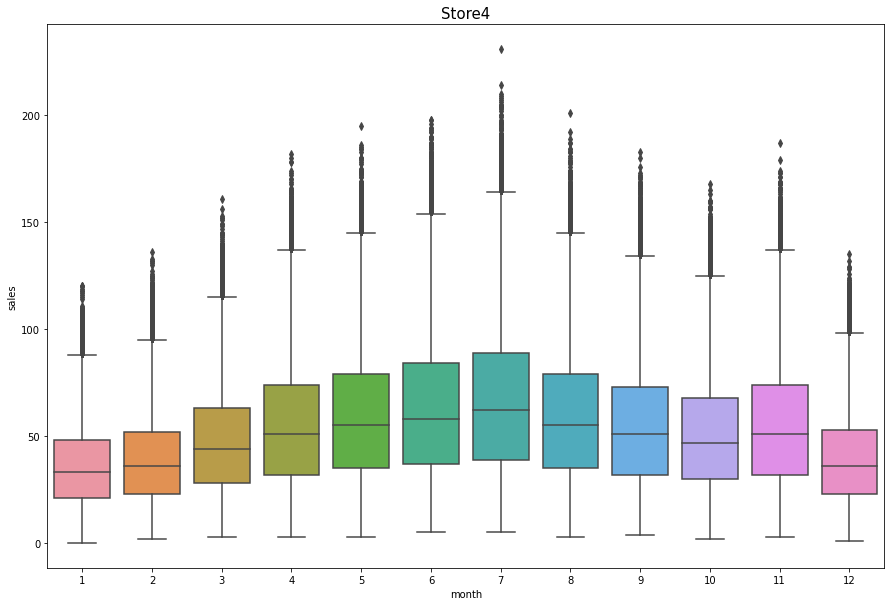

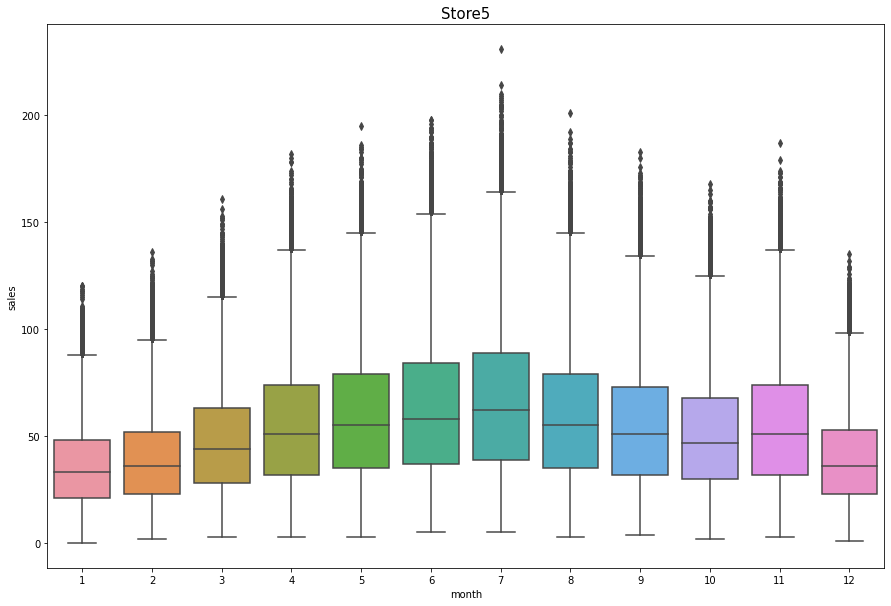

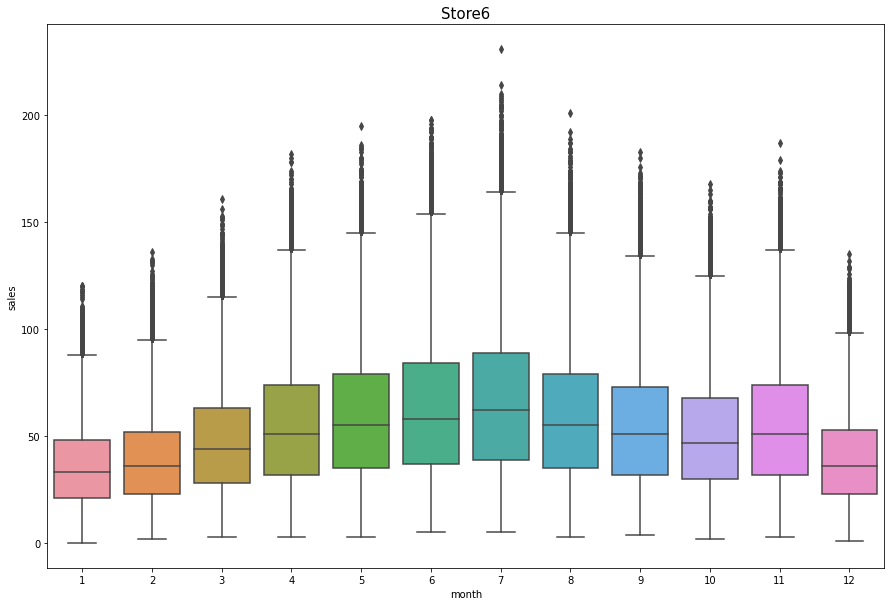

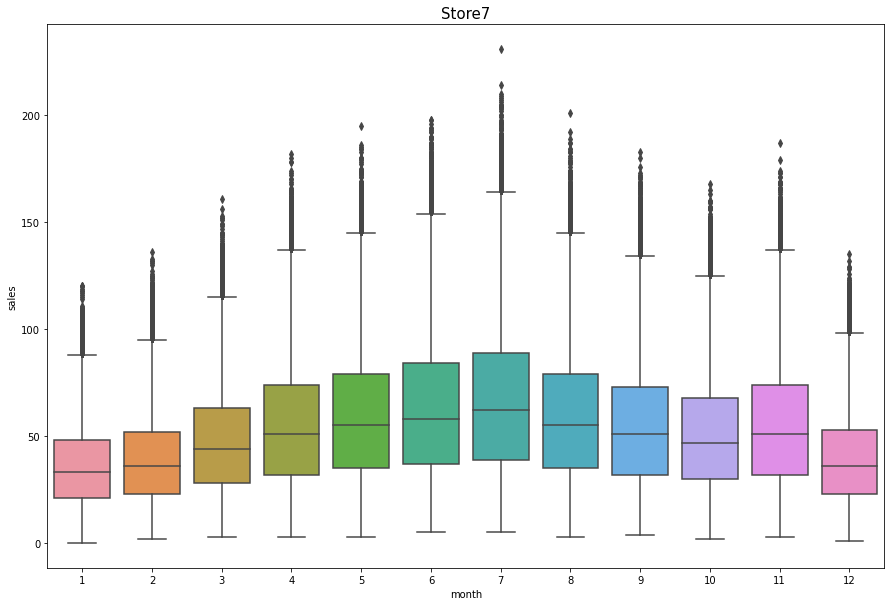

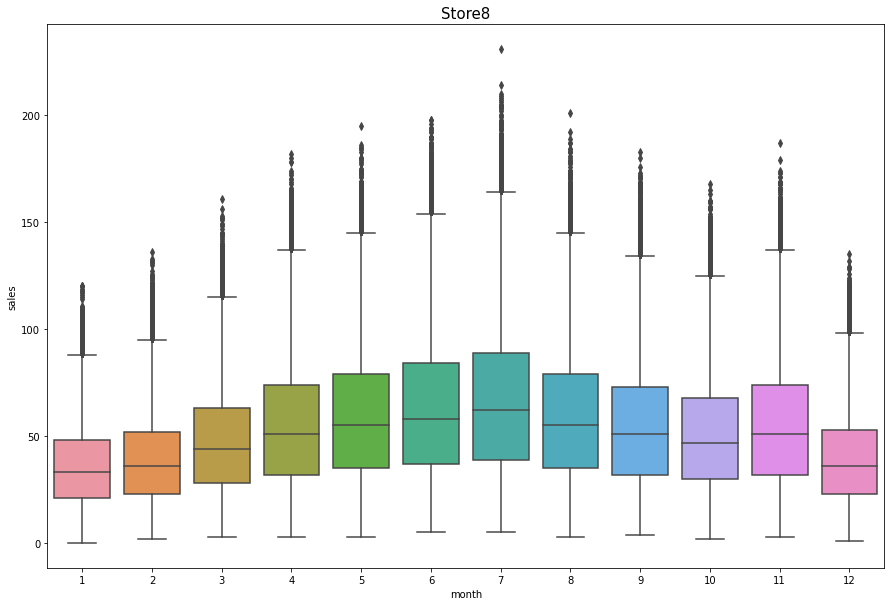

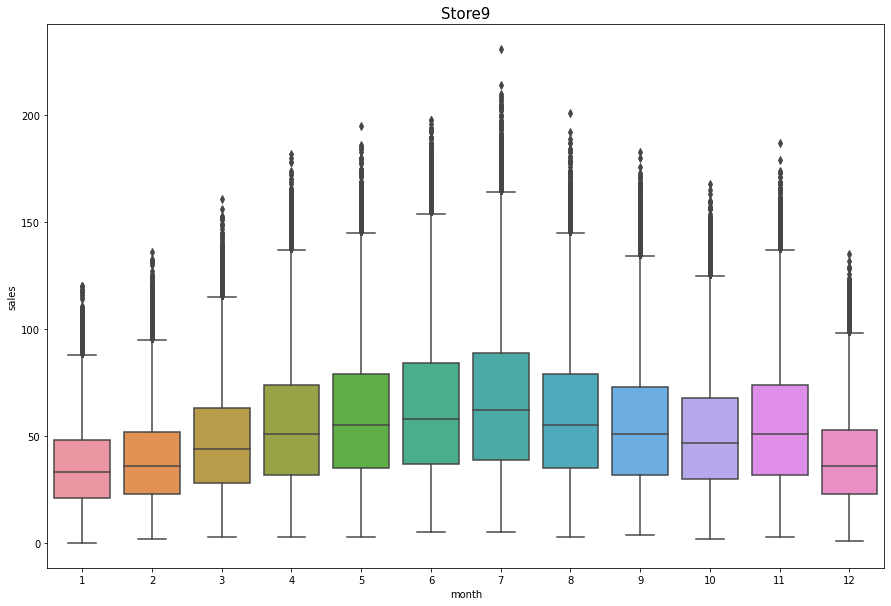

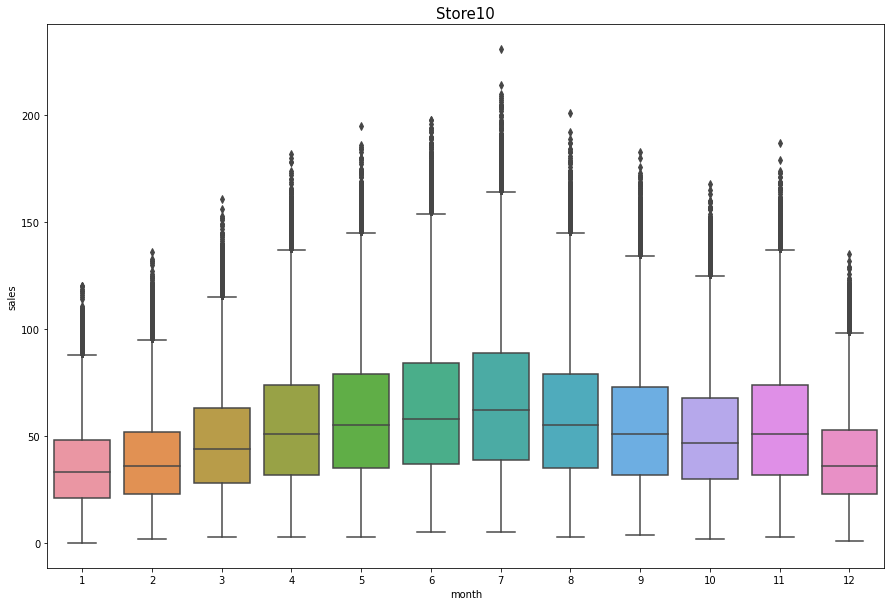

In [21]:
#Boxplot of monthly sales of each store
for i in data['store'].unique():
    store_value=data[data['store']==i]
    plt.figure(figsize=(15,10))
    sns.boxplot(x='month',y='sales',data=data)
    plt.title('Store'+ str(i), fontsize = 15)
    plt.show()

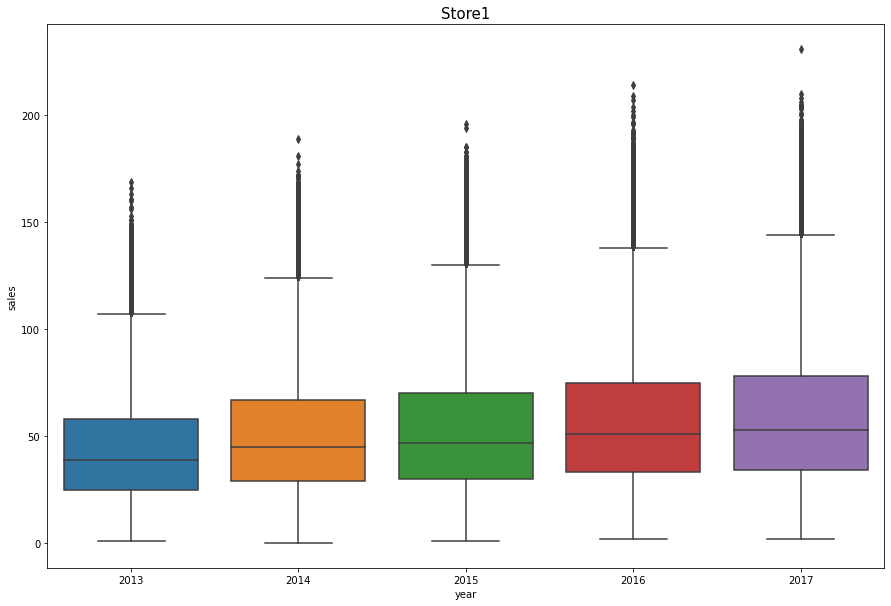

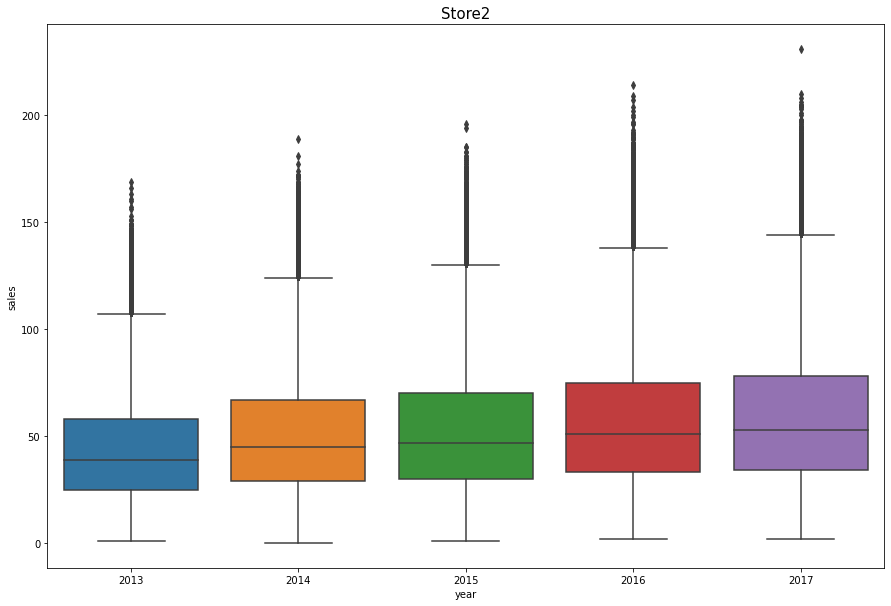

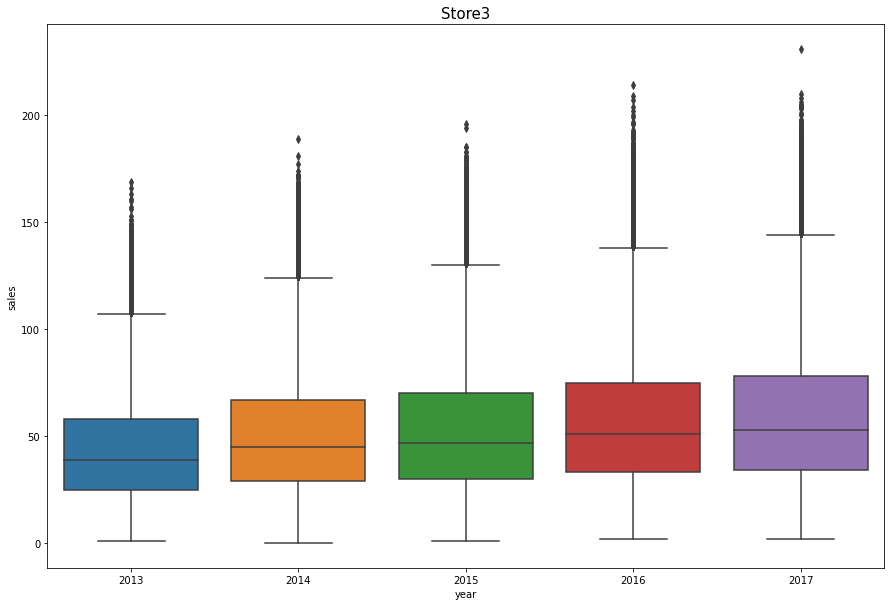

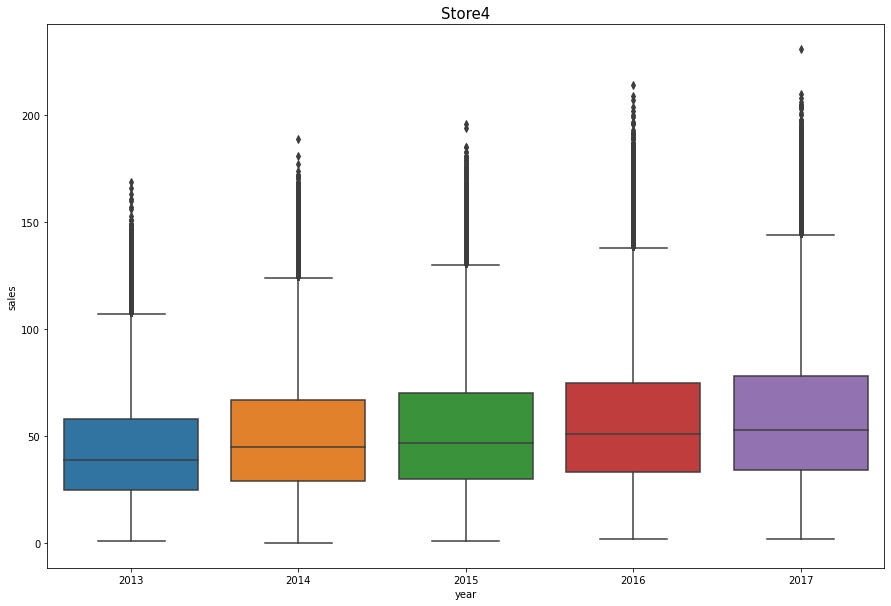

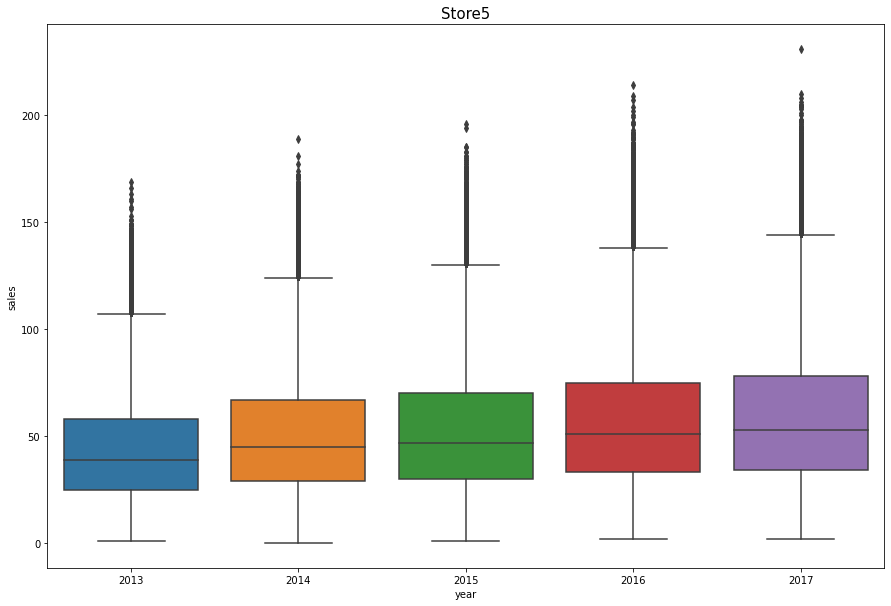

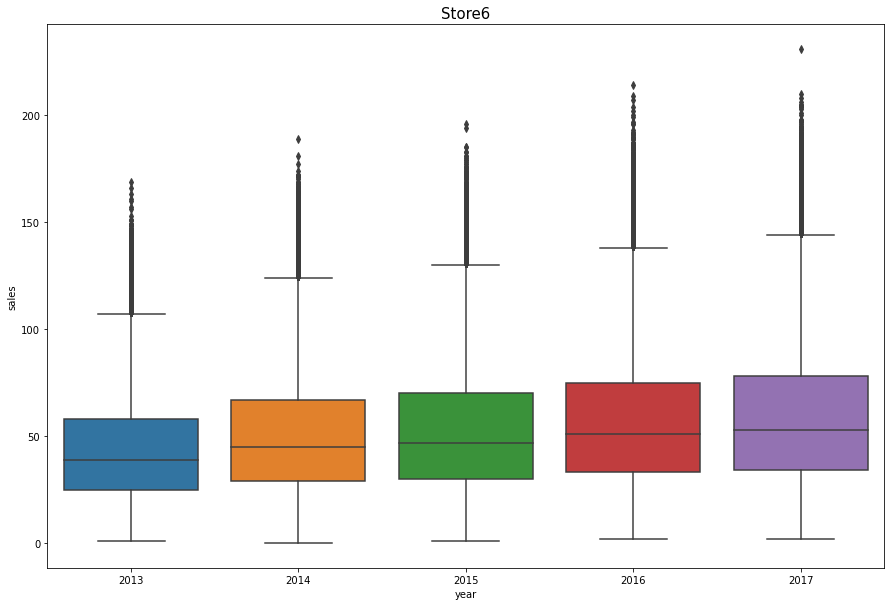

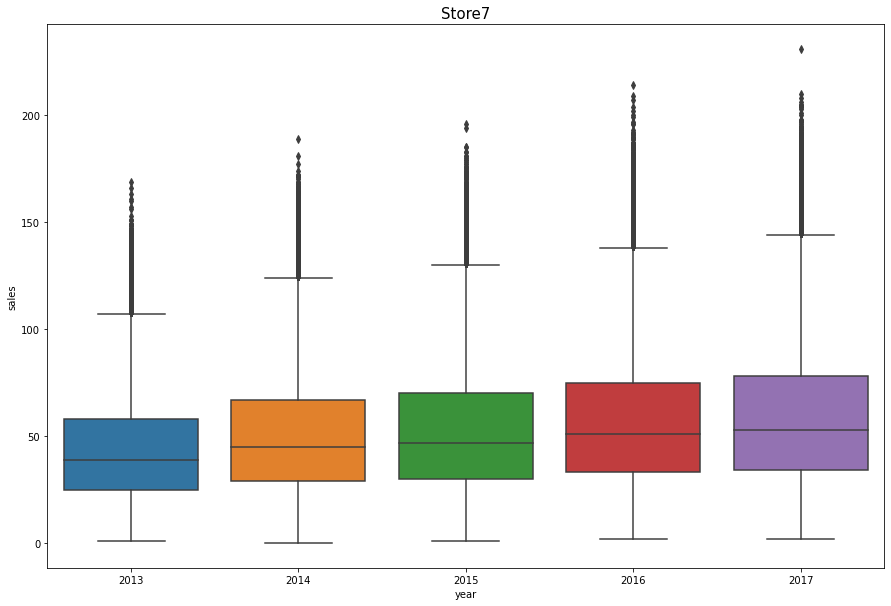

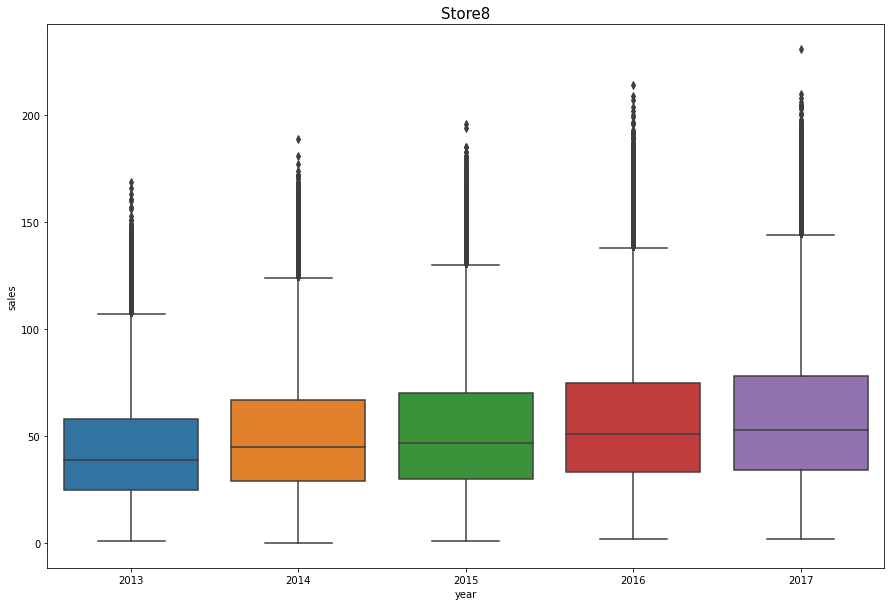

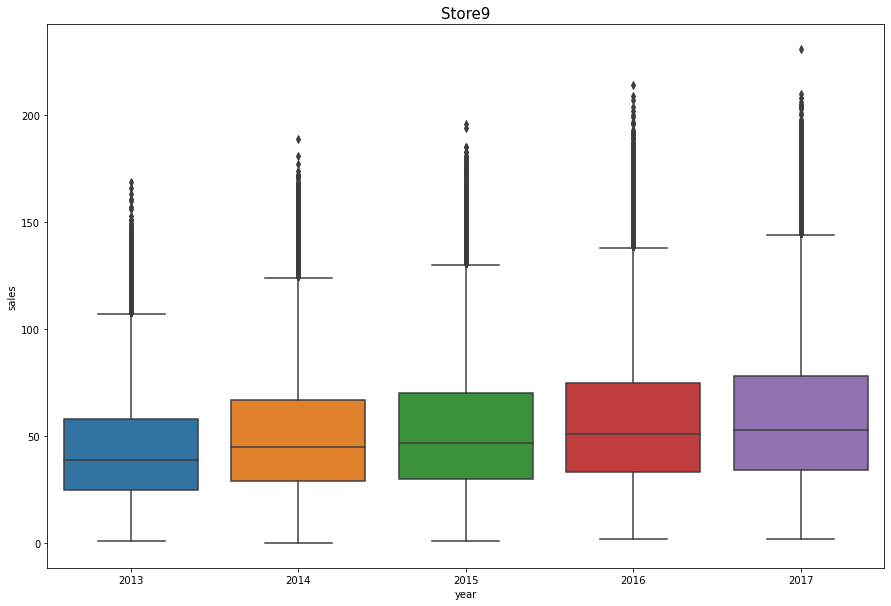

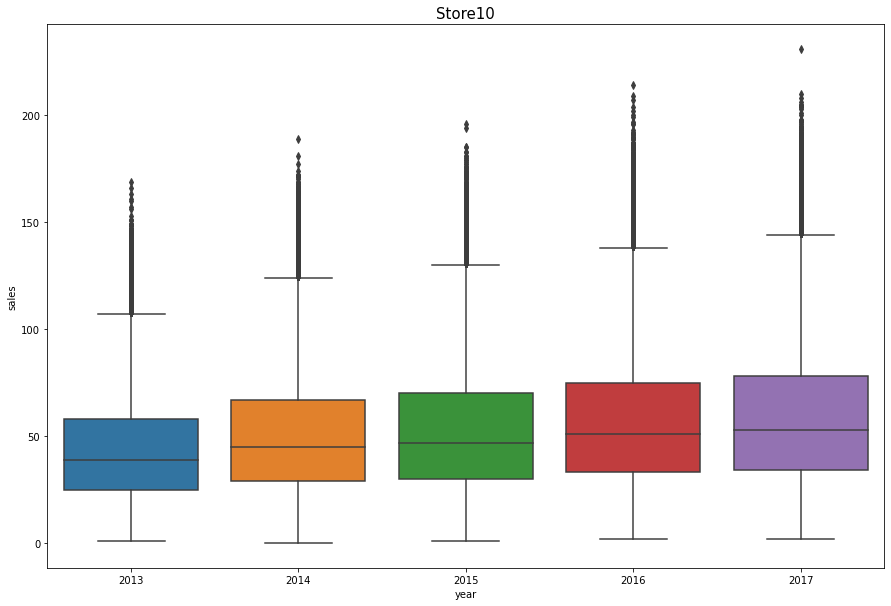

In [19]:
#Boxplot of yearly sales of each store
for i in data['store'].unique():
    store_value=data[data['store']==i]
    plt.figure(figsize=(15,10))
    sns.boxplot(x='year',y='sales',data=data)
    plt.title('Store'+ str(i), fontsize = 15)
    plt.show()

In [26]:
#Total sales per store
sales_by_store = data.groupby('store').agg({"sales": ["count", "sum", "mean", "median", "std", "min", "max"]}).reset_index()

In [27]:
sales_by_store

store  sales                                               
         count      sum       mean median        std min  max
0     1  91300  4315603  47.268379   44.0  24.006252   1  155
1     2  91300  6120128  67.033165   62.0  33.595810   3  231
2     3  91300  5435144  59.530602   55.0  29.974102   3  196
3     4  91300  5012639  54.902946   51.0  27.733097   4  186
4     5  91300  3631016  39.770164   37.0  20.365757   2  130
5     6  91300  3627670  39.733516   37.0  20.310451   0  134
6     7  91300  3320009  36.363735   34.0  18.684825   1  122
7     8  91300  5856169  64.142048   60.0  32.231751   4  204
8     9  91300  5025976  55.049025   51.0  27.832186   4  195
9    10  91300  5360158  58.709288   54.0  29.554994   3  187

In [28]:
sales_by_store1 = data.groupby('store')['sales'].sum().reset_index()

In [29]:
sales_by_store1

store    sales
0      1  4315603
1      2  6120128
2      3  5435144
3      4  5012639
4      5  3631016
5      6  3627670
6      7  3320009
7      8  5856169
8      9  5025976
9     10  5360158

Text(0.5, 1.0, 'Total sales of stores')

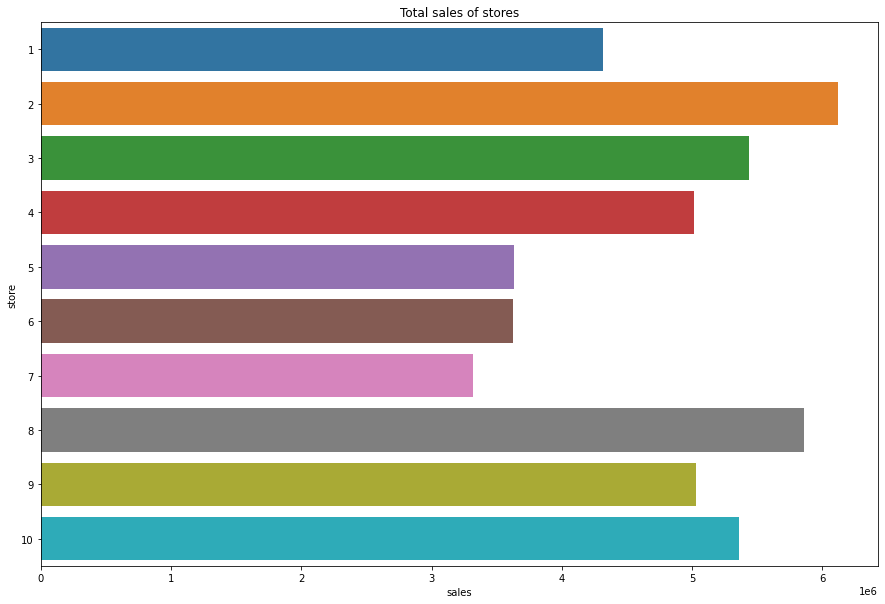

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(data=sales_by_store1, x="sales", y="store",orient='h')
plt.title("Total sales of stores")

In [29]:
sales_by_item = data.groupby('item')['sales'].sum().reset_index()
sales_by_item

item    sales
0      1   401384
1      2  1069564
2      3   669087
3      4   401907
4      5   335230
5      6  1068281
6      7  1068777
7      8  1405108
8      9   938379
9     10  1337133
10    11  1271925
11    12  1271534
12    13  1539621
13    14  1071531
14    15  1607442
15    16   468480
16    17   602486
17    18  1538876
18    19   736892
19    20   867641
20    21   736190
21    22  1469971
22    23   534979
23    24  1205975
24    25  1473334
25    26   869981
26    27   402628
27    28  1604713
28    29  1271240
29    30   736554
30    31  1070845
31    32   803107
32    33  1270183
33    34   469935
34    35  1201541
35    36  1406548
36    37   534258
37    38  1470330
38    39   801311
39    40   534094
40    41   401759
41    42   669925
42    43   936635
43    44   536811
44    45  1471467
45    46  1070764
46    47   401781
47    48   937703
48    49   535663
49    50  1203009

Text(0.5, 1.0, 'Total sales based on item')

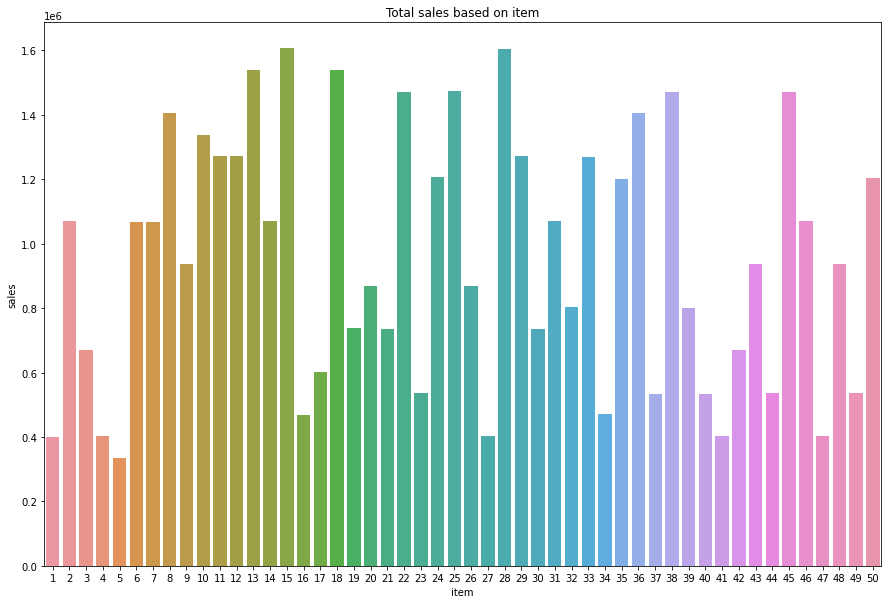

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(data=sales_by_item, x="item", y="sales")
plt.title("Total sales based on item")

Yearly sales of each store

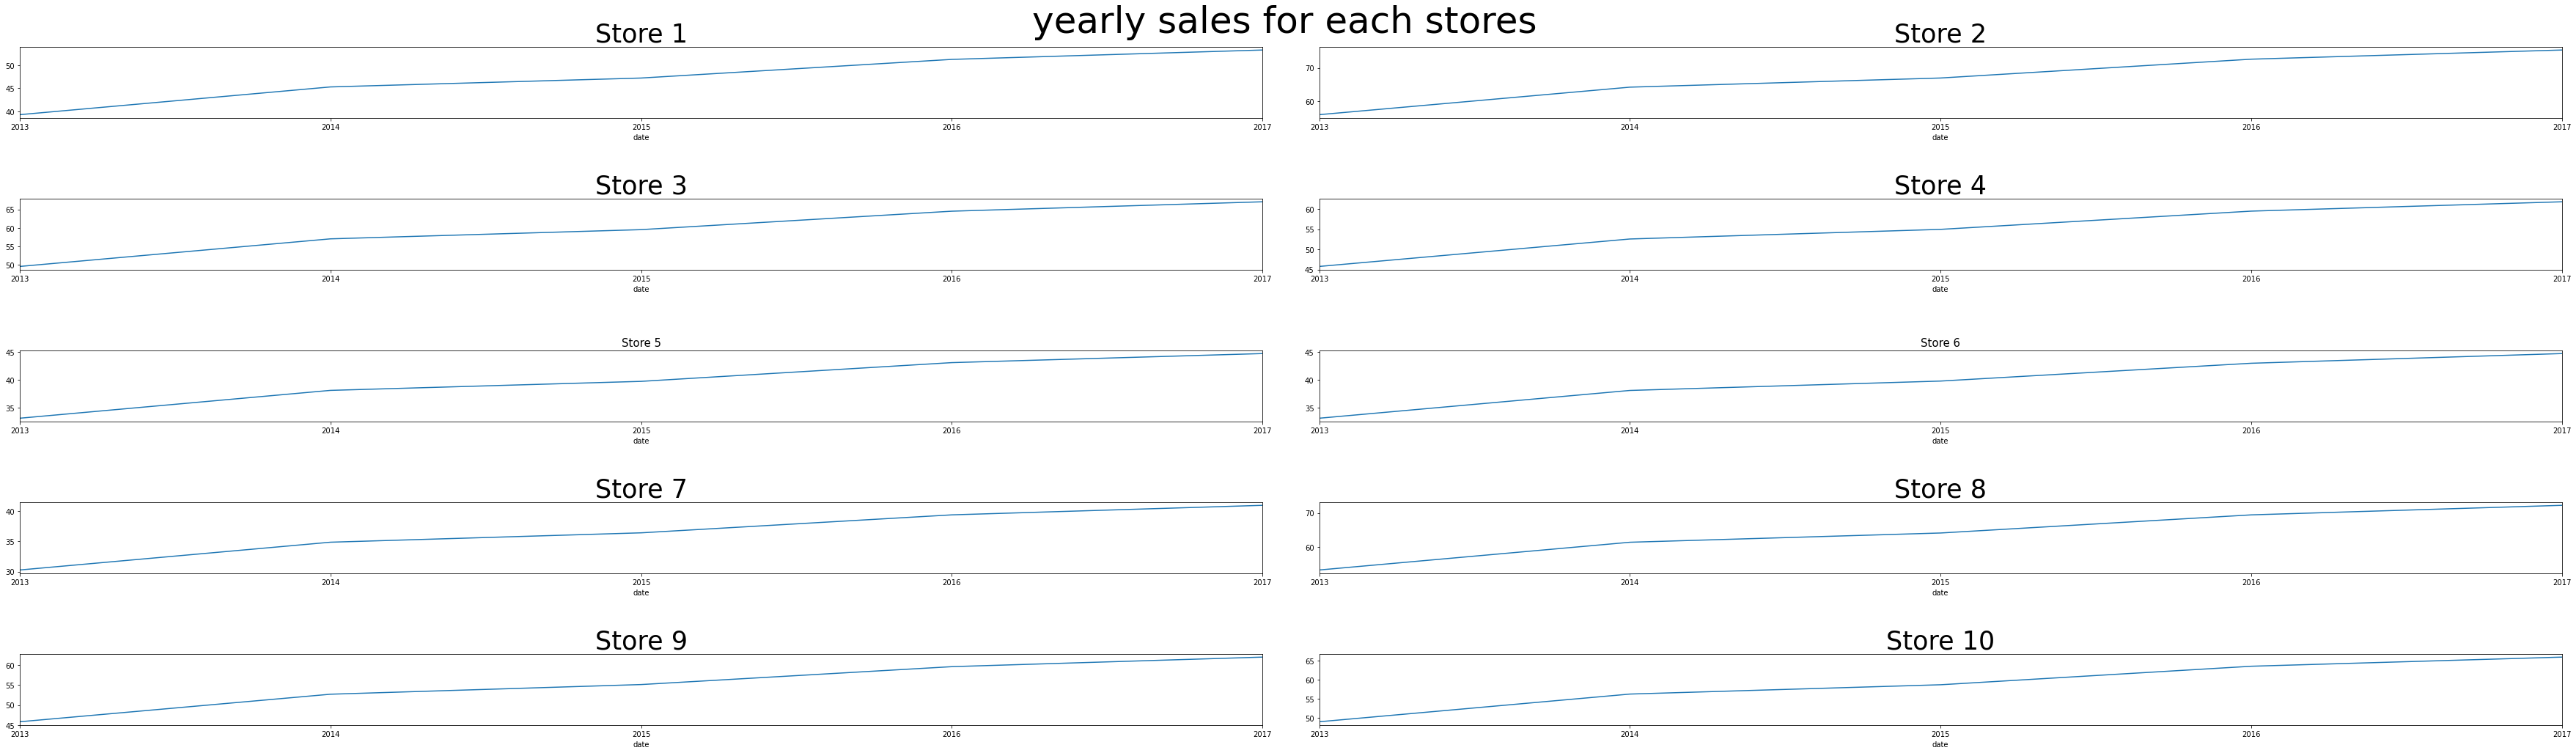

In [32]:
fig, axes = plt.subplots(5, 2, figsize=(50, 15))
for i in range(1,11):
    if i < 3:
        data1=data[data['store']==i]
        data2=data1[['date','sales']]
        data2=data2.set_index('date')
        samp1=data2.sales.resample('A').mean()
        samp1.plot(ax=axes[0, i-1])
        axes[0,i-1].set_title("Store " + str(i), fontsize = 35)
        
    elif i>2 and i<5 :
        data1=data[data['store']==i]
        data2=data1[['date','sales']]
        data2=data2.set_index('date')
        samp1=data2.sales.resample('A').mean()
        samp1.plot(ax=axes[1,i-3])
        axes[1,i-3].set_title("Store " + str(i), fontsize = 35)
    elif i>4 and i<7 :
        data1=data[data['store']==i]
        data2=data1[['date','sales']]
        data2=data2.set_index('date')
        samp1=data2.sales.resample('A').mean()
        samp1.plot(ax=axes[2,i-5])
        axes[2,i-5].set_title("Store " + str(i), fontsize = 15)
    elif i>6 and i<9 :
        data1=data[data['store']==i]
        data2=data1[['date','sales']]
        data2=data2.set_index('date')
        samp1=data2.sales.resample('A').mean()
        samp1.plot(ax=axes[3,i-7])
        axes[3,i-7].set_title("Store " + str(i), fontsize = 35)
    elif i>8 and i<11 :
        data1=data[data['store']==i]
        data2=data1[['date','sales']]
        data2=data2.set_index('date')
        samp1=data2.sales.resample('A').mean()
        samp1.plot(ax=axes[4,i-9])
        axes[4,i-9].set_title("Store " + str(i), fontsize = 35)
plt.tight_layout(pad=4.5)
plt.suptitle("yearly sales of each stores",fontsize = 50);

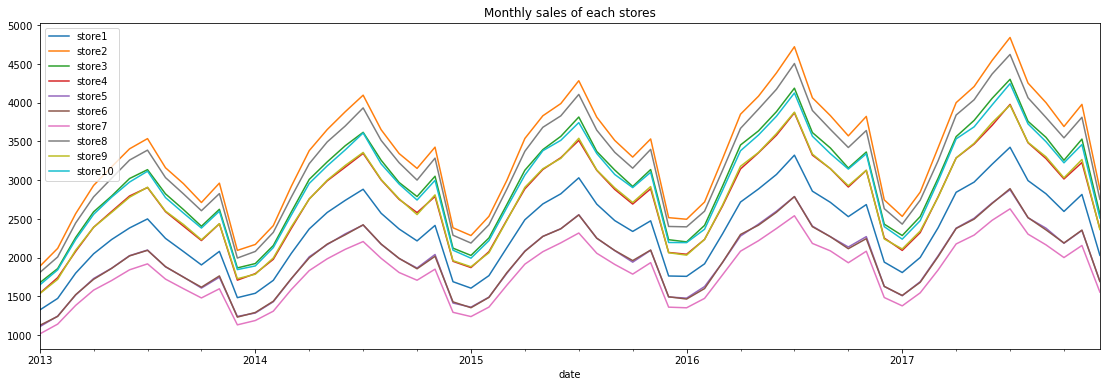

In [33]:
#Monthly sales of each stores over the years
plt.title('Monthly sales of each stores')
for i in data['store'].unique():
    store1=data[data['store']==i]
    store1=store1.groupby('date')['sales'].sum().reset_index()
    store1=store1.set_index('date')
    store1=store1.sales.resample('M').mean()
    store1.plot(figsize=(19,6))
    plt.legend(('store1','store2','store3','store4','store5','store6','store7','store8','store9','store10'))

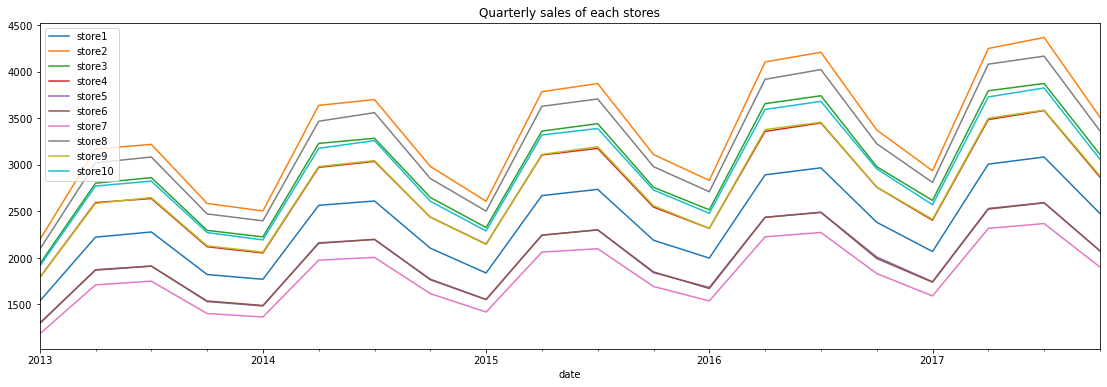

In [35]:
#Quarterly sales of each stores over the years
plt.title('Quarterly sales of each stores')
for i in data['store'].unique():
    store1=data[data['store']==i]
    store1=store1.groupby('date')['sales'].sum().reset_index()
    store1=store1.set_index('date')
    store1=store1.sales.resample('Q').mean()
    store1.plot(figsize=(19,6))
    plt.legend(('store1','store2','store3','store4','store5','store6','store7','store8','store9','store10'))

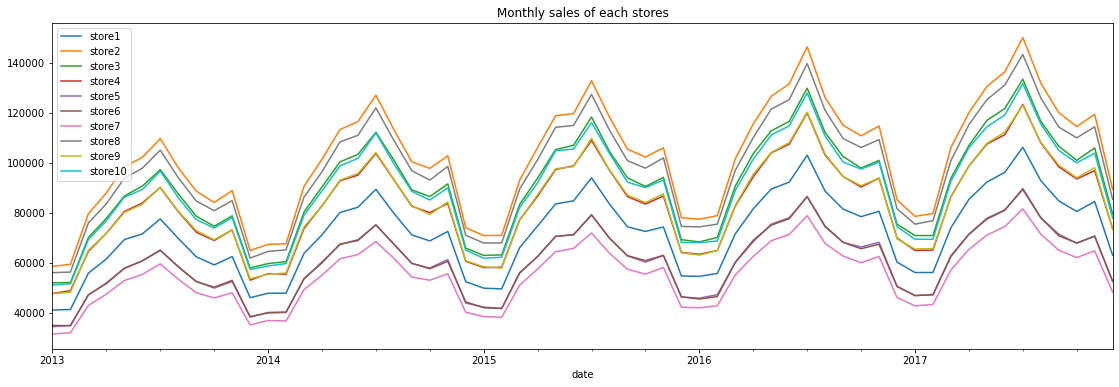

In [36]:
#Month start sales of each stores over the years
plt.title('Month start sales of each stores')
for i in data['store'].unique():
    store1=data[data['store']==i]
    store1=store1.groupby('date')['sales'].sum().reset_index()
    store1=store1.set_index('date')
    store1=store1.sales.resample('MS').sum()
    store1.plot(figsize=(19,6))
    plt.legend(('store1','store2','store3','store4','store5','store6','store7','store8','store9','store10'))

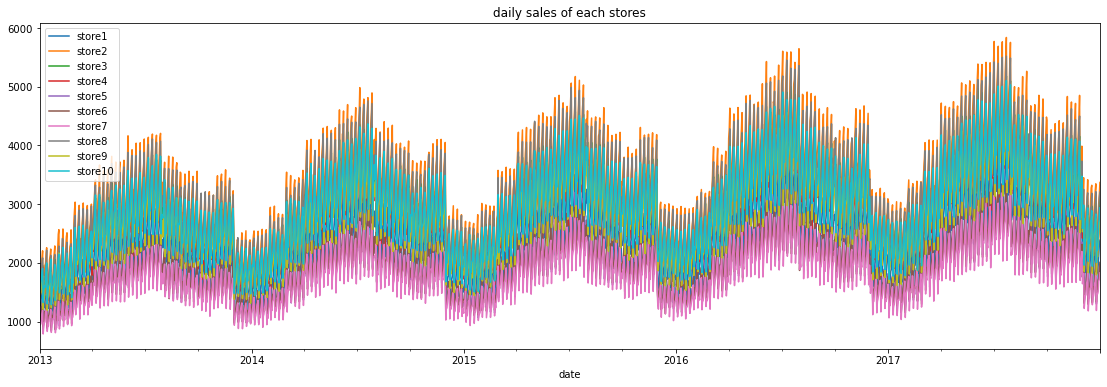

In [37]:
#Daily sales of each stores over the years
plt.title('Daily sales of each stores')
for i in data['store'].unique():
    store1=data[data['store']==i]
    store1=store1.groupby('date')['sales'].sum().reset_index()
    store1=store1.set_index('date')
    store1=store1.sales.resample('D').mean()
    store1.plot(figsize=(19,6))
    plt.legend(('store1','store2','store3','store4','store5','store6','store7','store8','store9','store10'))

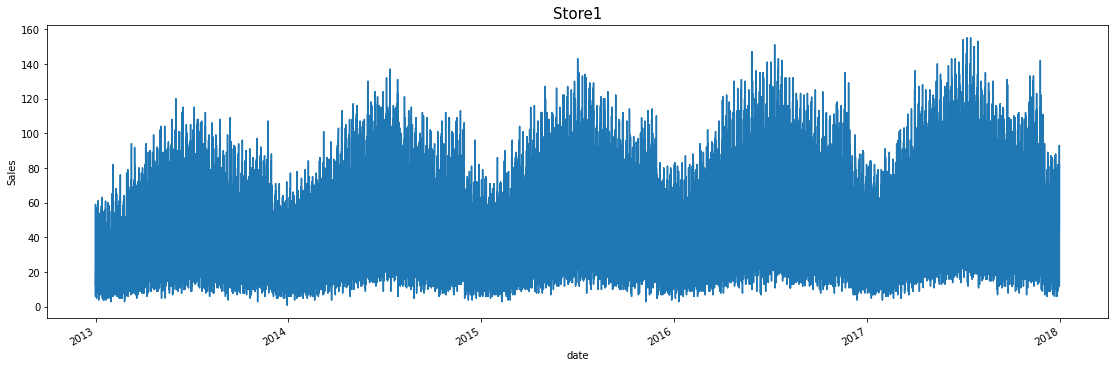

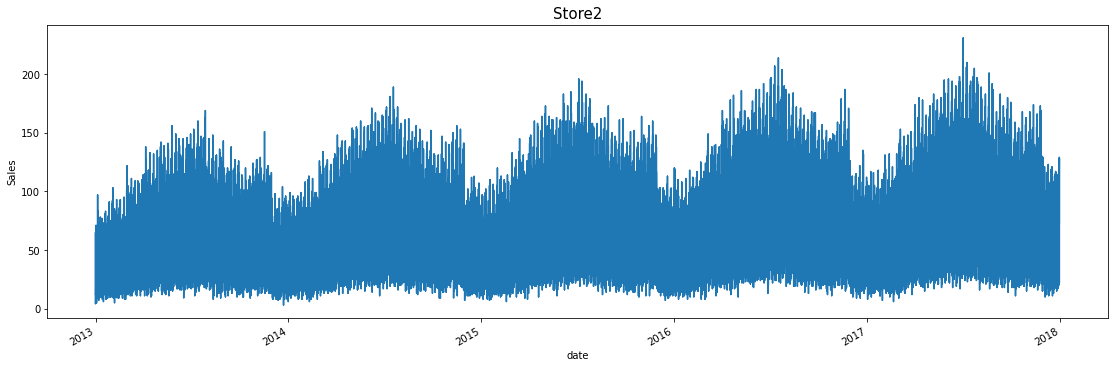

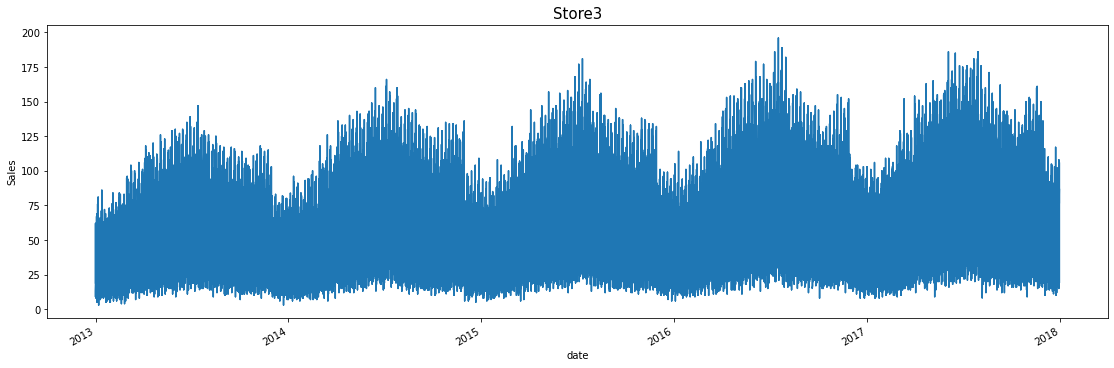

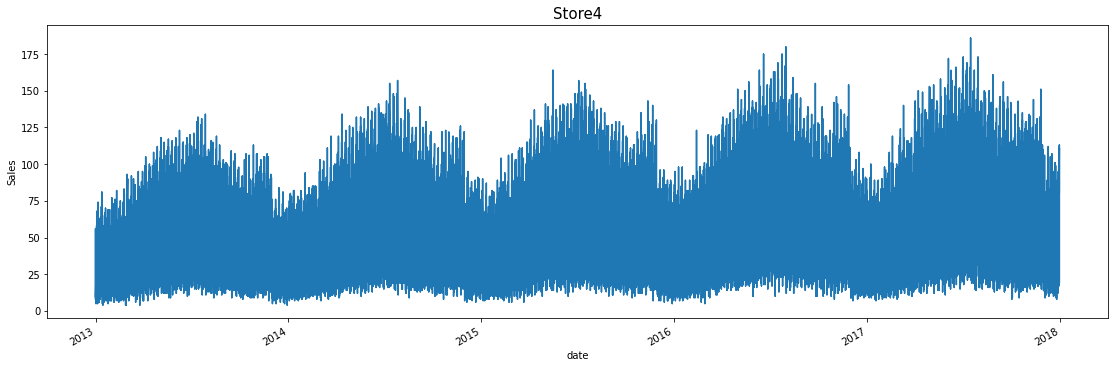

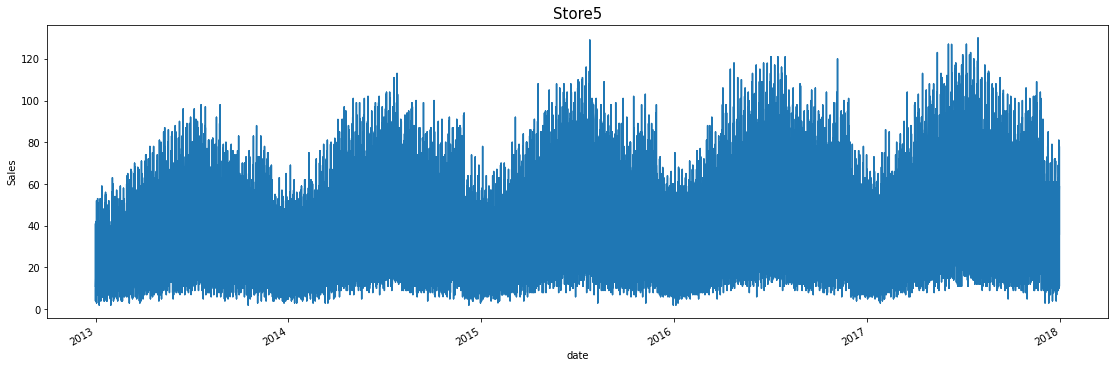

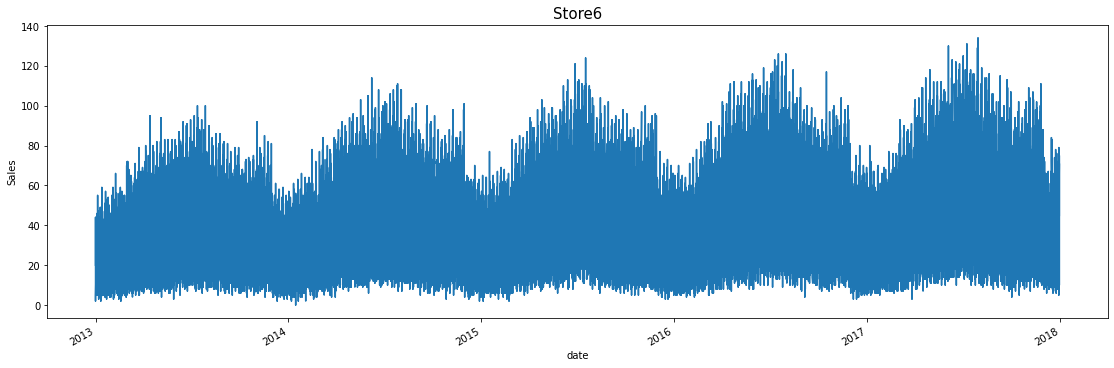

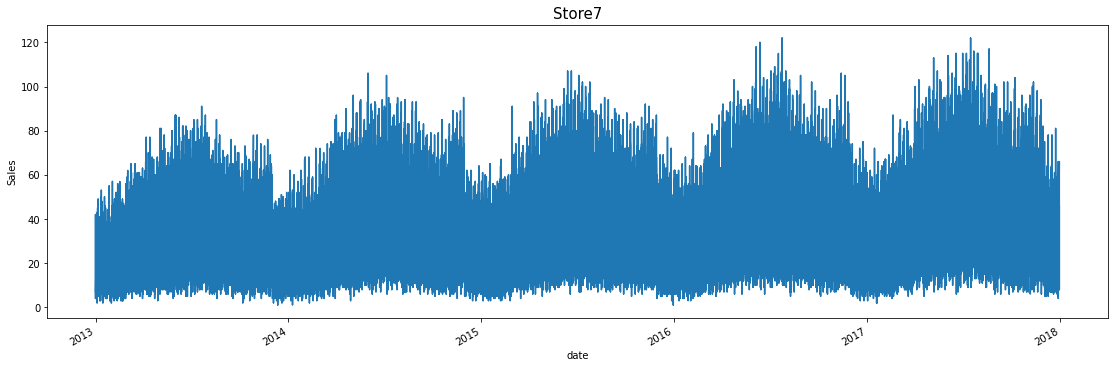

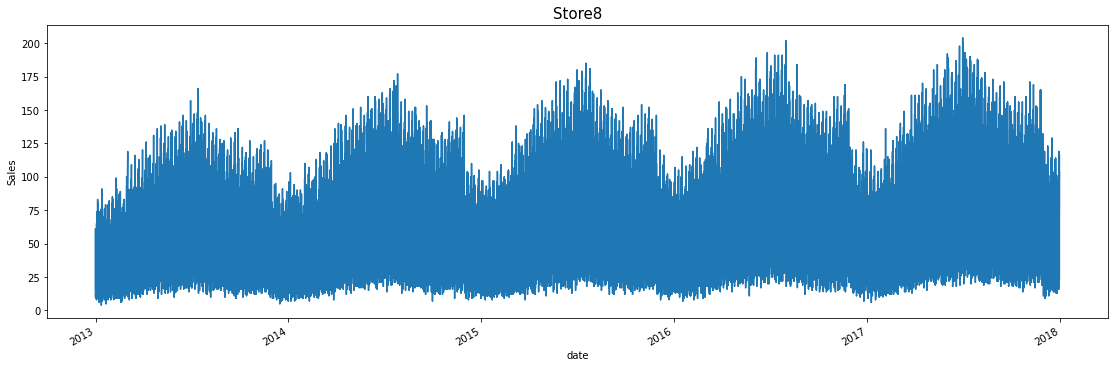

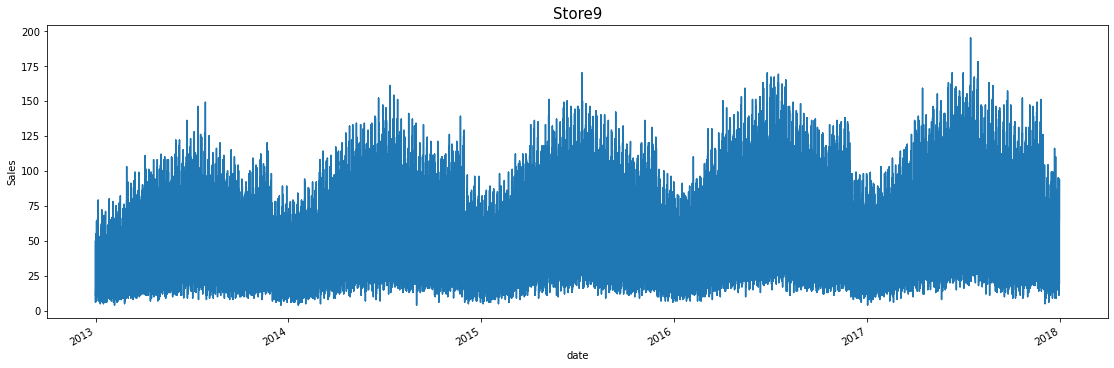

In [38]:
plt.title('Store based sales over the years')
for i in range(1,10):
    plt.title('Store'+ str(i), fontsize = 15)
    data1=data[data['store']==i]
    data2=data1[['date','sales']]
    data2=data2.set_index('date')
    data2.sales.plot(figsize=(19,6))
    plt.ylabel("Sales")
    plt.show()


In [546]:
sales_by_store = data.groupby(['store','year','month'])['sales'].sum().reset_index()

In [547]:
sales_by_store

store  year  month   sales
0        1  2013      1   41077
1        1  2013      2   41306
2        1  2013      3   55827
3        1  2013      4   61523
4        1  2013      5   69272
..     ...   ...    ...     ...
595     10  2017      8  115528
596     10  2017      9  104924
597     10  2017     10   99969
598     10  2017     11  103815
599     10  2017     12   77850

[600 rows x 4 columns]

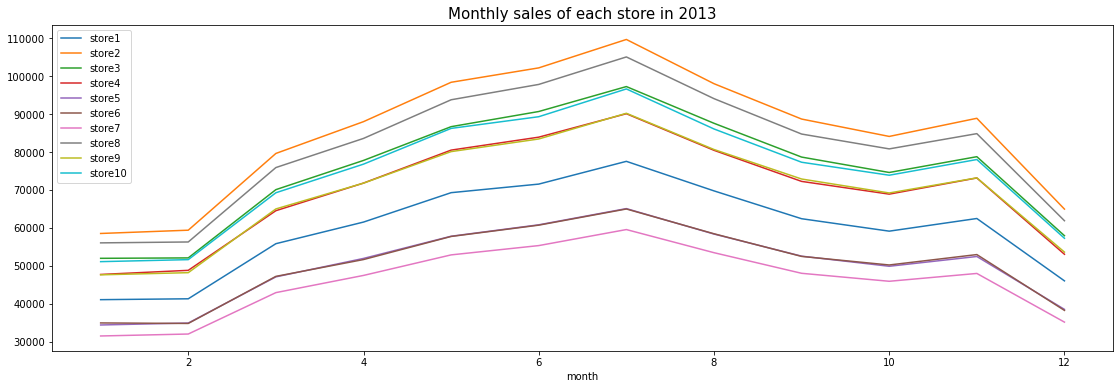

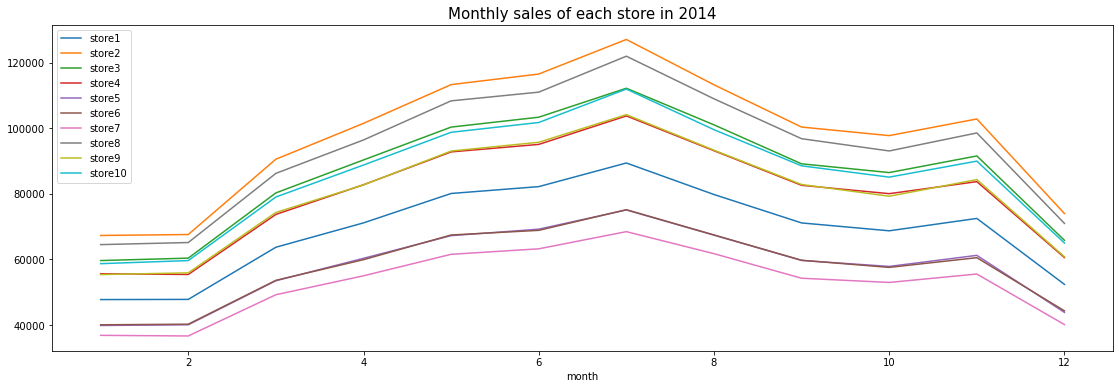

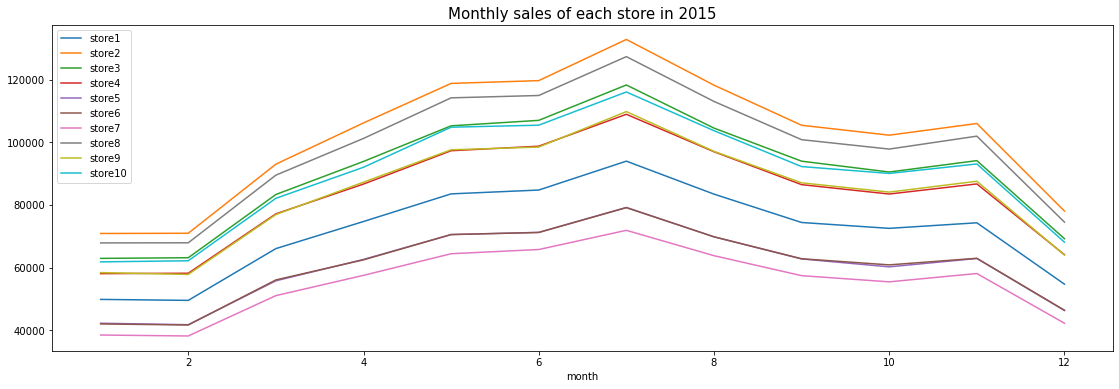

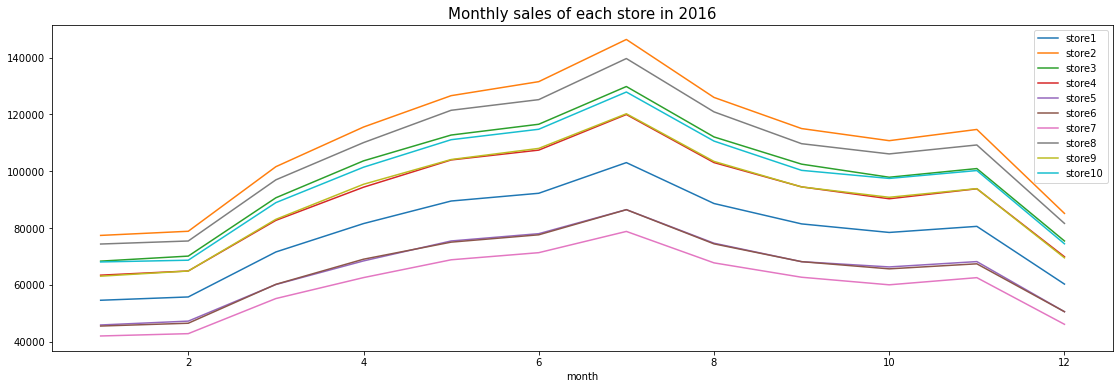

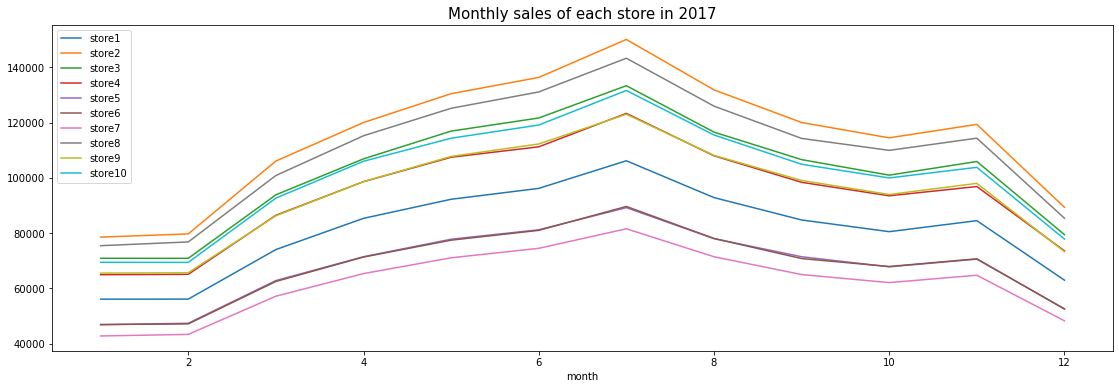

In [549]:
#Year vice montly sales of each store 
for i in data['year'].unique():
    df1=sales_by_store[sales_by_store['year']==i].reset_index()
    for j in df1['store'].unique():
        store1=df1[df1['store']==j]
        store1=store1.set_index('month')
        store1.sales.plot(figsize=(19,6))
        plt.legend(('store1','store2','store3','store4','store5','store6','store7','store8','store9','store10'))
    plt.title('Monthly sales of each store in'+" "+str(i), fontsize = 15)
    plt.show()

# Stationarity Check

Decomposition of store 1 data



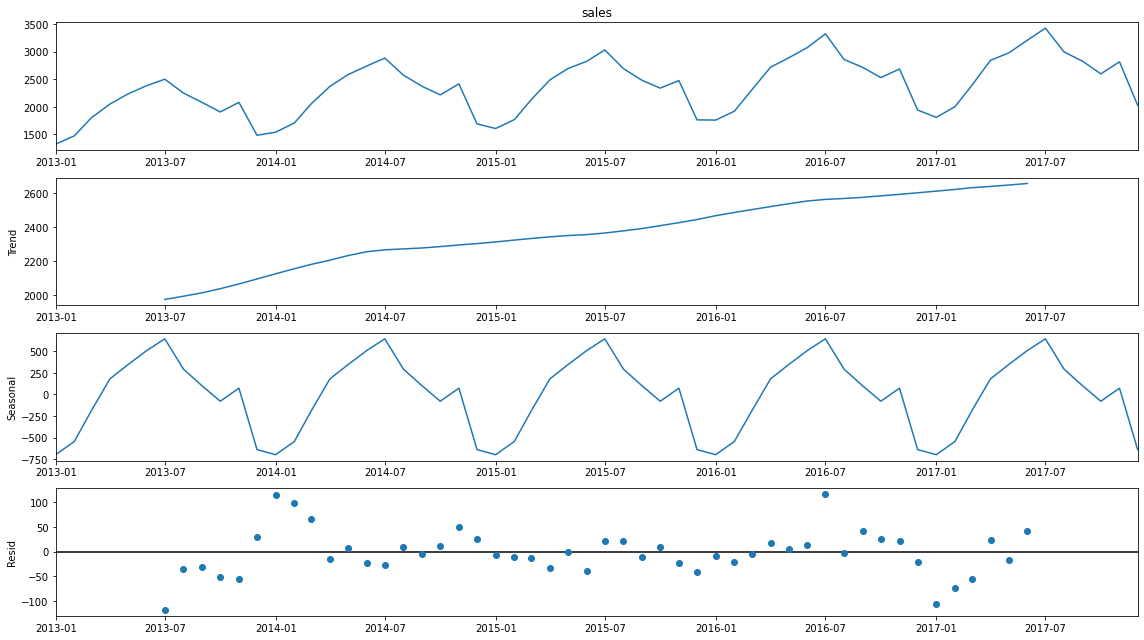

Decomposition of store 2 data



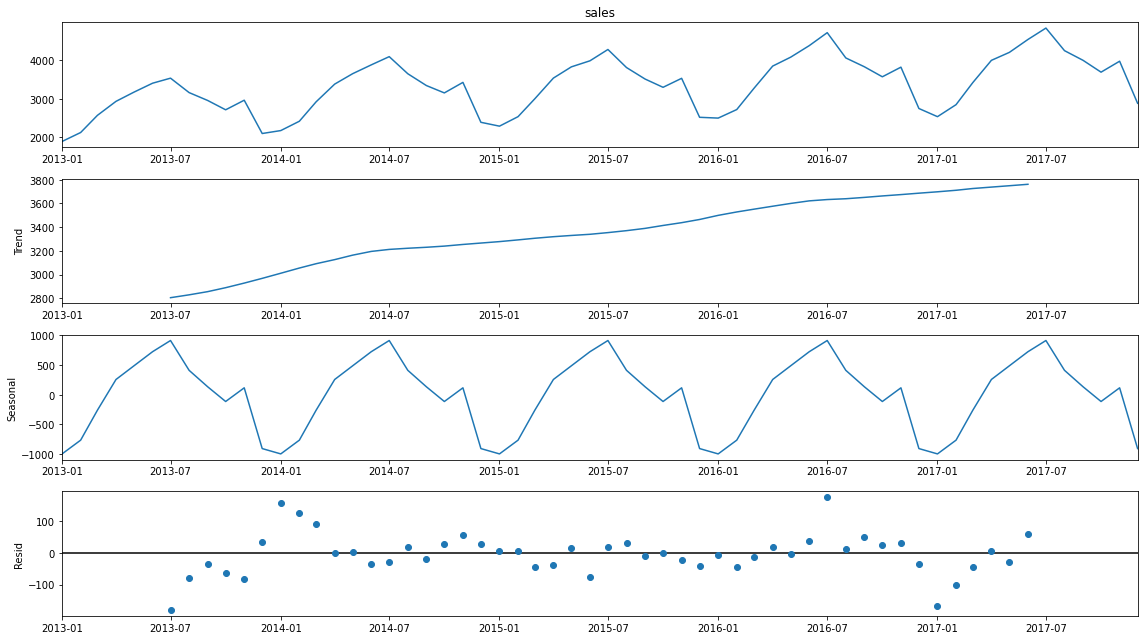

Decomposition of store 3 data



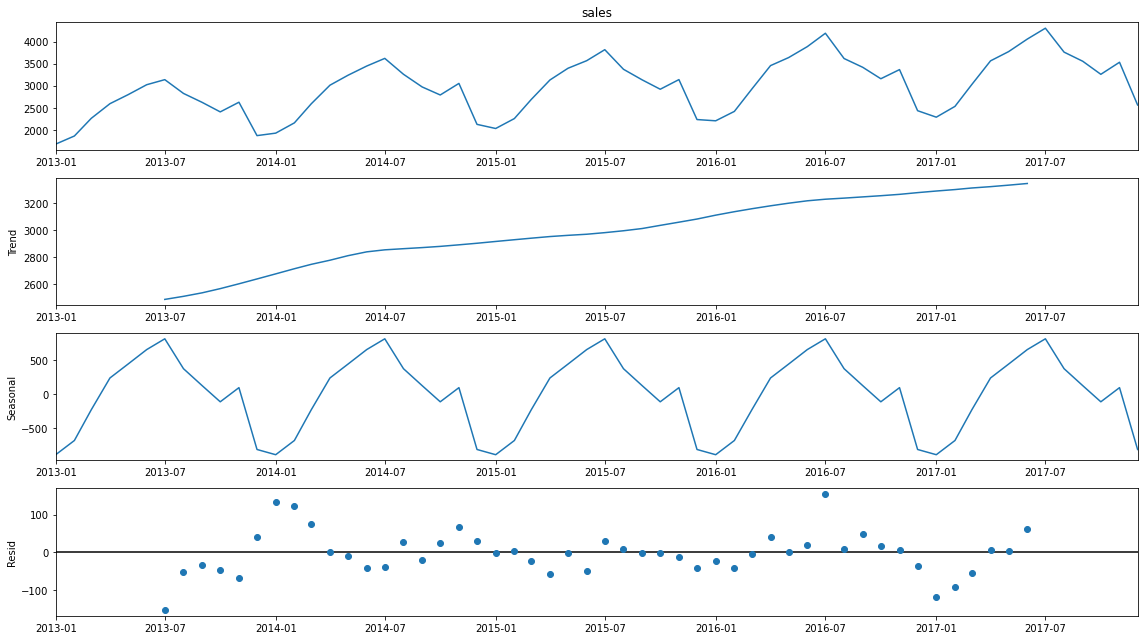

Decomposition of store 4 data



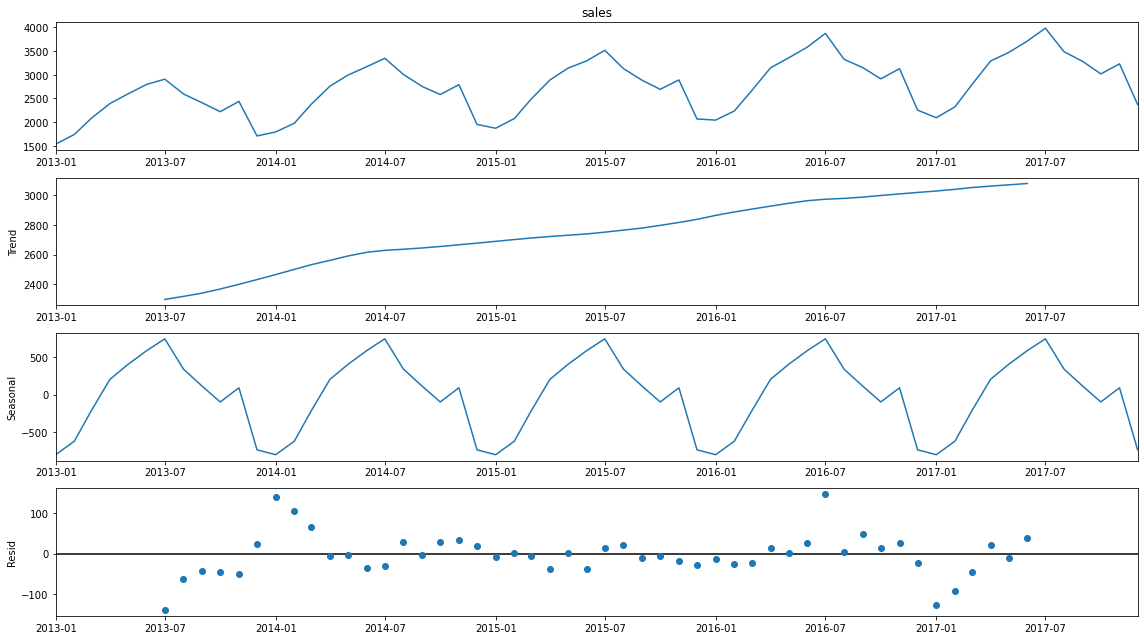

Decomposition of store 5 data



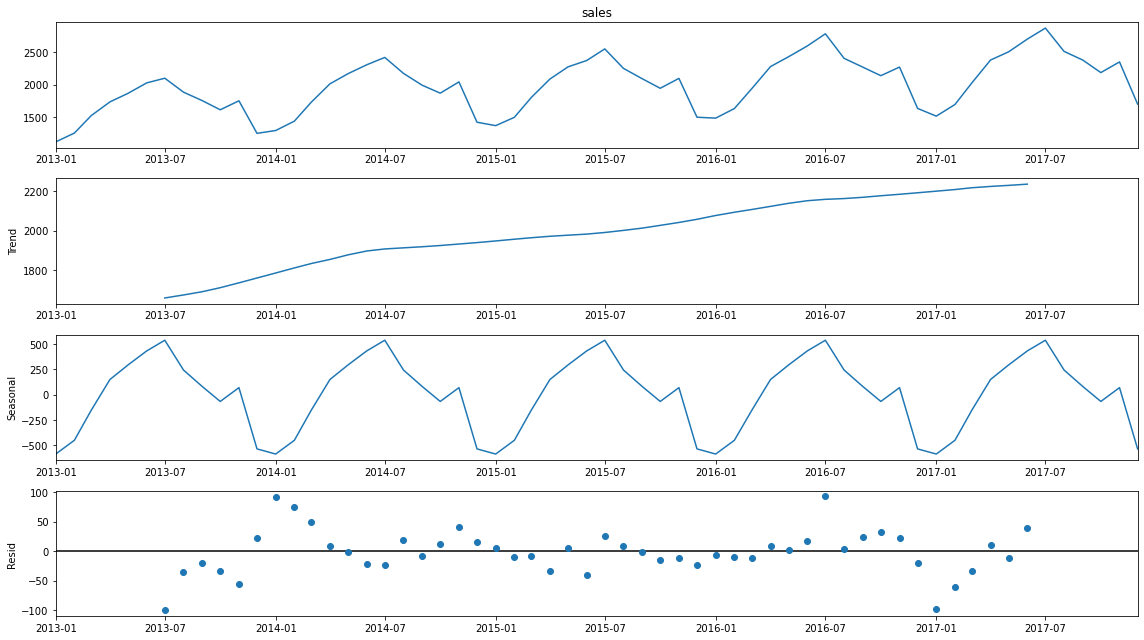

Decomposition of store 6 data



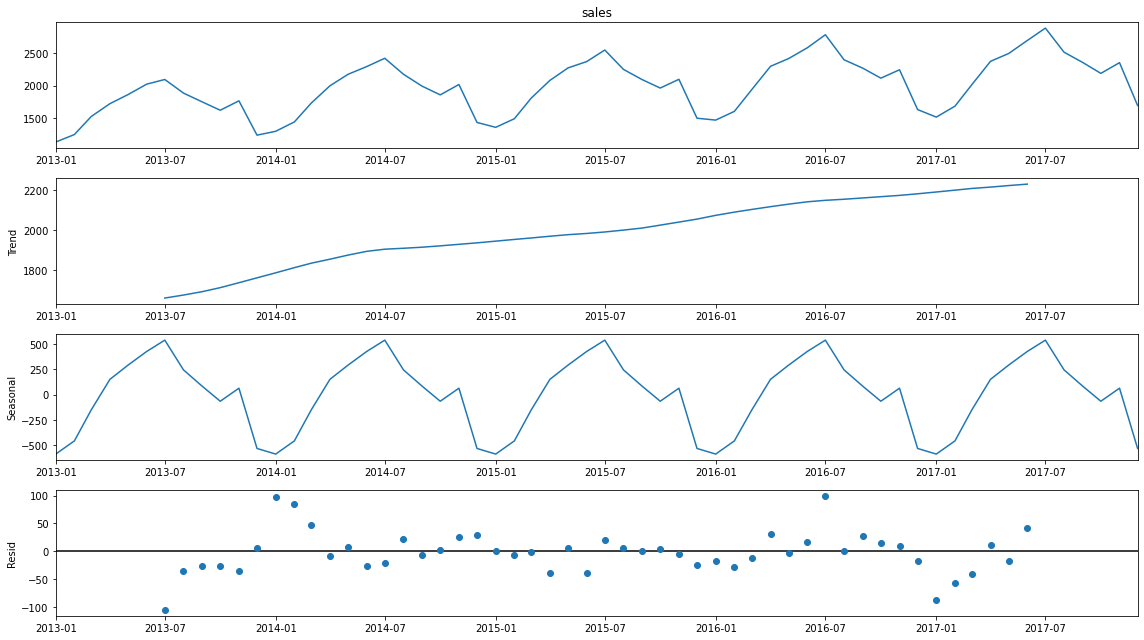

Decomposition of store 7 data



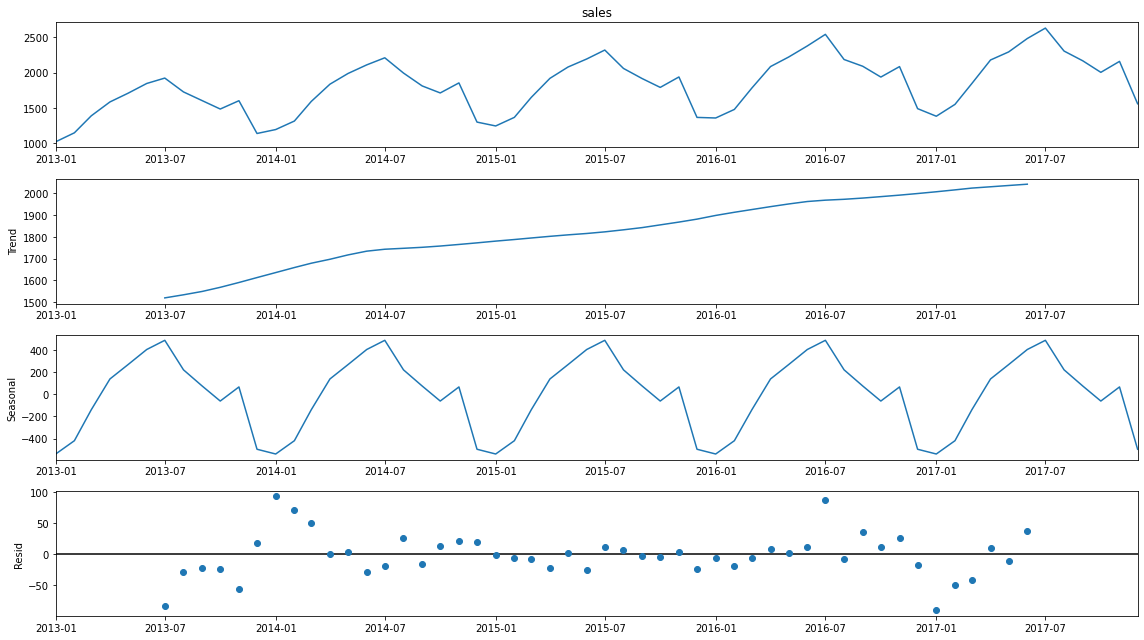

Decomposition of store 8 data



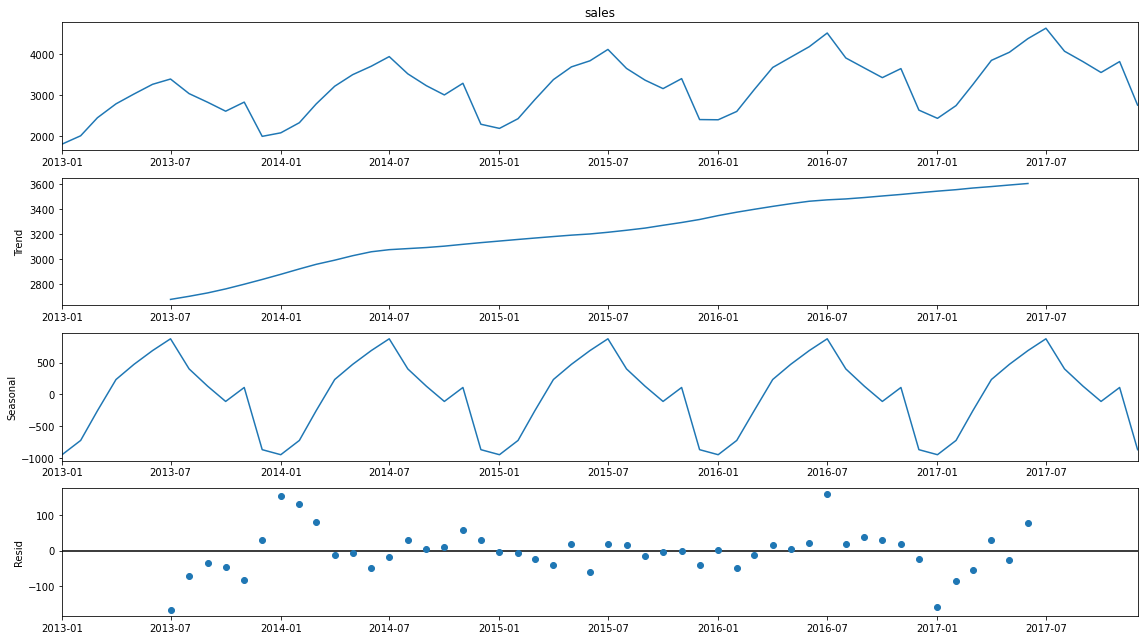

Decomposition of store 9 data



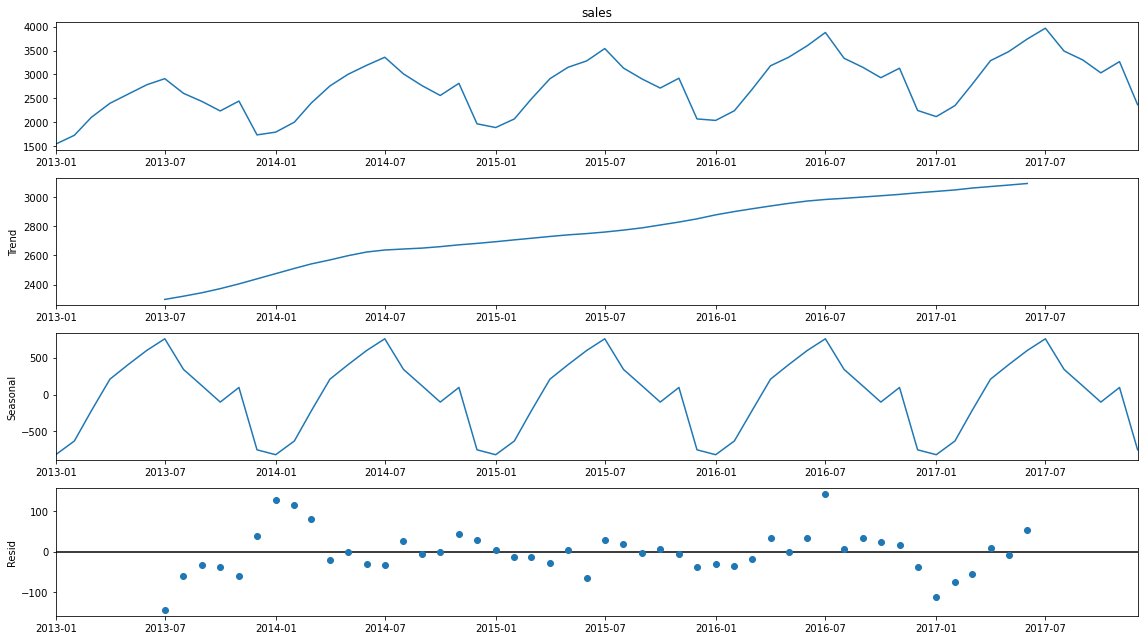

Decomposition of store 10 data



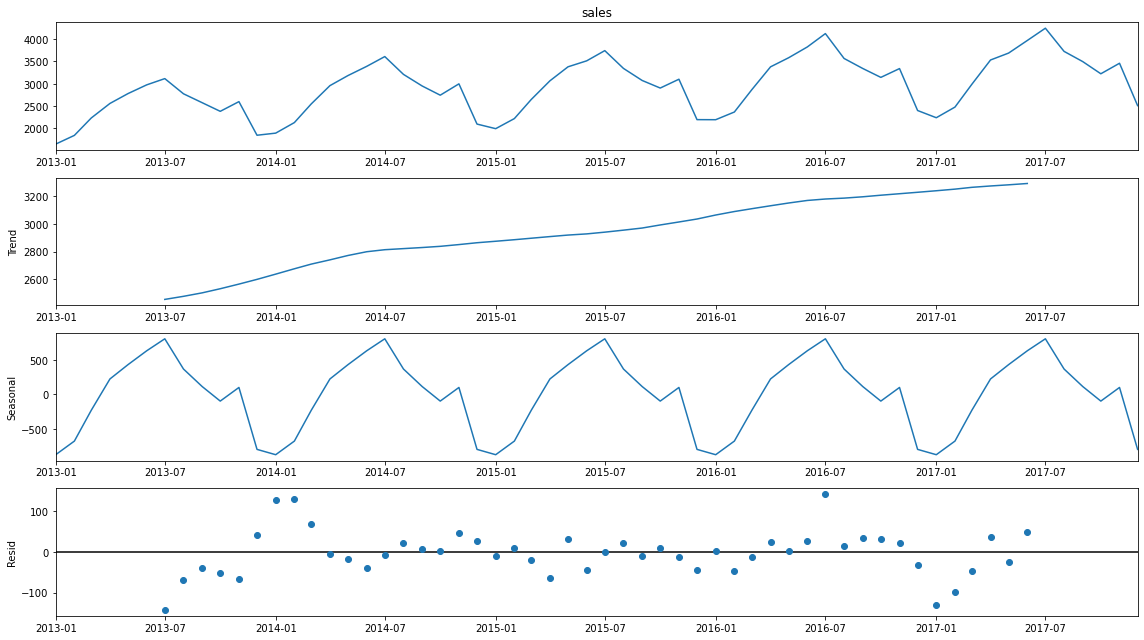

In [584]:
# Time series decomposition is the process of separating data into its core components.
# Time series decomposition plot using Moving Average
# decomposition of plot with additive seasonality
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    decompose_ts_add = seasonal_decompose(store_i, model = "additive", period = 12)
    print('Decomposition of store'+" "+str(i)+" "+'data'+"\n")
    fig=decompose_ts_add.plot()
    fig.set_size_inches((16, 9))
    fig.tight_layout()
    plt.show() 

Decomposition of store 1 data



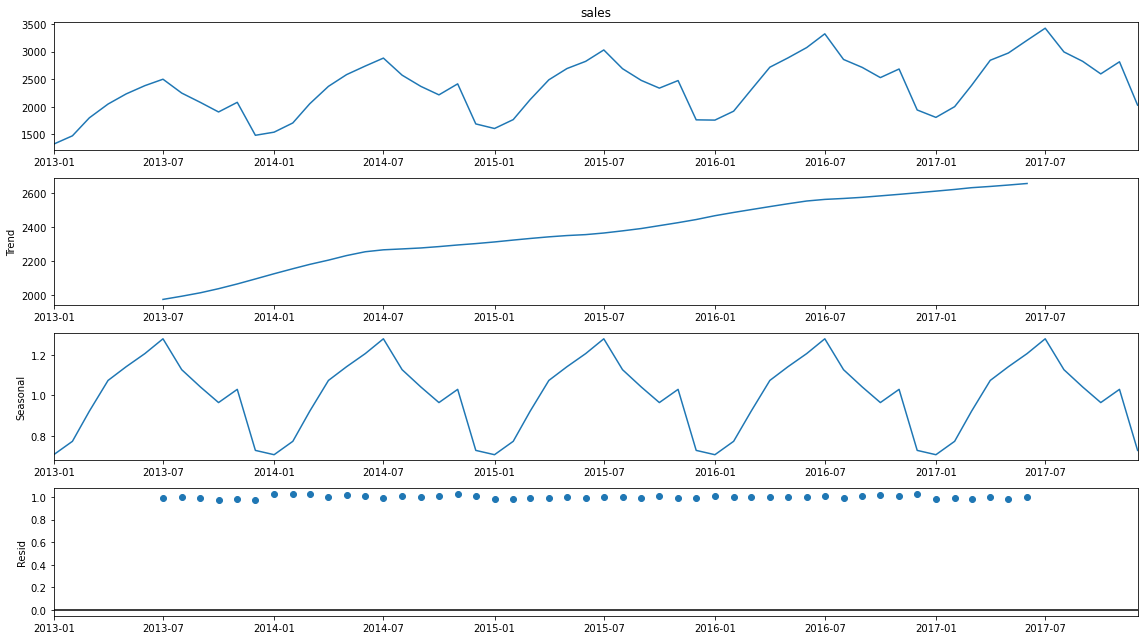

Decomposition of store 2 data



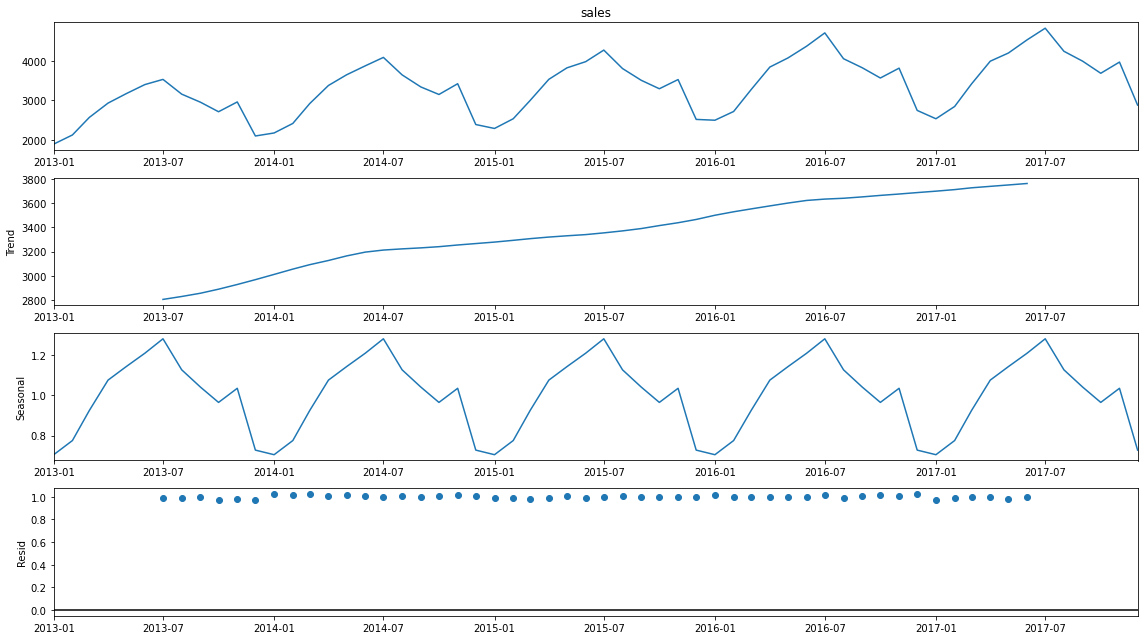

Decomposition of store 3 data



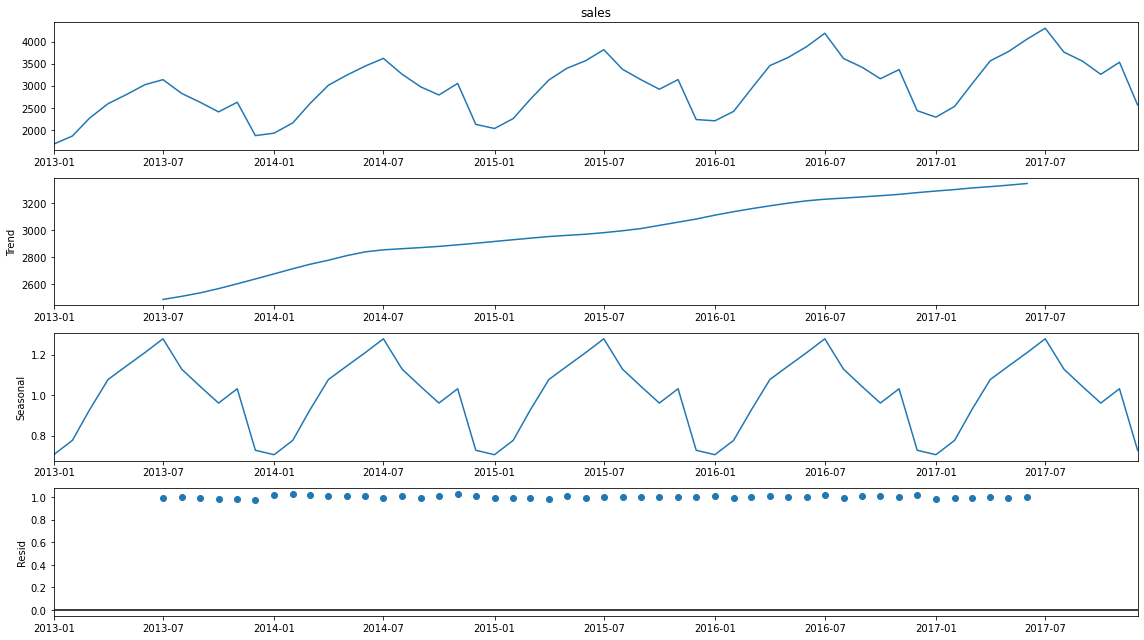

Decomposition of store 4 data



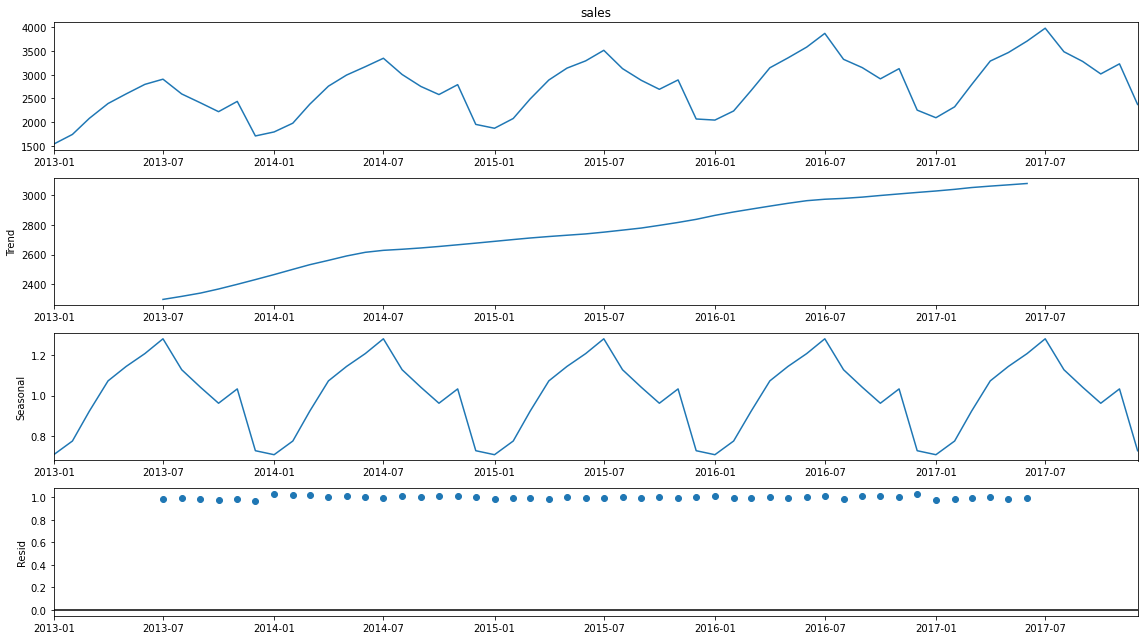

Decomposition of store 5 data



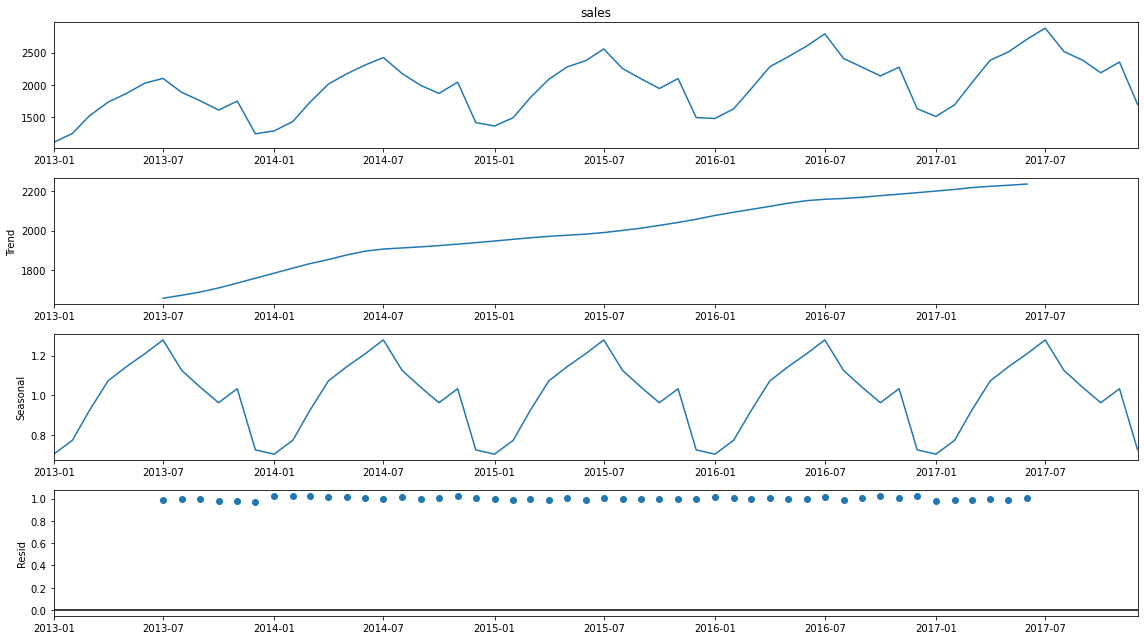

Decomposition of store 6 data



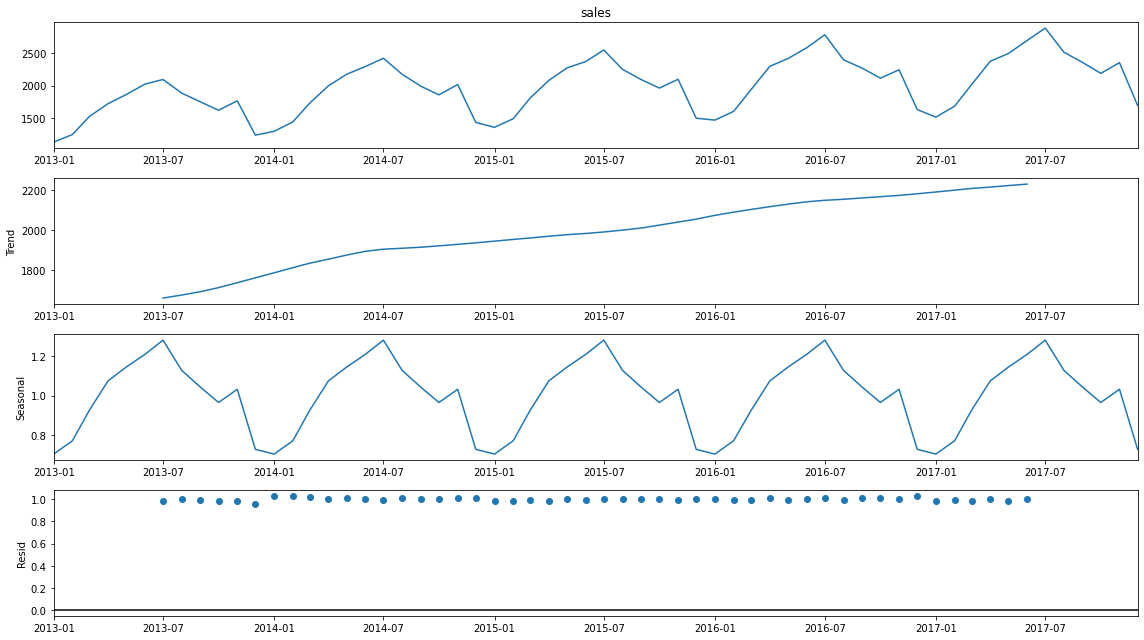

Decomposition of store 7 data



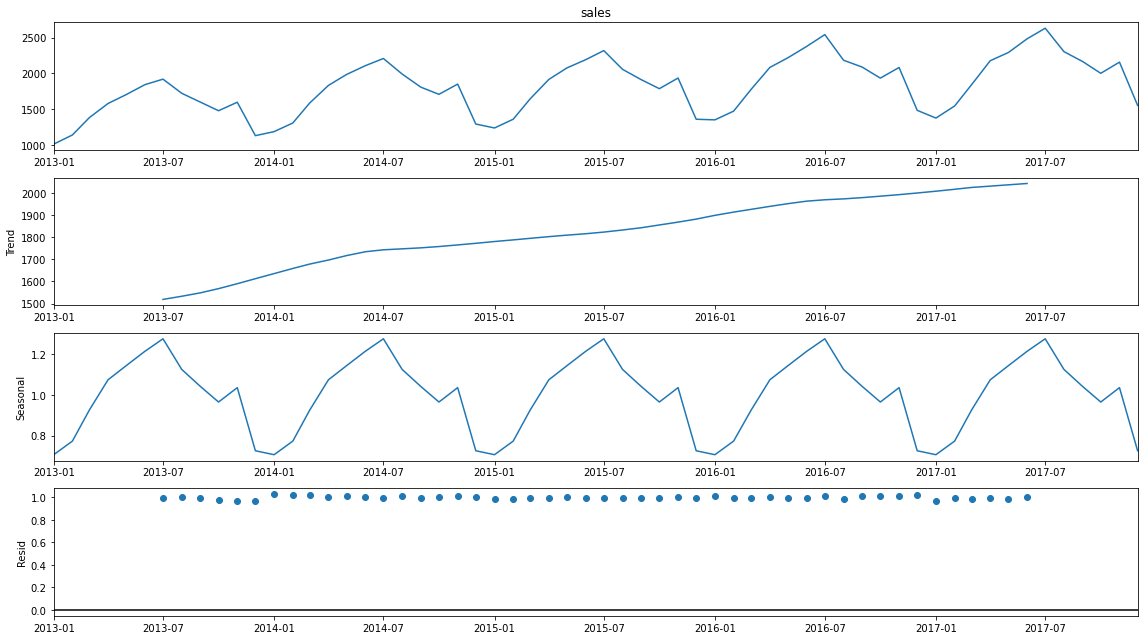

Decomposition of store 8 data



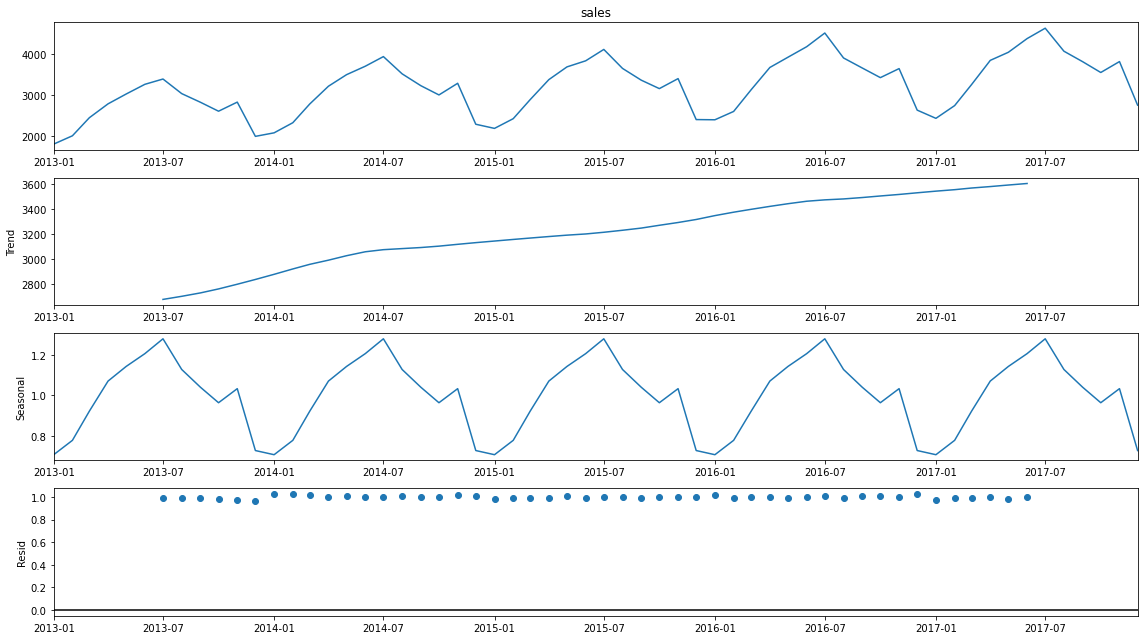

Decomposition of store 9 data



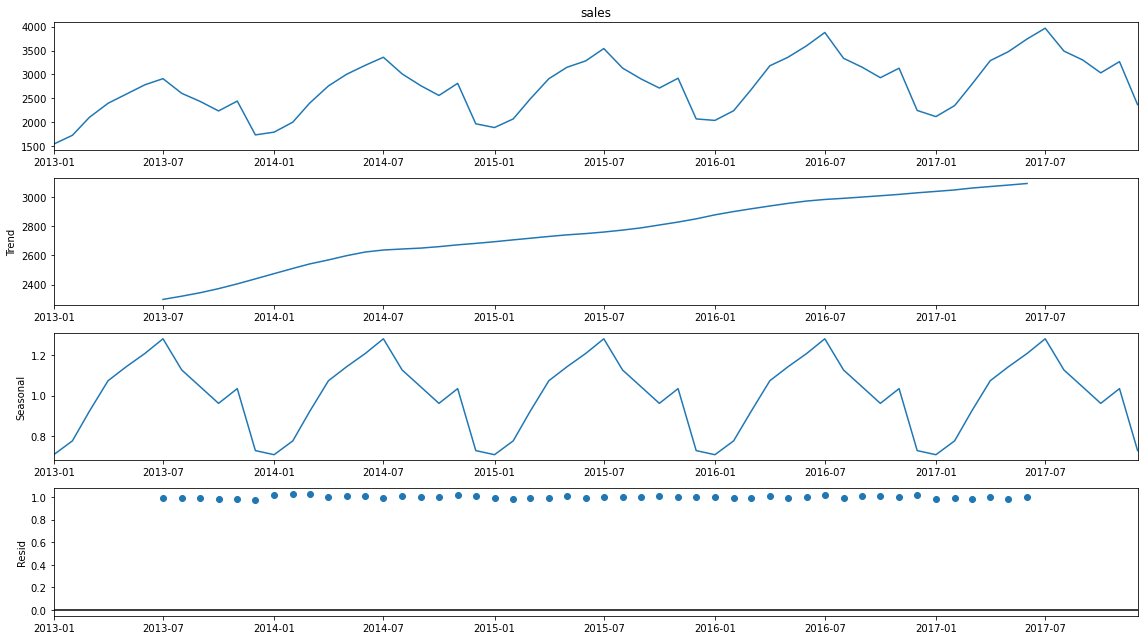

Decomposition of store 10 data



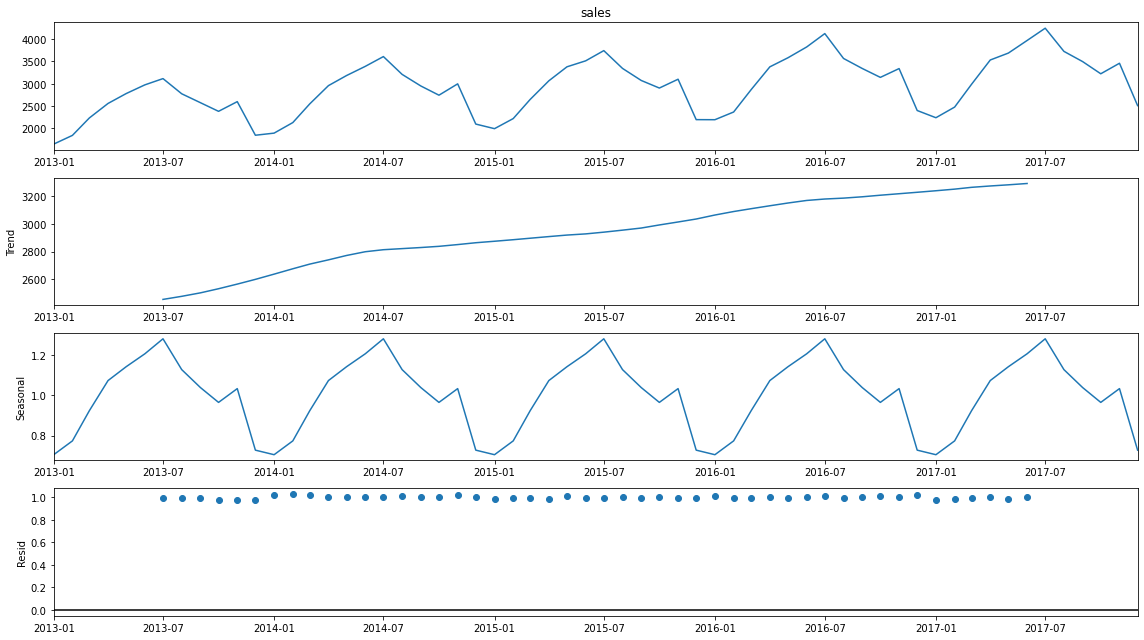

In [585]:
# Time series decomposition is the process of separating data into its core components.
# Time series decomposition plot using Moving Average
# decomposition of plot with multiplicative seasonality
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    decompose_ts_add = seasonal_decompose(store_i, model = "multiplicative", period = 12)
    print('Decomposition of store'+" "+str(i)+" "+'data'+"\n")
    fig=decompose_ts_add.plot()
    fig.set_size_inches((16, 9))
    fig.tight_layout()
    plt.show() 

In [37]:
#Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

In [544]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [554]:
#Checking for each store's stationarity
for i in data['store'].unique():    
    store_i = data.loc[data['store'] == i]
    store1=store_i.groupby('date')['sales'].sum().reset_index()
    store1=store1.set_index('date')
    store1=store1.sales.resample('MS').mean()
    print("\n")
    print('Stationarity of store'+" "+str(i)+"\n")
    adf_test(store1)



Stationarity of store 1

ADF Statistics: -5.165600152001795
p- value: 1.0330971280153776e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Stationarity of store 2

ADF Statistics: -5.012487778568846
p- value: 2.0964255255148098e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Stationarity of store 3

ADF Statistics: -5.2092880986944685
p- value: 8.416209770663712e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Stationarity of store 4

ADF Statistics: -5.51180736951361
p- value: 1.964494703766212e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Stationarity of store 5

ADF Statistics: -5.1483334323830885
p- value: 1.1198644934133291e-05
strong evidence against the null hypothesis, reject the null hypothesis. D

#Observations
1.Every stores are stationary,So there is no need to any differencing

# Model Building

In [25]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tools.eval_measures import rmse

In [26]:
stores=['store1','store2','store3','store4','store5','store6','store7','store8','store9','store10']
df = pd.DataFrame(stores, columns=['Store_id'])
error_rmse=[]

# Simple Exponential Method

In [27]:
# Simple Exponential Method
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    train = dataset.iloc[:48]
    test = dataset.iloc[48:]
    ses_model = SimpleExpSmoothing(train["sales"]).fit()
    pred_ses = ses_model.predict(start = test.index[0], end = test.index[-1])
    error=rmse(pred_ses, test.sales)
    print("store"+str(i)+"rmse score= "+str(error))
    error_rmse.append(error)
df['Simp_expo_RMSE']=error_rmse

store1rmse score= 861.5354065532551
store2rmse score= 1229.2066735428255
store3rmse score= 1095.0788201839619
store4rmse score= 998.2856704246517
store5rmse score= 728.4210056395536
store6rmse score= 726.6117847057012
store7rmse score= 669.6979999072295
store8rmse score= 1169.227620849057
store9rmse score= 1018.353831729127
store10rmse score= 1078.439574869691


In [28]:
df

Store_id  Simp_expo_RMSE
0   store1      861.535407
1   store2     1229.206674
2   store3     1095.078820
3   store4      998.285670
4   store5      728.421006
5   store6      726.611785
6   store7      669.698000
7   store8     1169.227621
8   store9     1018.353832
9  store10     1078.439575

# Holt method 

In [29]:
error_rmse1=[]
# Holt method 
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    train = dataset.iloc[:48]
    test = dataset.iloc[48:]
    hw_model = Holt(train["sales"]).fit()
    pred_hw = hw_model.predict(start = test.index[0], end = test.index[-1])
    error=rmse(pred_hw, test.sales)
    print("store"+str(i)+"rmse score= "+str(error))
    error_rmse1.append(error)
df['holt_RMSE']=error_rmse1

store1rmse score= 785.4365718305837
store2rmse score= 1011.0415584039782
store3rmse score= 1364.7136653155205
store4rmse score= 1446.762894135678
store5rmse score= 924.4800217439736
store6rmse score= 748.390174150693
store7rmse score= 855.0495108182507
store8rmse score= 1357.0169802904154
store9rmse score= 933.2473514764063
store10rmse score= 918.1954212423283


In [30]:
df

Store_id  Simp_expo_RMSE    holt_RMSE
0   store1      861.535407   785.436572
1   store2     1229.206674  1011.041558
2   store3     1095.078820  1364.713665
3   store4      998.285670  1446.762894
4   store5      728.421006   924.480022
5   store6      726.611785   748.390174
6   store7      669.698000   855.049511
7   store8     1169.227621  1357.016980
8   store9     1018.353832   933.247351
9  store10     1078.439575   918.195421

# Holts winter exponential smoothing with additive seasonality and additive trend

In [31]:
error_rmse2=[]
# Holts winter exponential smoothing with additive seasonality and additive trend
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    train = dataset.iloc[:48]
    test = dataset.iloc[48:]
    hwe_model_add_add = ExponentialSmoothing(train["sales"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()
    pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0], end = test.index[-1])
    error=rmse(pred_hwe_add_add, test.sales)
    print("store"+str(i)+"rmse score= "+str(error))
    error_rmse2.append(error)
df['holt_addi_RMSE']=error_rmse2

store1rmse score= 68.00940421148144
store2rmse score= 96.2217745080674
store3rmse score= 84.8724804310232
store4rmse score= 80.4623251497231
store5rmse score= 59.51248411561963
store6rmse score= 60.78662148628551
store7rmse score= 55.72718988436906
store8rmse score= 86.40344823434545
store9rmse score= 76.25155743392648
store10rmse score= 83.87239544449733


In [32]:
df

Store_id  Simp_expo_RMSE    holt_RMSE  holt_addi_RMSE
0   store1      861.535407   785.436572       68.009404
1   store2     1229.206674  1011.041558       96.221775
2   store3     1095.078820  1364.713665       84.872480
3   store4      998.285670  1446.762894       80.462325
4   store5      728.421006   924.480022       59.512484
5   store6      726.611785   748.390174       60.786621
6   store7      669.698000   855.049511       55.727190
7   store8     1169.227621  1357.016980       86.403448
8   store9     1018.353832   933.247351       76.251557
9  store10     1078.439575   918.195421       83.872395

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [33]:
error_rmse3=[]
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    train = dataset.iloc[:48]
    test = dataset.iloc[48:]
    hwe_model_mul_add = ExponentialSmoothing(train["sales"], seasonal = "mul", trend = "add", seasonal_periods = 12).fit()
    pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0], end = test.index[-1])
    error=rmse(pred_hwe_mul_add, test.sales)
    print("store"+str(i)+"rmse score= "+str(error))
    error_rmse3.append(error)
df['holt_multi_RMSE']=error_rmse3

store1rmse score= 125.0402921592106
store2rmse score= 173.27406217696966
store3rmse score= 135.61591020350764
store4rmse score= 145.05086504006792
store5rmse score= 107.92021923909695
store6rmse score= 90.47499135445642
store7rmse score= 93.85575778189998
store8rmse score= 165.48020694341653
store9rmse score= 124.97154995492225
store10rmse score= 148.426268848901


# ARIMA

In [34]:
## create a ARIMA model
import statsmodels.api as sm

# Hyperparameters of ARIMA-p,d,q

1. Using Auto arima

In [45]:
from pmdarima import auto_arima

In [51]:
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    train = dataset.iloc[:48]
    test = dataset.iloc[48:]
    print("\n store"+str(i)+" best model\n")
    model_auto= auto_arima(train,trace=True,suppress_warnings=True)
    print(model_auto.summary())
    print(model_auto)


 store1 best model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=684.084, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=731.274, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=686.823, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=704.595, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=882.764, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=684.913, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=687.068, Time=0.47 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=678.747, Time=0.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=682.191, Time=0.29 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=680.485, Time=0.68 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=680.193, Time=0.67 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=683.629, Time=0.30 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(3,0,2)(0,0,0)[0]           

2.PACF and ACF

In [50]:
import statsmodels.graphics.tsaplots as tsa_plots

In [ ]:
# ACF and PACF plot on Original data sets 
# ACF is an (complete) auto-correlation function gives values of auto-correlation of any time series with its lagged values.

# PACF is a partial auto-correlation function. 
# It finds correlations of present with lags of the residuals of the time series



store 1 ACF and PACF plot



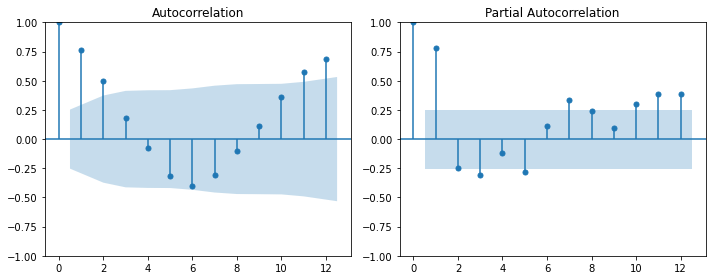


store 2 ACF and PACF plot



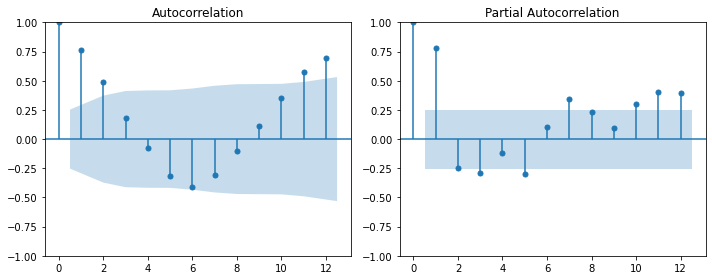


store 3 ACF and PACF plot



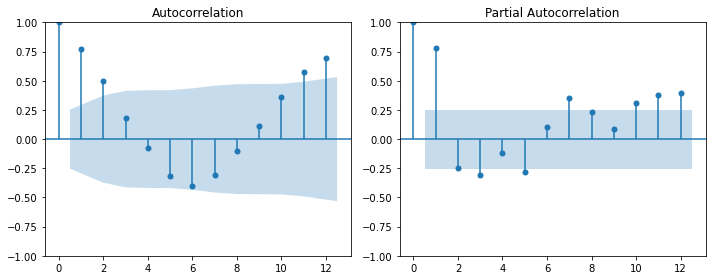


store 4 ACF and PACF plot



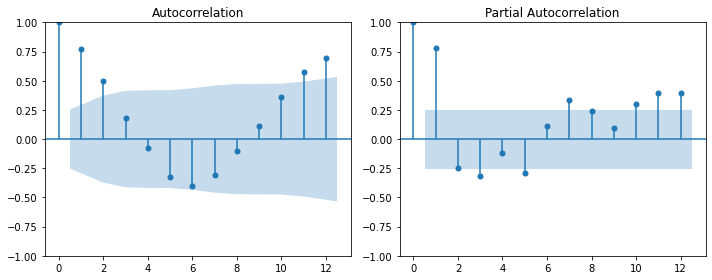


store 5 ACF and PACF plot



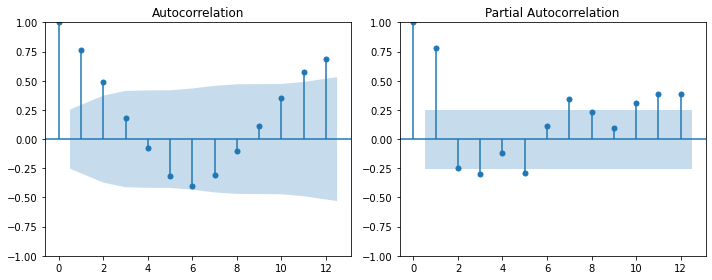


store 6 ACF and PACF plot



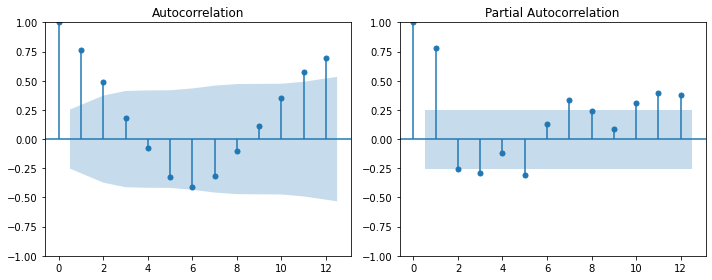


store 7 ACF and PACF plot



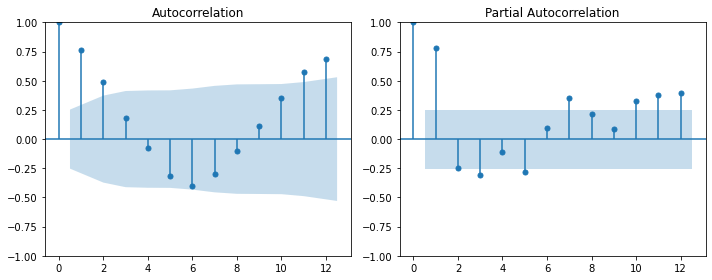


store 8 ACF and PACF plot



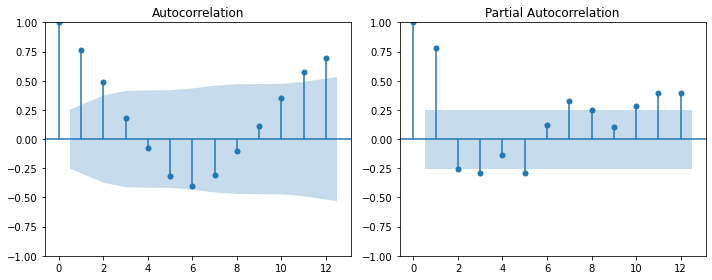


store 9 ACF and PACF plot



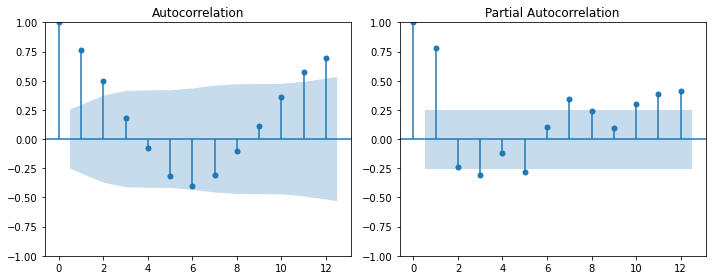


store 10 ACF and PACF plot



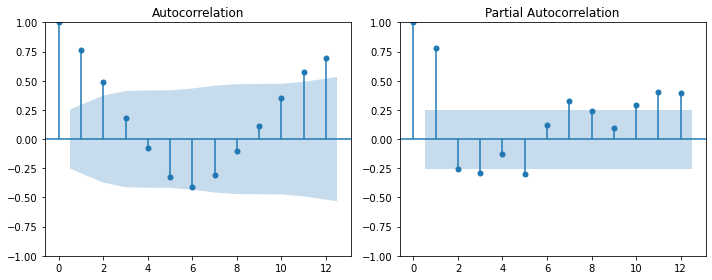

In [64]:
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    print("\nstore "+str(i)+' ACF and PACF plot\n')
    acf  = plt.subplot(121)
    pacf = plt.subplot(122)
    # Plot the autocorrelation function:
    fig1=tsa_plots.plot_acf(dataset["sales"],ax=acf, lags = 12)
    #Plot partial autocorrelation
    fig2=tsa_plots.plot_pacf(dataset["sales"],ax=pacf, lags=12)
    fig1.set_size_inches((10, 4))
    fig1.tight_layout()
    fig2.set_size_inches((10, 4))
    fig2.tight_layout()
    plt.show() 

From PACF,AR ,p=1 or 11
d=0
From ACF,MA q=2 or 3
#All the stores posses similar kind of ACF and PACF plot

3.For loop

In [35]:
import itertools

In [53]:
p=range(1,4)
q=range(1,4)
d=range(0,3)

In [54]:
pdq_comp=list(itertools.product(p,d,q))

In [55]:
len(pdq_comp)

27

In [57]:
rmse=[]
order1=[]

In [58]:
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    train = dataset.iloc[:48]
    test = dataset.iloc[48:] 
    for j in pdq_comp:
        try:
            model=sm.tsa.arima.ARIMA(train,order=j).fit()
            pred=model.predict(start=len(train),end=(len(dataset)-1))
            error=np.sqrt(mean_squared_error(test,pred))
            order1.append(j)
            rmse.append(error)
        except:
            continue
    results=pd.DataFrame(index=order1,data=rmse,columns=["RMSE"])
    print("\nstore"+str(i)+'\n')
    print("min rmse : ",results.min())
    print("min rmse order : ",results.idxmin())


store1

min rmse :  RMSE    235.608382
dtype: float64
min rmse order :  RMSE    (3, 0, 3)
dtype: object

store2

min rmse :  RMSE    235.608382
dtype: float64
min rmse order :  RMSE    (3, 0, 3)
dtype: object

store3

min rmse :  RMSE    235.608382
dtype: float64
min rmse order :  RMSE    (3, 0, 3)
dtype: object

store4

min rmse :  RMSE    235.608382
dtype: float64
min rmse order :  RMSE    (3, 0, 3)
dtype: object

store5

min rmse :  RMSE    195.103622
dtype: float64
min rmse order :  RMSE    (3, 0, 3)
dtype: object

store6

min rmse :  RMSE    195.103622
dtype: float64
min rmse order :  RMSE    (3, 0, 3)
dtype: object

store7

min rmse :  RMSE    177.868615
dtype: float64
min rmse order :  RMSE    (3, 0, 3)
dtype: object

store8

min rmse :  RMSE    177.868615
dtype: float64
min rmse order :  RMSE    (3, 0, 3)
dtype: object

store9

min rmse :  RMSE    177.868615
dtype: float64
min rmse order :  RMSE    (3, 0, 3)
dtype: object

store10

min rmse :  RMSE    177.868615
dtype: float64

store 1ARIMA model RMSE :235.60838150859394
store 2ARIMA model RMSE :338.6428907112205
store 3ARIMA model RMSE :297.7035824431361
store 4ARIMA model RMSE :266.1793678188769
store 5ARIMA model RMSE :195.1036224696326
store 6ARIMA model RMSE :205.6994562120441
store 7ARIMA model RMSE :177.86861507066294
store 8ARIMA model RMSE :332.1675596423837
store 9ARIMA model RMSE :285.51759742737426
store 10ARIMA model RMSE :297.4704039534543


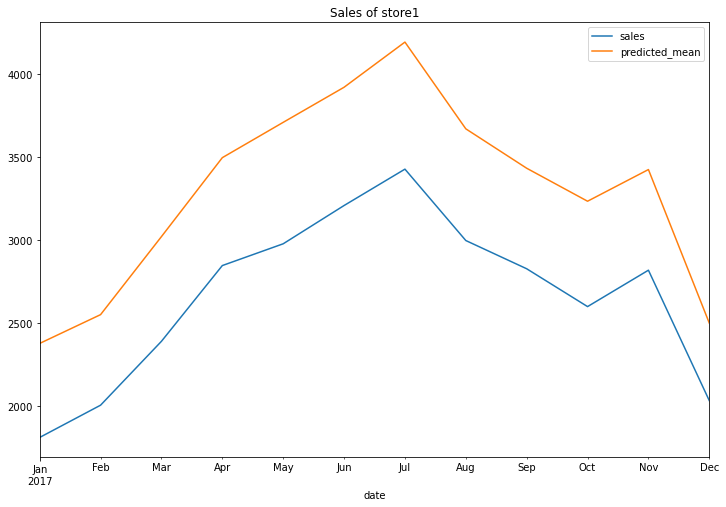

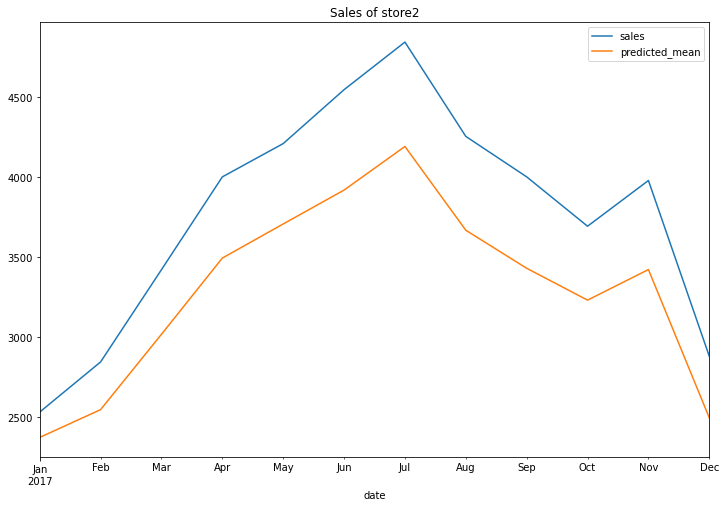

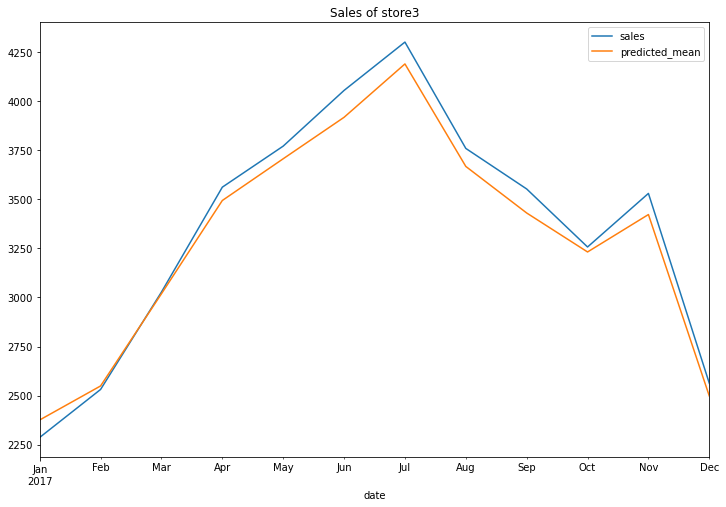

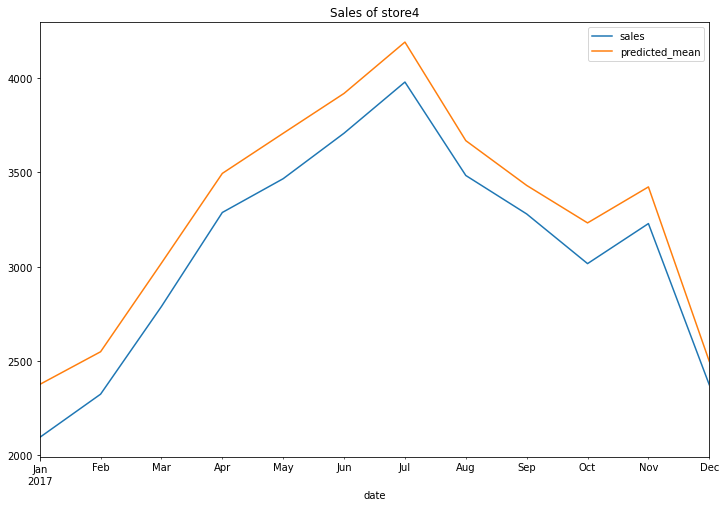

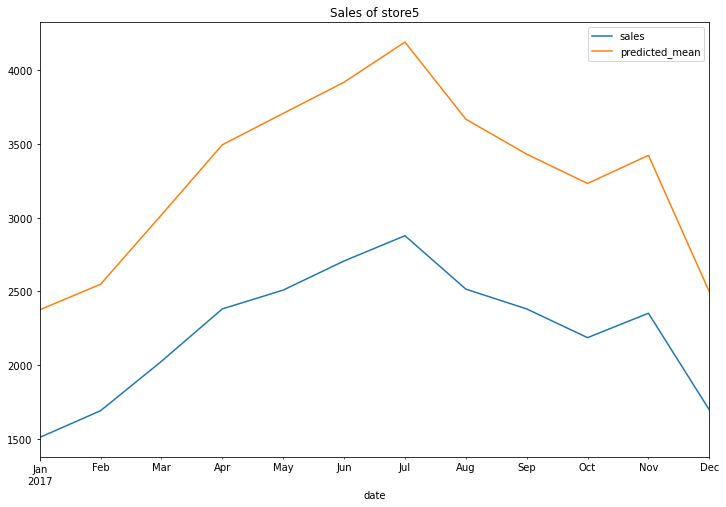

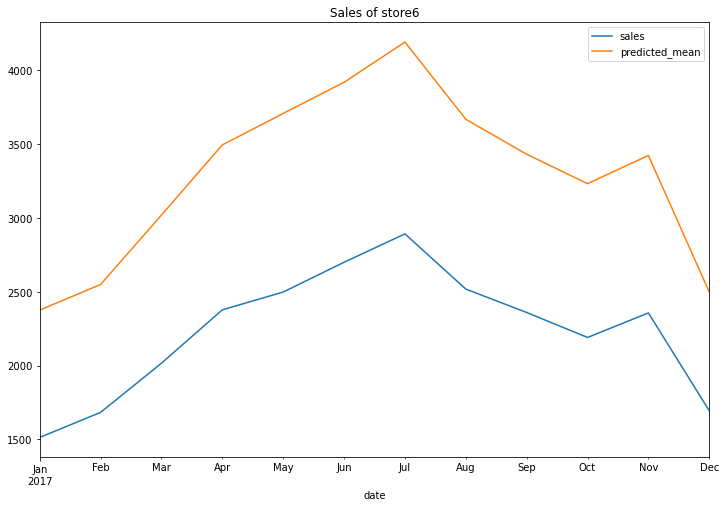

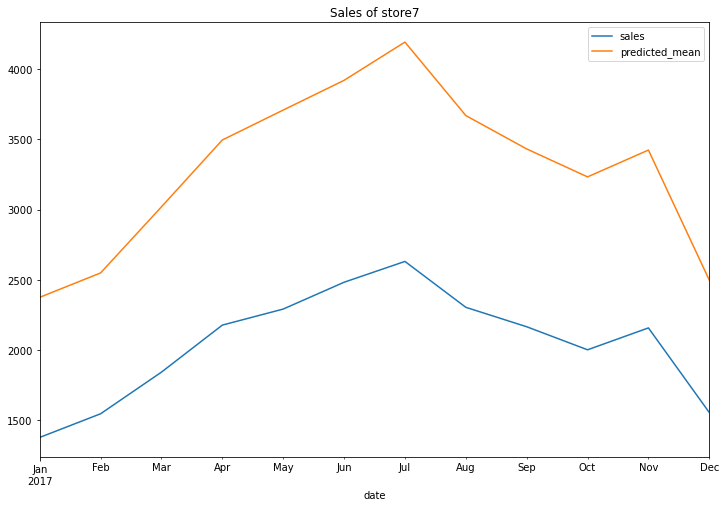

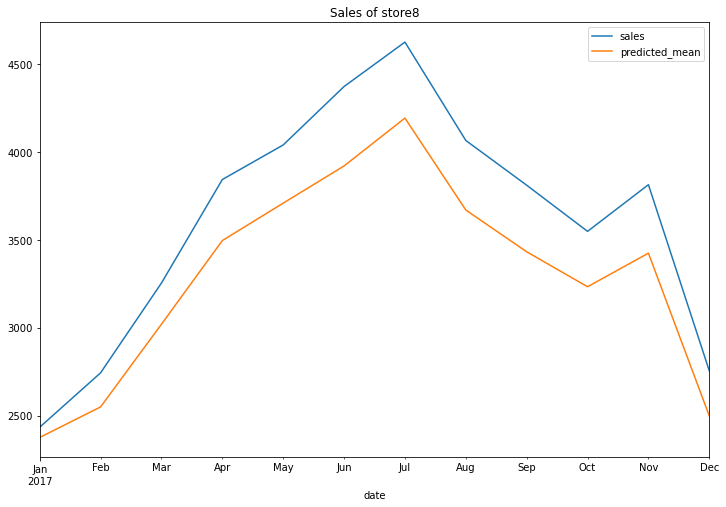

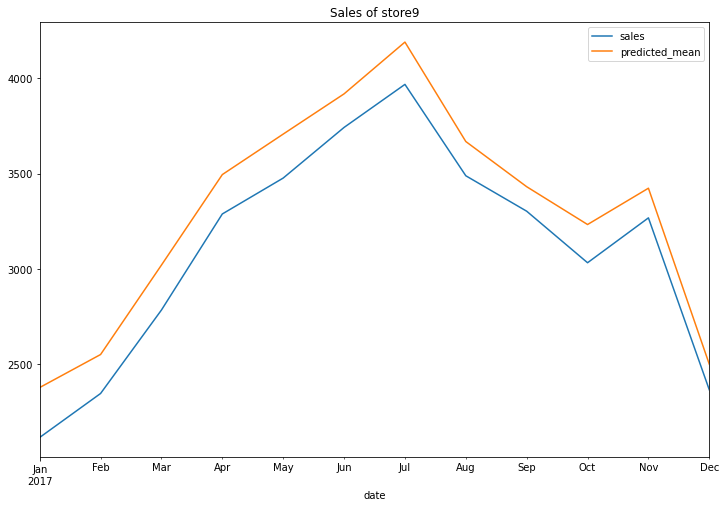

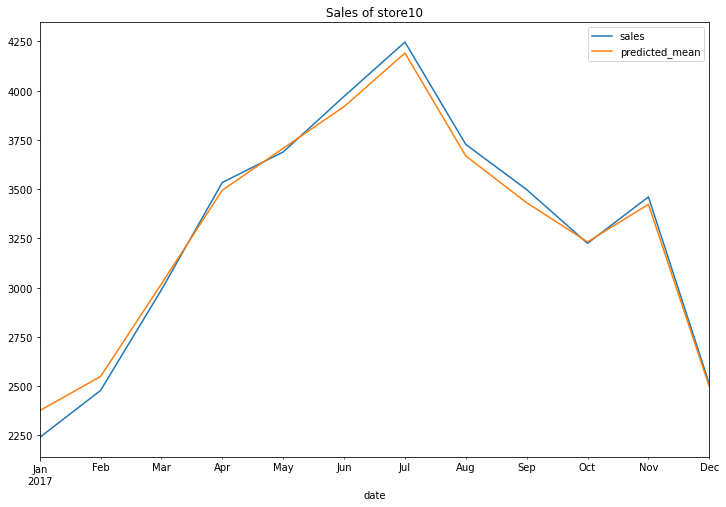

In [70]:
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    train = dataset.iloc[:48]
    test = dataset.iloc[48:] 
    model_arima=sm.tsa.arima.ARIMA(train,order=(3,0,3)).fit()
    pred_start_date=test.index[0]
    pred_end_date=test.index[-1]
    pred=model_arima.predict(start=pred_start_date,end=pred_end_date)
    msc=mean_squared_error(test,pred)
    rmse=np.sqrt(msc)
    print("store "+str(i)+"ARIMA model RMSE :"+str(rmse))
    test.plot(figsize=(12,8),legend=True)
    prediction.plot(legend=True)
    plt.title("Sales of store"+str(i))

# ARIMA MODEL BUILDING

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2286.4466    541.361      4.224      0.000    1225.398    3347.495
ar.L1          2.7138      0.081     33.439      0.000       2.555       2.873
ar.L2         -2.6982      0.136    -19.870      0.000      -2.964      -2.432
ar.L3          0.9789      0.078     12.597      0.000       0.827       1.131
ma.L1         -2.4040      0.341     -7.046      0.000      -3.073      -1.735
ma.L2          2.1701      0.686      3.163      0.002       0.826       3.515
ma.L3         -0.6782      0.401     -1.693      0.091      -1.464       0.107
sigma2      5.731e+04      0.056   1.02e+06      0.000    5.73e+04    5.73e+04


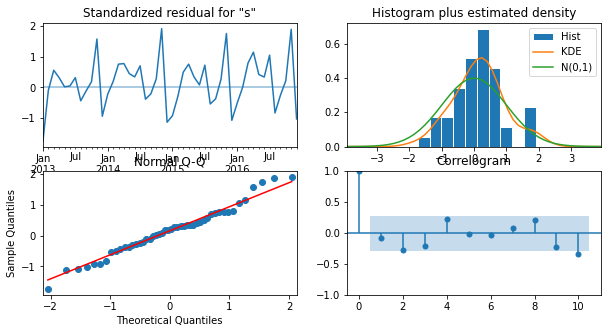

store 1ARIMA model RMSE :235.60838150859394
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3243.9097      0.000   1.82e+07      0.000    3243.909    3243.910
ar.L1          2.7130      0.073     37.117      0.000       2.570       2.856
ar.L2         -2.6955      0.127    -21.170      0.000      -2.945      -2.446
ar.L3          0.9764      0.076     12.906      0.000       0.828       1.125
ma.L1         -2.4449      0.351     -6.957      0.000      -3.134      -1.756
ma.L2          2.2395      0.736      3.043      0.002       0.797       3.682
ma.L3         -0.7180      0.421     -1.706      0.088      -1.543       0.107
sigma2        1.2e+05   1.48e-05    8.1e+09      0.000     1.2e+05     1.2e+05


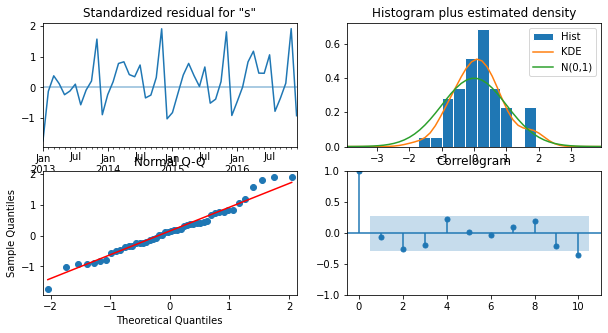

store 2ARIMA model RMSE :338.6428907112205
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2879.5915    9.7e-05   2.97e+07      0.000    2879.591    2879.592
ar.L1          2.7091      0.087     31.010      0.000       2.538       2.880
ar.L2         -2.6926      0.141    -19.160      0.000      -2.968      -2.417
ar.L3          0.9775      0.075     13.048      0.000       0.831       1.124
ma.L1         -2.3717      0.328     -7.240      0.000      -3.014      -1.730
ma.L2          2.1142      0.585      3.615      0.000       0.968       3.261
ma.L3         -0.6455      0.332     -1.944      0.052      -1.297       0.005
sigma2       8.97e+04   1.51e-05   5.93e+09      0.000    8.97e+04    8.97e+04


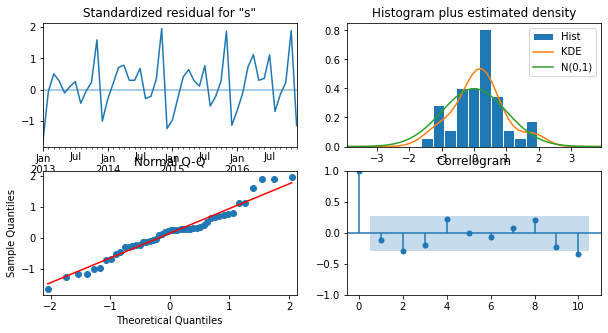

store 3ARIMA model RMSE :297.7035824431361
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2656.6381      0.000   1.21e+07      0.000    2656.638    2656.639
ar.L1          2.7130      0.074     36.654      0.000       2.568       2.858
ar.L2         -2.6965      0.120    -22.413      0.000      -2.932      -2.461
ar.L3          0.9775      0.067     14.691      0.000       0.847       1.108
ma.L1         -2.3764      0.318     -7.485      0.000      -2.999      -1.754
ma.L2          2.1185      0.628      3.372      0.001       0.887       3.350
ma.L3         -0.6470      0.361     -1.792      0.073      -1.355       0.061
sigma2      7.579e+04    1.9e-05   3.99e+09      0.000    7.58e+04    7.58e+04


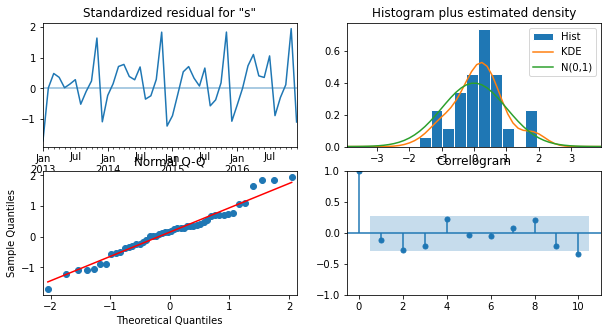

store 4ARIMA model RMSE :266.1793678188769
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1924.0320      0.000   6.99e+06      0.000    1924.031    1924.032
ar.L1          2.7133      0.072     37.604      0.000       2.572       2.855
ar.L2         -2.6978      0.120    -22.487      0.000      -2.933      -2.463
ar.L3          0.9790      0.068     14.329      0.000       0.845       1.113
ma.L1         -2.4417      0.340     -7.180      0.000      -3.108      -1.775
ma.L2          2.2331      0.700      3.192      0.001       0.862       3.604
ma.L3         -0.7137      0.419     -1.703      0.089      -1.535       0.108
sigma2      4.183e+04   4.02e-05   1.04e+09      0.000    4.18e+04    4.18e+04


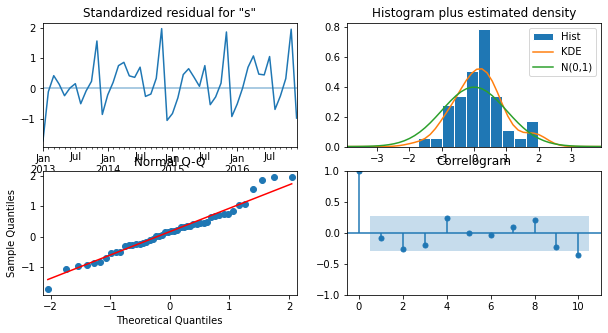

store 5ARIMA model RMSE :195.1036224696326
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1922.6095    365.612      5.259      0.000    1206.024    2639.196
ar.L1          2.7089      0.083     32.576      0.000       2.546       2.872
ar.L2         -2.6902      0.142    -19.008      0.000      -2.968      -2.413
ar.L3          0.9746      0.082     11.877      0.000       0.814       1.135
ma.L1         -2.4373      0.349     -6.980      0.000      -3.122      -1.753
ma.L2          2.2312      0.741      3.010      0.003       0.779       3.684
ma.L3         -0.7153      0.442     -1.617      0.106      -1.582       0.152
sigma2       4.07e+04      0.068   5.99e+05      0.000    4.07e+04    4.07e+04


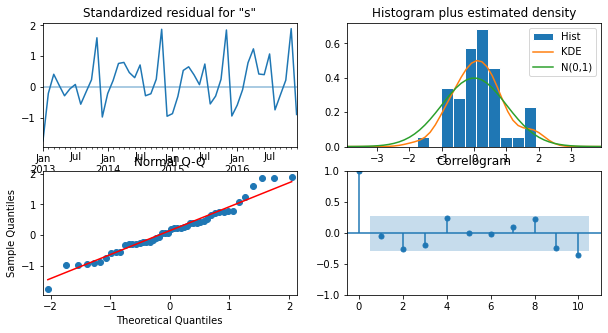

store 6ARIMA model RMSE :205.6994562120441
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1759.2593    467.792      3.761      0.000     842.404    2676.115
ar.L1          2.7169      0.077     35.069      0.000       2.565       2.869
ar.L2         -2.7040      0.129    -21.041      0.000      -2.956      -2.452
ar.L3          0.9824      0.073     13.452      0.000       0.839       1.126
ma.L1         -2.4124      0.325     -7.432      0.000      -3.049      -1.776
ma.L2          2.1863      0.661      3.307      0.001       0.890       3.482
ma.L3         -0.6888      0.395     -1.742      0.082      -1.464       0.086
sigma2      3.504e+04      0.180   1.95e+05      0.000     3.5e+04     3.5e+04


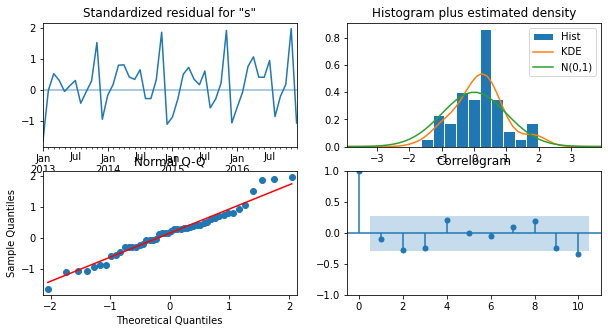

store 7ARIMA model RMSE :177.86861507066294
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3103.3640    591.428      5.247      0.000    1944.186    4262.542
ar.L1          2.7069      0.089     30.287      0.000       2.532       2.882
ar.L2         -2.6863      0.153    -17.521      0.000      -2.987      -2.386
ar.L3          0.9721      0.090     10.836      0.000       0.796       1.148
ma.L1         -2.4229      0.344     -7.040      0.000      -3.097      -1.748
ma.L2          2.2052      0.729      3.027      0.002       0.777       3.633
ma.L3         -0.6997      0.440     -1.592      0.111      -1.561       0.162
sigma2       1.08e+05      0.055   1.96e+06      0.000    1.08e+05    1.08e+05


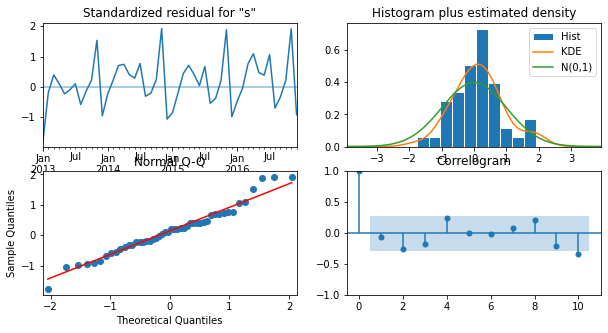

store 8ARIMA model RMSE :332.1675596423837
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2663.0876    501.280      5.313      0.000    1680.597    3645.578
ar.L1          2.7037      0.099     27.250      0.000       2.509       2.898
ar.L2         -2.6816      0.166    -16.115      0.000      -3.008      -2.355
ar.L3          0.9700      0.095     10.238      0.000       0.784       1.156
ma.L1         -2.4031      0.341     -7.053      0.000      -3.071      -1.735
ma.L2          2.1736      0.692      3.140      0.002       0.817       3.531
ma.L3         -0.6826      0.425     -1.604      0.109      -1.516       0.151
sigma2      8.212e+04      0.077   1.07e+06      0.000    8.21e+04    8.21e+04


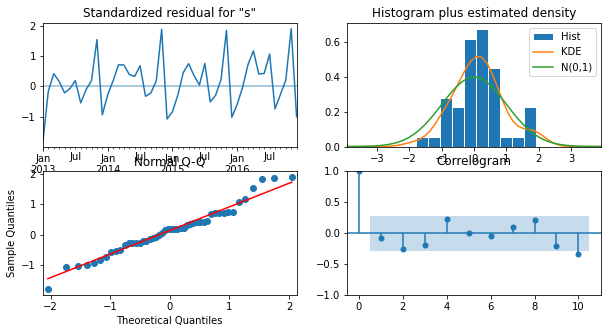

store 9ARIMA model RMSE :285.51759742737426
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2841.5435    546.378      5.201      0.000    1770.663    3912.424
ar.L1          2.7077      0.087     30.991      0.000       2.536       2.879
ar.L2         -2.6875      0.151    -17.814      0.000      -2.983      -2.392
ar.L3          0.9725      0.089     10.955      0.000       0.799       1.147
ma.L1         -2.4235      0.351     -6.914      0.000      -3.111      -1.736
ma.L2          2.2043      0.731      3.016      0.003       0.772       3.637
ma.L3         -0.6984      0.433     -1.612      0.107      -1.548       0.151
sigma2      9.137e+04      0.061   1.49e+06      0.000    9.14e+04    9.14e+04


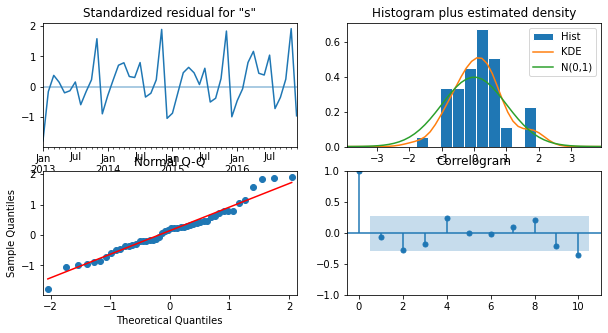

store 10ARIMA model RMSE :297.4704039534543


In [36]:
error_rmse4=[]
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    train = dataset.iloc[:48]
    test = dataset.iloc[48:] 
    model_arima=sm.tsa.arima.ARIMA(train,order=(3,0,3)).fit()
    print(model_arima.summary().tables[1])
    model_arima.plot_diagnostics(figsize=(10,5))
    plt.show()
    pred_start_date=test.index[0]
    pred_end_date=test.index[-1]
    pred=model_arima.predict(start=pred_start_date,end=pred_end_date)
    msc=mean_squared_error(test,pred)
    rmse=np.sqrt(msc)
    print("store "+str(i)+"ARIMA model RMSE :"+str(rmse))
    error_rmse4.append(rmse)
df['ARIMA_RMSE']=error_rmse4

In [37]:
df

Store_id  Simp_expo_RMSE    holt_RMSE  holt_addi_RMSE  holt_multi_RMSE  \
0   store1      861.535407   785.436572       68.009404       125.040292   
1   store2     1229.206674  1011.041558       96.221775       173.274062   
2   store3     1095.078820  1364.713665       84.872480       135.615910   
3   store4      998.285670  1446.762894       80.462325       145.050865   
4   store5      728.421006   924.480022       59.512484       107.920219   
5   store6      726.611785   748.390174       60.786621        90.474991   
6   store7      669.698000   855.049511       55.727190        93.855758   
7   store8     1169.227621  1357.016980       86.403448       165.480207   
8   store9     1018.353832   933.247351       76.251557       124.971550   
9  store10     1078.439575   918.195421       83.872395       148.426269   

   ARIMA_RMSE  
0  235.608382  
1  338.642891  
2  297.703582  
3  266.179368  
4  195.103622  
5  205.699456  
6  177.868615  
7  332.167560  
8  285.517597  
9  297.470404

# SARIMAX

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Hyperparameters of SARIMAX

In [41]:
p=range(1,3)
q=range(1,3)
d=range(0,2)

In [42]:
pdq_comp1=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [43]:
rmse10=[]
order2=[]
seas_order=[]

In [44]:
for i in data['store'].unique():
    print("\nstore"+str(i)+'\n')
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    train = dataset.iloc[:48]
    test = dataset.iloc[48:] 
    for j in pdq_comp1:
        for k in seasonal_pdq:
            try:
                model=sm.tsa.statespace.SARIMAX(train,order=j,seasonal_order=k,enforce_stationarity=False,enforce_invertibility=False).fit()
                pred=model.predict(start=len(train),end=(len(dataset)-1))
                error=np.sqrt(mean_squared_error(test,pred))
                order2.append(j)
                seas_order.append(k)
                rmse10.append(error)
            except:
                continue
    df1 = {'order': order2,'seasonal_order': seas_order,"RMSE":rmse10}
    results=pd.DataFrame(df1)
    results.set_index(['order','seasonal_order'])
    print("min rmse : ",results.min())
    #print("min rmse order : ",results.idxmin())


store1

min rmse :  order                 (1, 0, 1)
seasonal_order    (1, 0, 1, 12)
RMSE                  28.159999
dtype: object

store2

min rmse :  order                 (1, 0, 1)
seasonal_order    (1, 0, 1, 12)
RMSE                  28.159999
dtype: object

store3

min rmse :  order                 (1, 0, 1)
seasonal_order    (1, 0, 1, 12)
RMSE                  28.159999
dtype: object

store4

min rmse :  order                 (1, 0, 1)
seasonal_order    (1, 0, 1, 12)
RMSE                  28.159999
dtype: object

store5

min rmse :  order                 (1, 0, 1)
seasonal_order    (1, 0, 1, 12)
RMSE                  24.265237
dtype: object

store6

min rmse :  order                 (1, 0, 1)
seasonal_order    (1, 0, 1, 12)
RMSE                  22.162405
dtype: object

store7

min rmse :  order                 (1, 0, 1)
seasonal_order    (1, 0, 1, 12)
RMSE                  22.162405
dtype: object

store8

min rmse :  order                 (1, 0, 1)
seasonal_order    (1, 0, 1, 12

store 1SARIMA model RMSE :49.53015478999305
store 2SARIMA model RMSE :63.922198063775
store 3SARIMA model RMSE :50.86850301317848
store 4SARIMA model RMSE :50.08828299690044
store 5SARIMA model RMSE :38.29094647107569
store 6SARIMA model RMSE :37.69302410819846
store 7SARIMA model RMSE :43.92727725619723
store 8SARIMA model RMSE :65.08933567763961
store 9SARIMA model RMSE :44.92112661347621
store 10SARIMA model RMSE :58.875006772718564


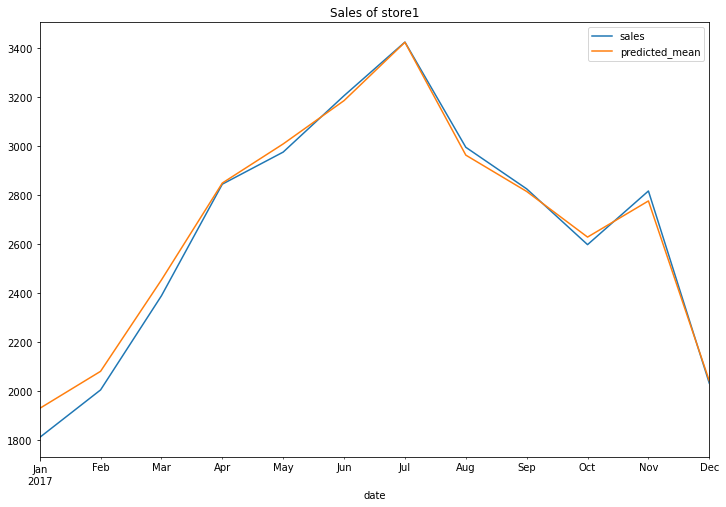

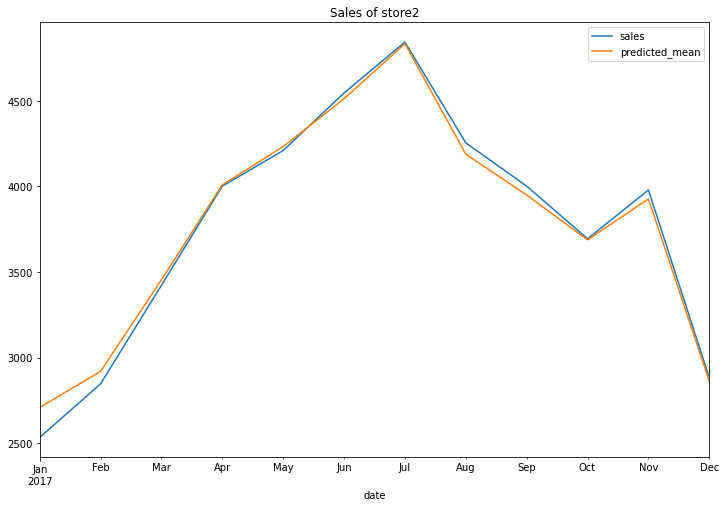

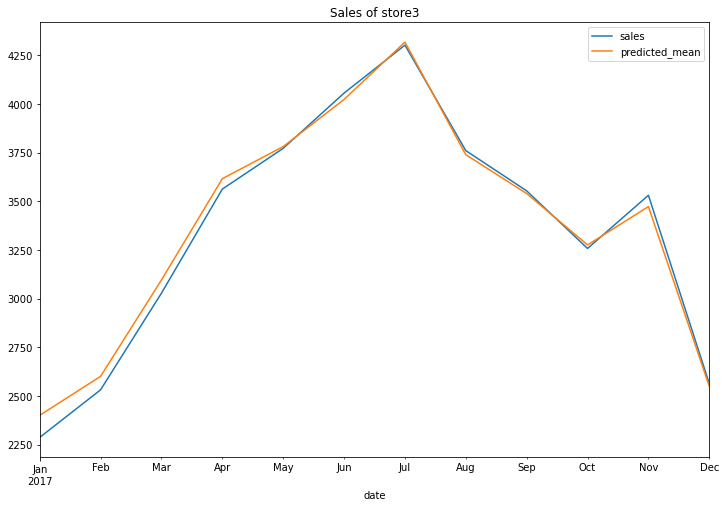

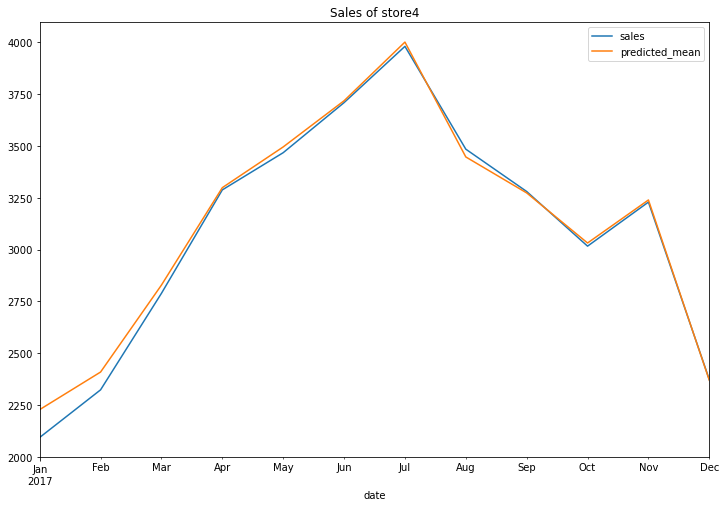

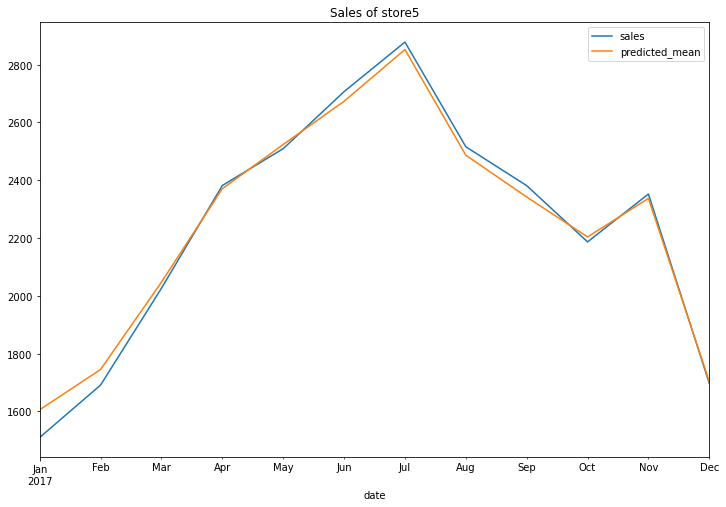

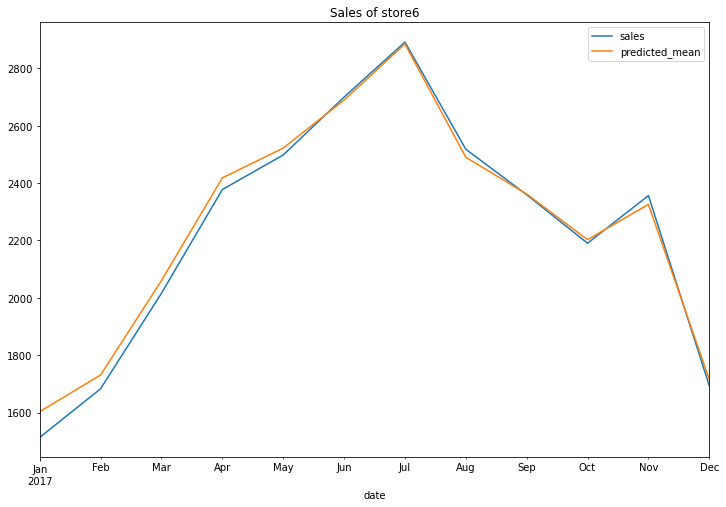

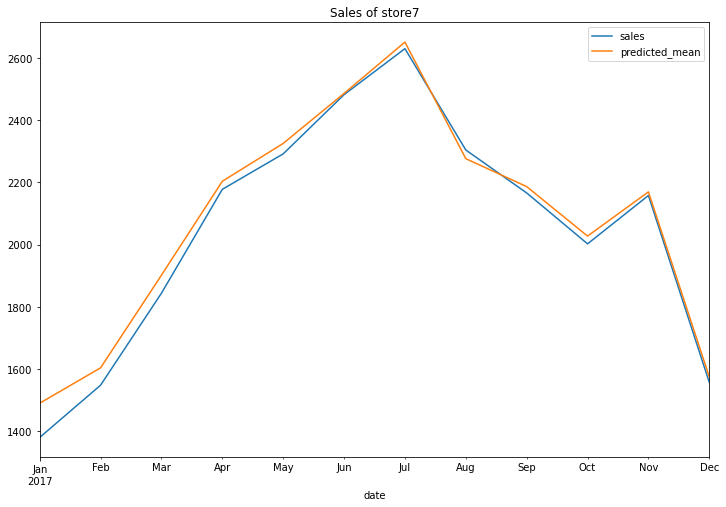

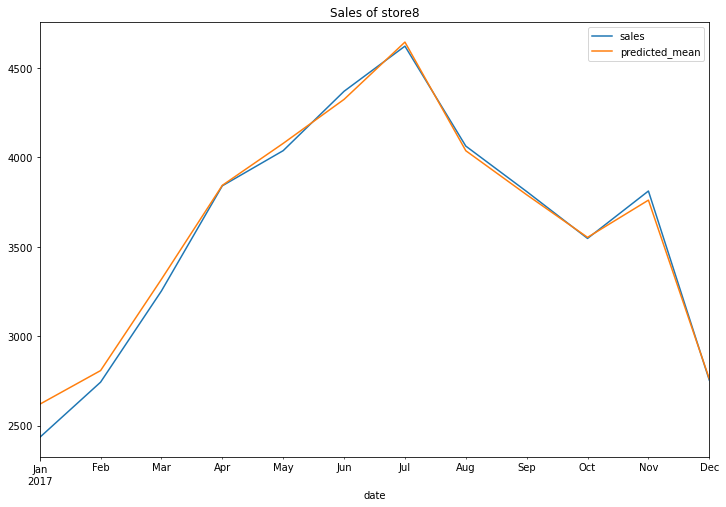

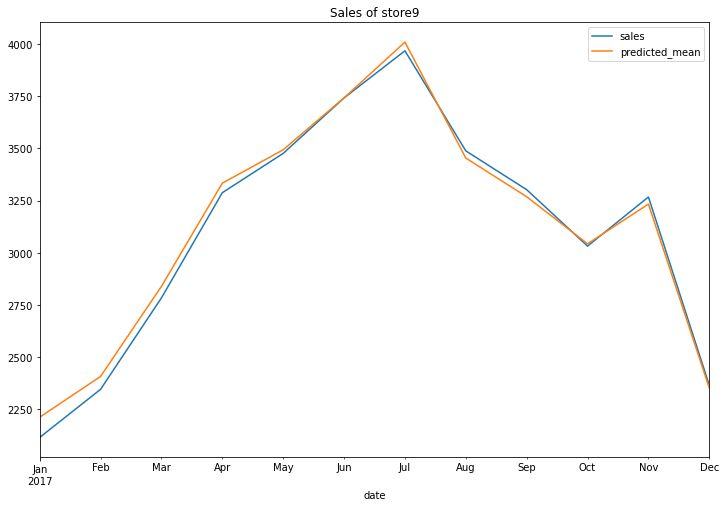

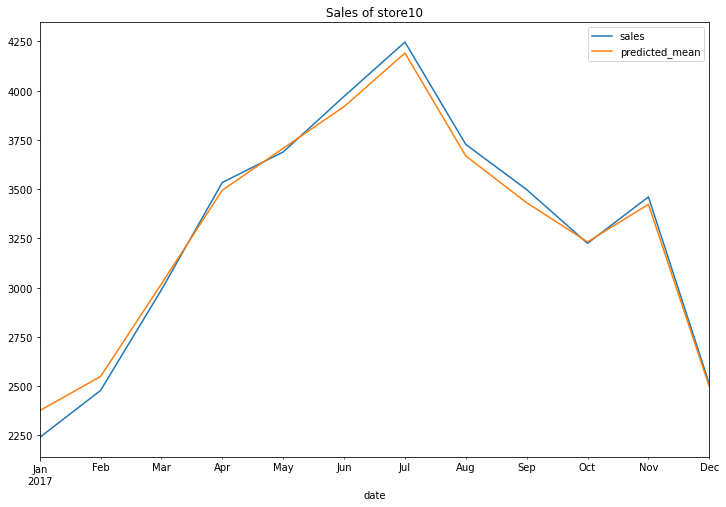

In [69]:
#Sarimax model building
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    train = dataset.iloc[:48]
    test = dataset.iloc[48:] 
    model_sarimax = sm.tsa.statespace.SARIMAX(train,order=(1,0,1),seasonal_order=(1,0,1,12)).fit()
    start = len(train)
    end = len(dataset)-1
    prediction = model_sarimax.predict(start,end)
    msc=mean_squared_error(test,prediction)
    error1=np.sqrt(msc)
    print("store "+str(i)+"SARIMA model RMSE :"+str(error1))
    test.plot(figsize=(12,8),legend=True)
    prediction.plot(legend=True)
    plt.title("Sales of store"+str(i))

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9625      0.031     31.502      0.000       0.903       1.022
ma.L1          0.0597      0.127      0.468      0.640      -0.190       0.309
ar.S.L12       0.9848      0.015     64.939      0.000       0.955       1.015
ma.S.L12      -0.0158      0.221     -0.071      0.943      -0.449       0.417
sigma2      2785.0113    760.377      3.663      0.000    1294.699    4275.323


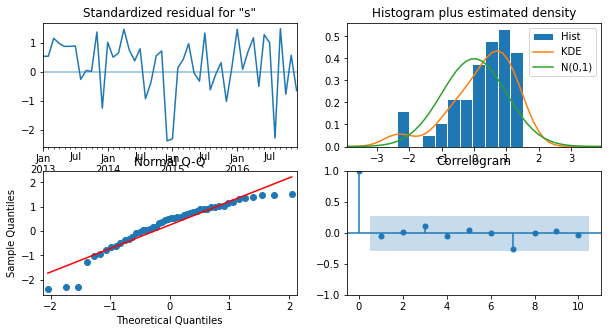

store 1SARIMA model RMSE :49.53015478999305
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9620      0.028     34.229      0.000       0.907       1.017
ma.L1          0.0427      0.144      0.296      0.767      -0.240       0.325
ar.S.L12       0.9858      0.015     65.979      0.000       0.957       1.015
ma.S.L12      -0.0600      0.251     -0.240      0.811      -0.551       0.431
sigma2      5901.6353   1632.704      3.615      0.000    2701.595    9101.676


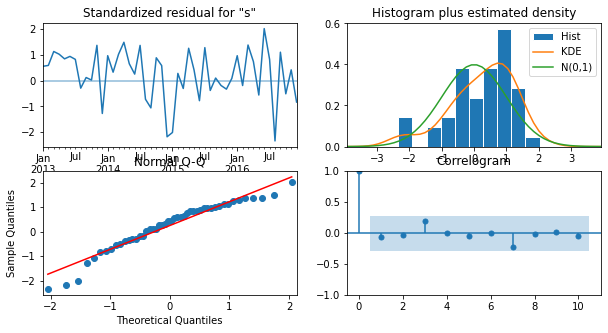

store 2SARIMA model RMSE :63.922198063775
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9610      0.032     30.411      0.000       0.899       1.023
ma.L1          0.0500      0.137      0.366      0.715      -0.218       0.318
ar.S.L12       0.9825      0.018     54.616      0.000       0.947       1.018
ma.S.L12       0.0712      0.252      0.283      0.777      -0.422       0.565
sigma2      4348.6219   1362.959      3.191      0.001    1677.272    7019.972


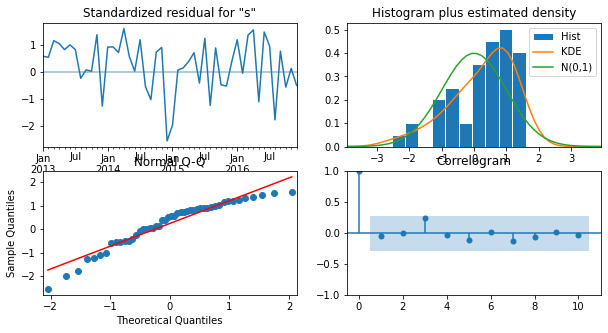

store 3SARIMA model RMSE :50.86850301317848
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9651      0.028     34.581      0.000       0.910       1.020
ma.L1         -0.0037      0.135     -0.028      0.978      -0.268       0.261
ar.S.L12       0.9848      0.015     67.387      0.000       0.956       1.013
ma.S.L12       0.0617      0.257      0.240      0.810      -0.442       0.566
sigma2      3443.3605    824.108      4.178      0.000    1828.138    5058.583


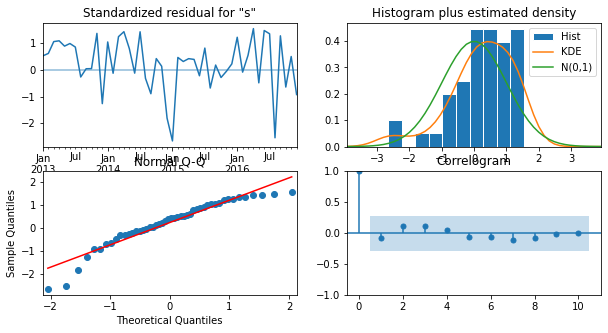

store 4SARIMA model RMSE :50.08828299690044
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9687      0.024     40.645      0.000       0.922       1.015
ma.L1          0.0257      0.136      0.189      0.850      -0.241       0.293
ar.S.L12       0.9940      0.007    152.773      0.000       0.981       1.007
ma.S.L12      -0.1912      0.204     -0.937      0.349      -0.591       0.209
sigma2      1864.1200    484.810      3.845      0.000     913.910    2814.330


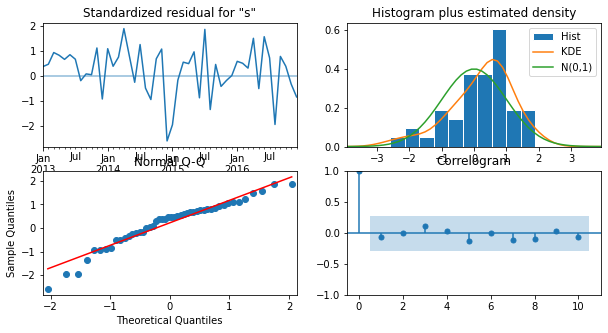

store 5SARIMA model RMSE :38.29094647107569
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9630      0.030     32.173      0.000       0.904       1.022
ma.L1         -0.0276      0.164     -0.169      0.866      -0.349       0.294
ar.S.L12       0.9804      0.018     54.842      0.000       0.945       1.015
ma.S.L12       0.1175      0.225      0.523      0.601      -0.323       0.558
sigma2      2064.9676    474.952      4.348      0.000    1134.079    2995.856


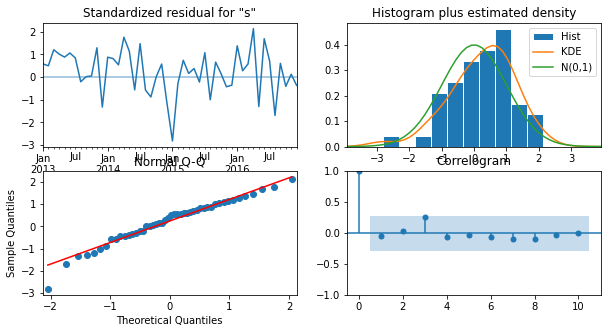

store 6SARIMA model RMSE :37.69302410819846
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9611      0.033     28.895      0.000       0.896       1.026
ma.L1          0.0416      0.136      0.305      0.760      -0.225       0.308
ar.S.L12       0.9781      0.020     49.466      0.000       0.939       1.017
ma.S.L12       0.2430      0.194      1.253      0.210      -0.137       0.623
sigma2      1535.6843    406.937      3.774      0.000     738.102    2333.267


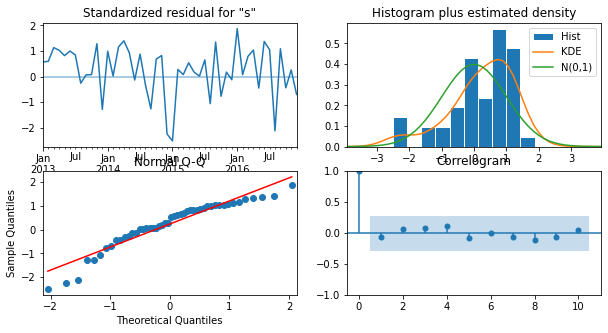

store 7SARIMA model RMSE :43.92727725619723
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9611      0.028     33.869      0.000       0.905       1.017
ma.L1          0.0789      0.135      0.586      0.558      -0.185       0.343
ar.S.L12       0.9843      0.016     62.161      0.000       0.953       1.015
ma.S.L12       0.0271      0.229      0.118      0.906      -0.421       0.475
sigma2      4843.9084   1283.581      3.774      0.000    2328.136    7359.681


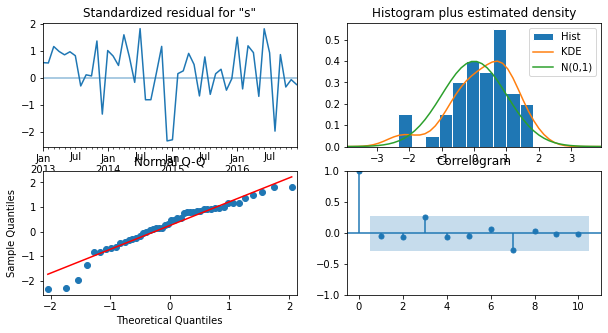

store 8SARIMA model RMSE :65.08933567763961
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9598      0.031     30.856      0.000       0.899       1.021
ma.L1          0.0723      0.144      0.503      0.615      -0.210       0.354
ar.S.L12       0.9816      0.018     54.023      0.000       0.946       1.017
ma.S.L12       0.1474      0.244      0.604      0.546      -0.331       0.626
sigma2      3474.4061    931.498      3.730      0.000    1648.703    5300.109


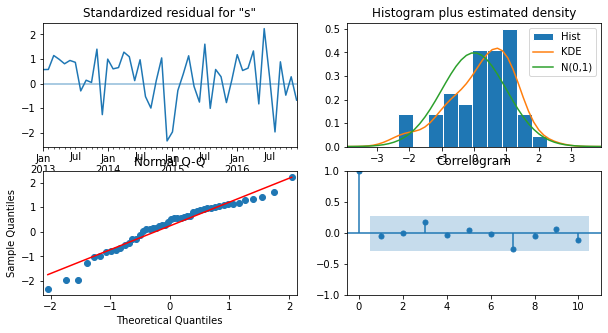

store 9SARIMA model RMSE :44.92112661347621
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9669      0.026     36.904      0.000       0.916       1.018
ma.L1          0.0007      0.140      0.005      0.996      -0.274       0.275
ar.S.L12       0.9901      0.012     80.508      0.000       0.966       1.014
ma.S.L12      -0.2187      0.275     -0.795      0.427      -0.758       0.321
sigma2      4539.8886   1399.933      3.243      0.001    1796.070    7283.707


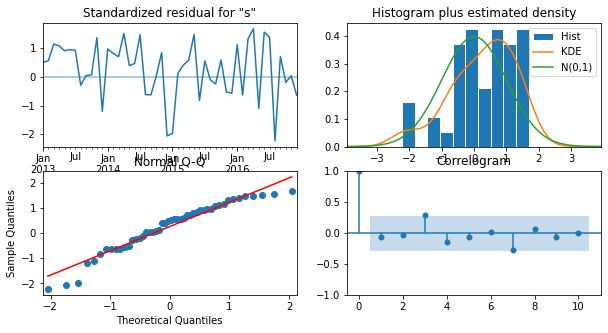

store 10SARIMA model RMSE :58.875006772718564


In [43]:
#Sarimax model building
error_rmse6=[]
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    train = dataset.iloc[:48]
    test = dataset.iloc[48:] 
    model_sarimax = sm.tsa.statespace.SARIMAX(train,order=(1,0,1),seasonal_order=(1,0,1,12)).fit()
    print(model_sarimax.summary().tables[1])
    model_sarimax.plot_diagnostics(figsize=(10,5))
    plt.show()
    start = len(train)
    end = len(dataset)-1
    prediction = model_sarimax.predict(start,end)
    msc=mean_squared_error(test,prediction)
    error1=np.sqrt(msc)
    print("store "+str(i)+"SARIMA model RMSE :"+str(error1))
    error_rmse6.append(error1)
df['SARIMAX_RMSE']=error_rmse6

In [44]:
df

Store_id  Simp_expo_RMSE    holt_RMSE  holt_addi_RMSE  holt_multi_RMSE  \
0   store1      861.535407   785.436572       68.009404       125.040292   
1   store2     1229.206674  1011.041558       96.221775       173.274062   
2   store3     1095.078820  1364.713665       84.872480       135.615910   
3   store4      998.285670  1446.762894       80.462325       145.050865   
4   store5      728.421006   924.480022       59.512484       107.920219   
5   store6      726.611785   748.390174       60.786621        90.474991   
6   store7      669.698000   855.049511       55.727190        93.855758   
7   store8     1169.227621  1357.016980       86.403448       165.480207   
8   store9     1018.353832   933.247351       76.251557       124.971550   
9  store10     1078.439575   918.195421       83.872395       148.426269   

   ARIMA_RMSE  SARIMAX_RMSE  
0  235.608382     49.530155  
1  338.642891     63.922198  
2  297.703582     50.868503  
3  266.179368     50.088283  
4  195.103622     38.290946  
5  205.699456     37.693024  
6  177.868615     43.927277  
7  332.167560     65.089336  
8  285.517597     44.921127  
9  297.470404     58.875007

In [45]:
df_rmse=df.set_index('Store_id')
df_rmse

Simp_expo_RMSE    holt_RMSE  holt_addi_RMSE  holt_multi_RMSE  \
Store_id                                                                 
store1        861.535407   785.436572       68.009404       125.040292   
store2       1229.206674  1011.041558       96.221775       173.274062   
store3       1095.078820  1364.713665       84.872480       135.615910   
store4        998.285670  1446.762894       80.462325       145.050865   
store5        728.421006   924.480022       59.512484       107.920219   
store6        726.611785   748.390174       60.786621        90.474991   
store7        669.698000   855.049511       55.727190        93.855758   
store8       1169.227621  1357.016980       86.403448       165.480207   
store9       1018.353832   933.247351       76.251557       124.971550   
store10      1078.439575   918.195421       83.872395       148.426269   

          ARIMA_RMSE  SARIMAX_RMSE  
Store_id                            
store1    235.608382     49.530155  
store2    338.642891     63.922198  
store3    297.703582     50.868503  
store4    266.179368     50.088283  
store5    195.103622     38.290946  
store6    205.699456     37.693024  
store7    177.868615     43.927277  
store8    332.167560     65.089336  
store9    285.517597     44.921127  
store10   297.470404     58.875007

In [46]:
rmse_matrix=df_rmse.T
rmse_matrix

Store_id             store1       store2       store3       store4  \
Simp_expo_RMSE   861.535407  1229.206674  1095.078820   998.285670   
holt_RMSE        785.436572  1011.041558  1364.713665  1446.762894   
holt_addi_RMSE    68.009404    96.221775    84.872480    80.462325   
holt_multi_RMSE  125.040292   173.274062   135.615910   145.050865   
ARIMA_RMSE       235.608382   338.642891   297.703582   266.179368   
SARIMAX_RMSE      49.530155    63.922198    50.868503    50.088283   

Store_id             store5      store6      store7       store8       store9  \
Simp_expo_RMSE   728.421006  726.611785  669.698000  1169.227621  1018.353832   
holt_RMSE        924.480022  748.390174  855.049511  1357.016980   933.247351   
holt_addi_RMSE    59.512484   60.786621   55.727190    86.403448    76.251557   
holt_multi_RMSE  107.920219   90.474991   93.855758   165.480207   124.971550   
ARIMA_RMSE       195.103622  205.699456  177.868615   332.167560   285.517597   
SARIMAX_RMSE      38.290946   37.693024   43.927277    65.089336    44.921127   

Store_id             store10  
Simp_expo_RMSE   1078.439575  
holt_RMSE         918.195421  
holt_addi_RMSE     83.872395  
holt_multi_RMSE   148.426269  
ARIMA_RMSE        297.470404  
SARIMAX_RMSE       58.875007

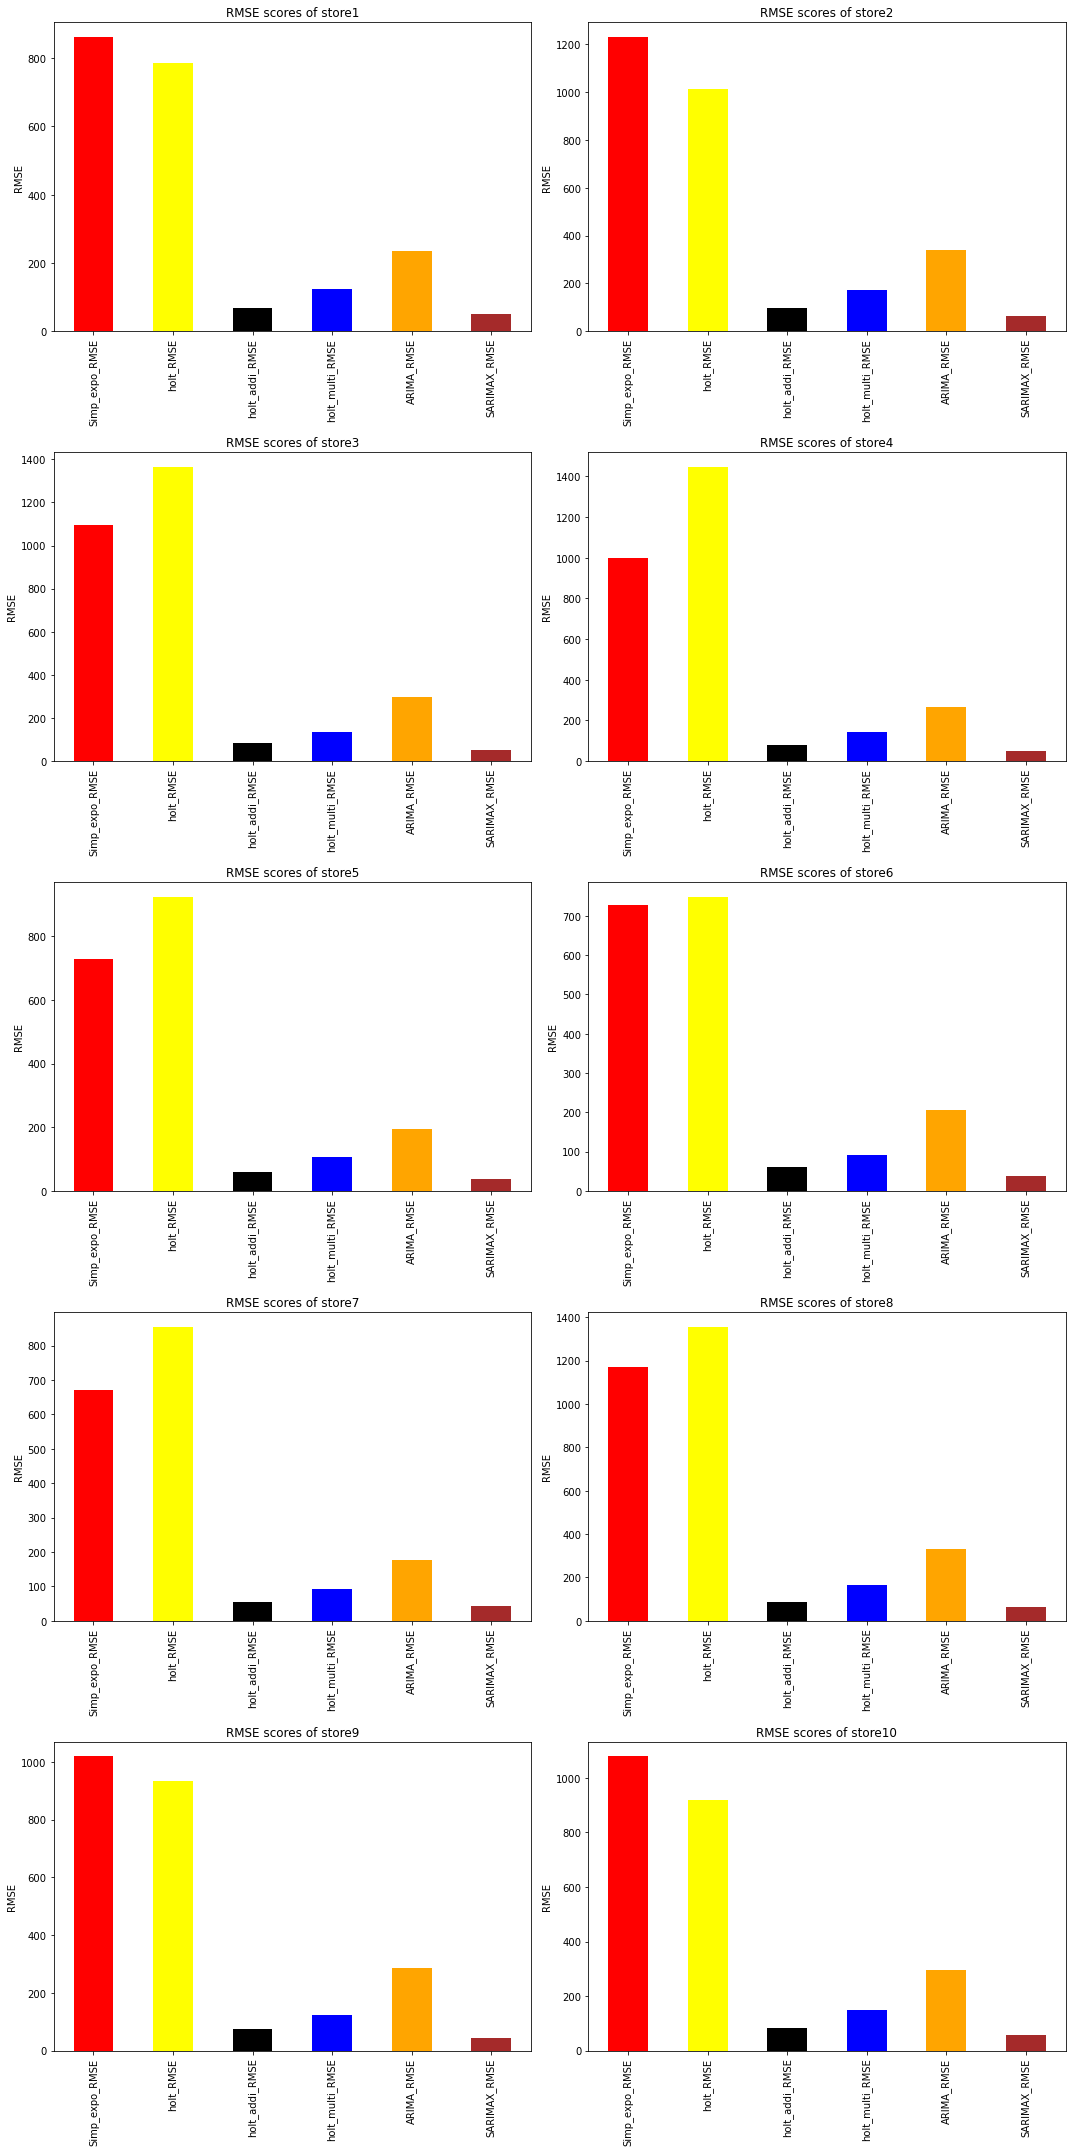

In [77]:
c = ['red', 'yellow', 'black', 'blue', 'orange','brown']
plt.figure(figsize=(15,30))
plt.subplot(5,2,1)
rmse_matrix['store1'].plot(kind='bar',color = c)
plt.title('RMSE scores of store1')
plt.ylabel("RMSE")
plt.subplot(5,2,2)
rmse_matrix['store2'].plot(kind='bar',color = c) 
plt.title('RMSE scores of store2')
plt.ylabel("RMSE")
plt.subplot(5,2,3)
rmse_matrix['store3'].plot(kind='bar',color = c)
plt.title('RMSE scores of store3')
plt.ylabel("RMSE")
plt.subplot(5,2,4)
rmse_matrix['store4'].plot(kind='bar',color = c)
plt.title('RMSE scores of store4')
plt.ylabel("RMSE")
plt.subplot(5,2,5)
rmse_matrix['store5'].plot(kind='bar',color = c)
plt.title('RMSE scores of store5')
plt.ylabel("RMSE")
plt.subplot(5,2,6)
rmse_matrix['store6'].plot(kind='bar',color = c)
plt.title('RMSE scores of store6')
plt.ylabel("RMSE")
plt.subplot(5,2,7)
rmse_matrix['store7'].plot(kind='bar',color = c)
plt.title('RMSE scores of store7')
plt.ylabel("RMSE")
plt.subplot(5,2,8)
rmse_matrix['store8'].plot(kind='bar',color = c)
plt.title('RMSE scores of store8')
plt.ylabel("RMSE")
plt.subplot(5,2,9)
rmse_matrix['store9'].plot(kind='bar',color = c)
plt.title('RMSE scores of store9')
plt.ylabel("RMSE")
plt.subplot(5,2,10)
rmse_matrix['store10'].plot(kind='bar',color = c)
plt.title('RMSE scores of store10')
plt.ylabel("RMSE")
plt.tight_layout()

From this graph,it clearly showed SARIMAX provides the best result. It has the lowest RMSE value for all the stores.So forecast the final model with SARIMAX

# Forecasting

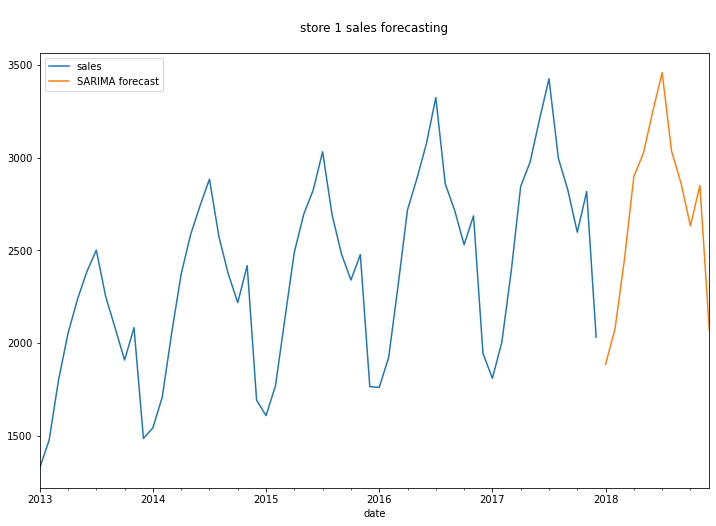

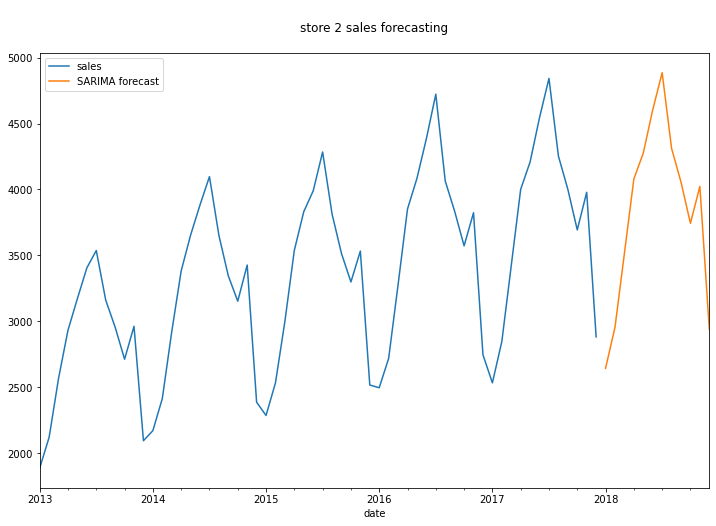

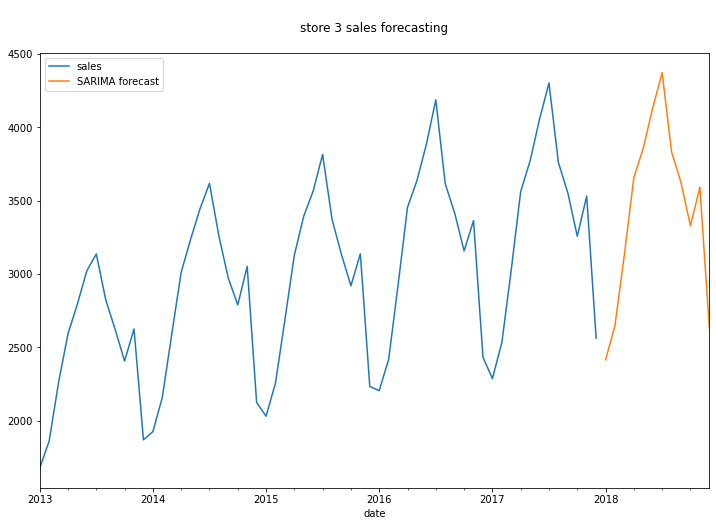

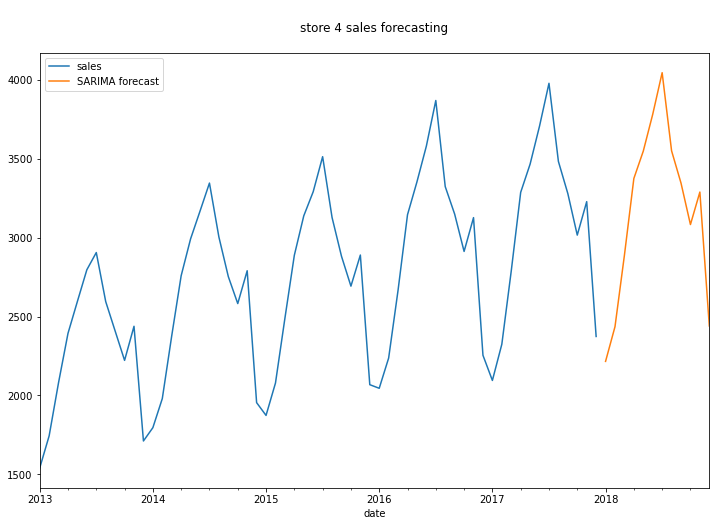

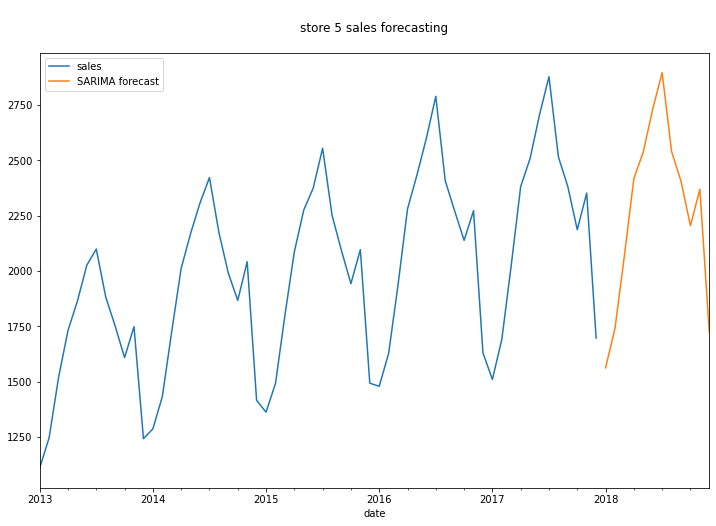

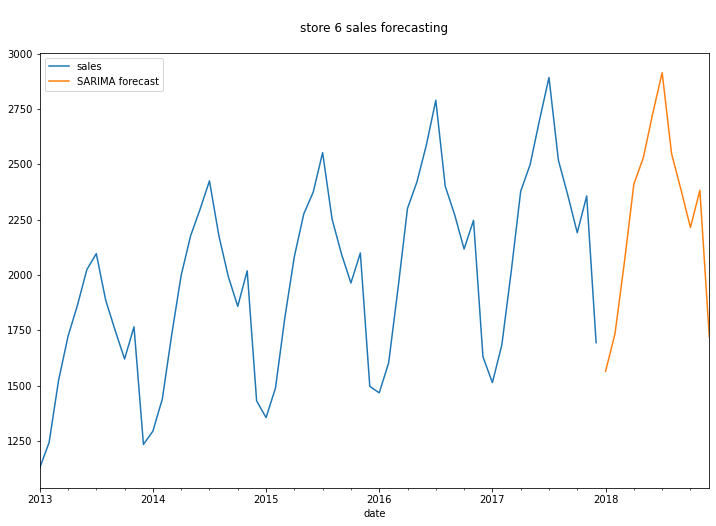

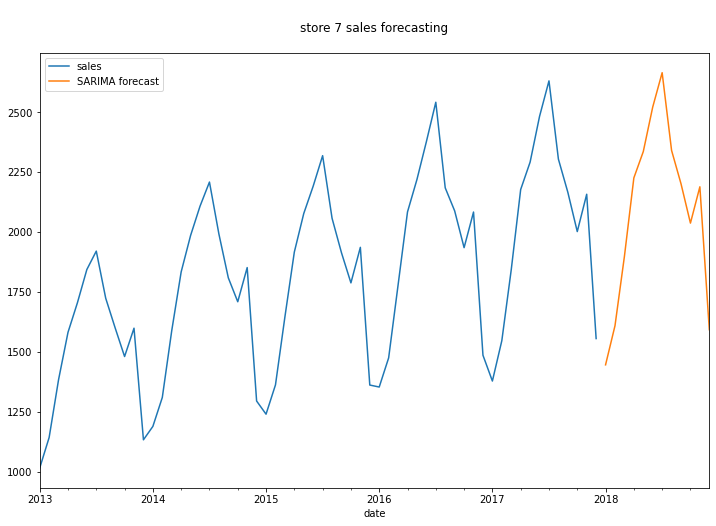

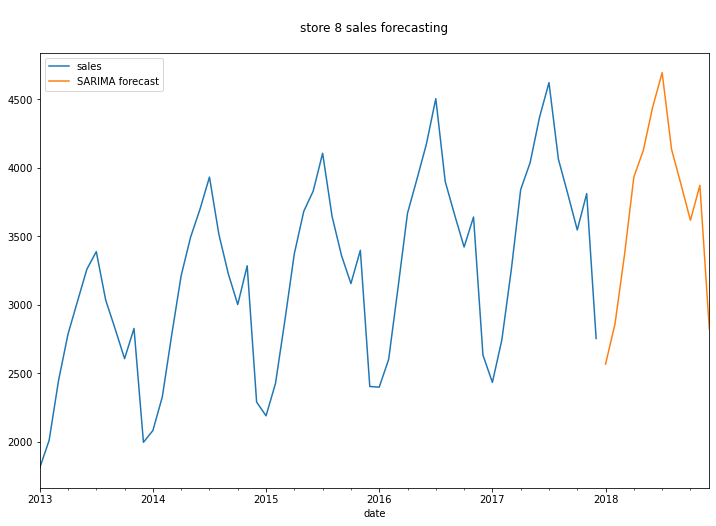

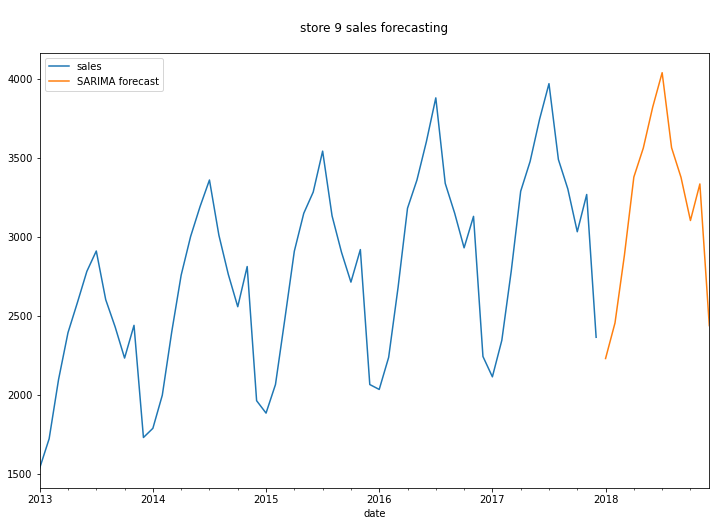

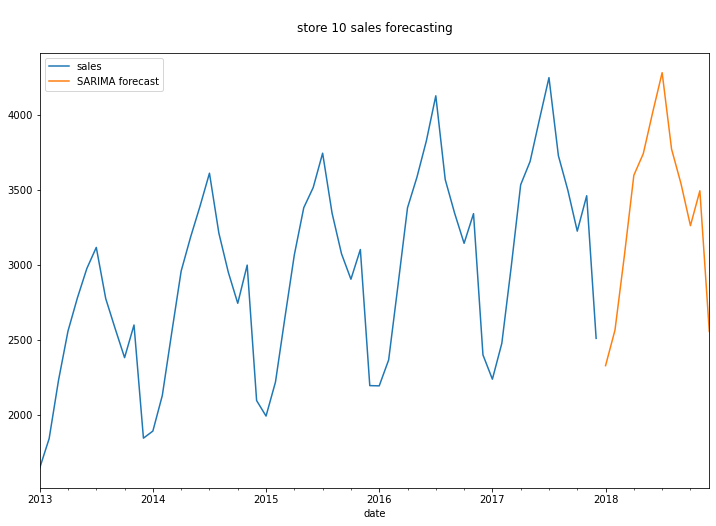

In [78]:
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    model_store_final = SARIMAX(dataset,order=(1, 0, 1),seasonal_order=(1, 0, 1, 12),enforce_invertibility=False)
    result_store_final = model_store_final.fit()
    forecast_store = result_store_final.predict(len(dataset),len(dataset)+11,typ='levels').rename('SARIMA forecast')
    dataset.plot(legend=True,figsize=(12,8))
    forecast_store.plot(legend=True)
    plt.title("\nstore "+str(i)+" sales forecasting\n")

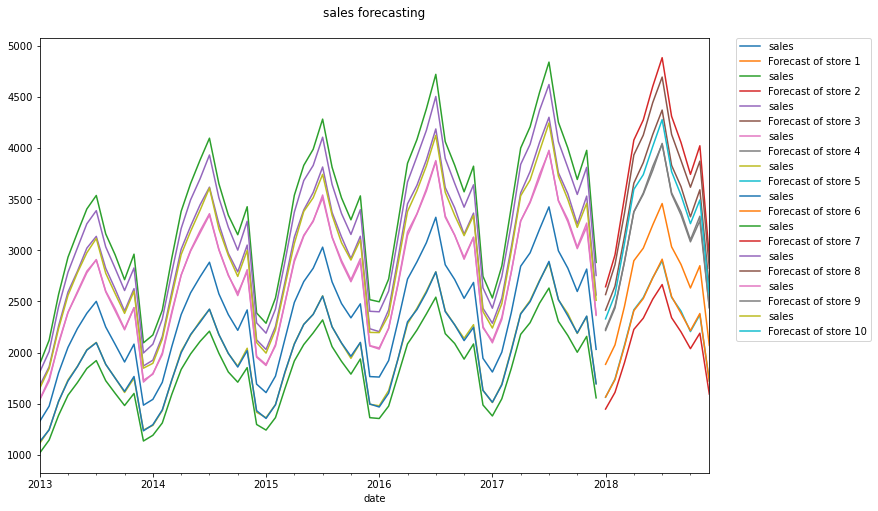

In [63]:
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    dataset=store_i.sales.resample('MS').mean()
    model_store_final = SARIMAX(dataset,order=(1, 0, 1),seasonal_order=(1, 0, 1, 12),enforce_invertibility=False)
    result_store_final = model_store_final.fit()
    forecast_store = result_store_final.predict(len(dataset),len(dataset)+11,typ='levels').rename('Forecast of store '+str(i))
    dataset.plot(legend=True,figsize=(12,8))
    forecast_store.plot(legend=True)
    plt.title("sales forecasting\n")
    plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

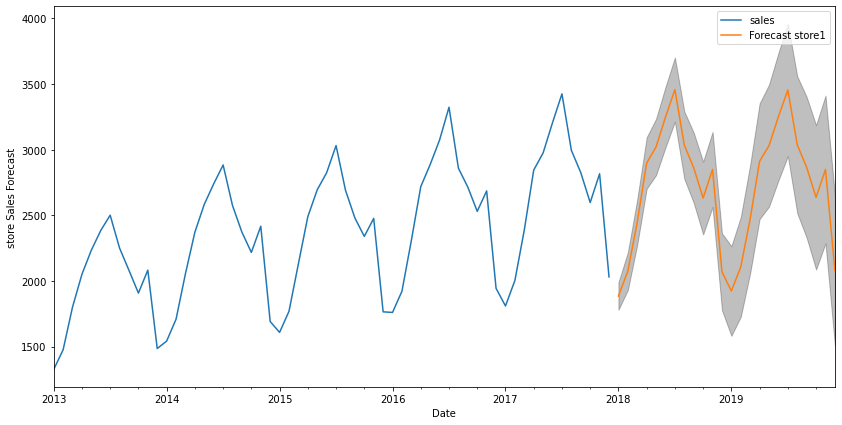

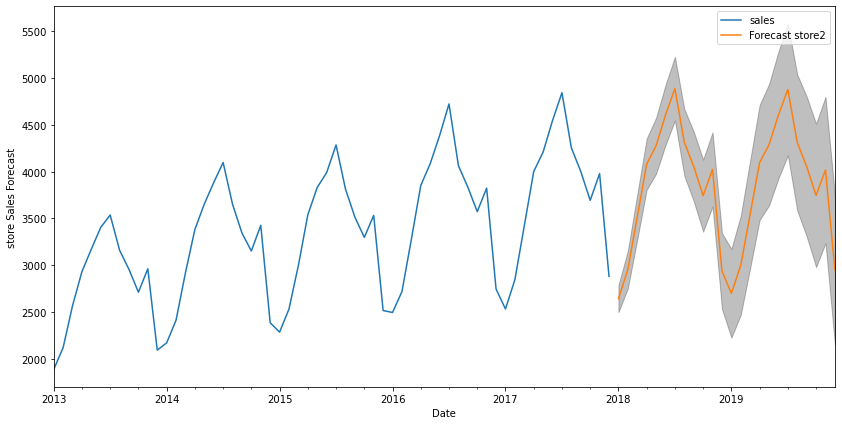

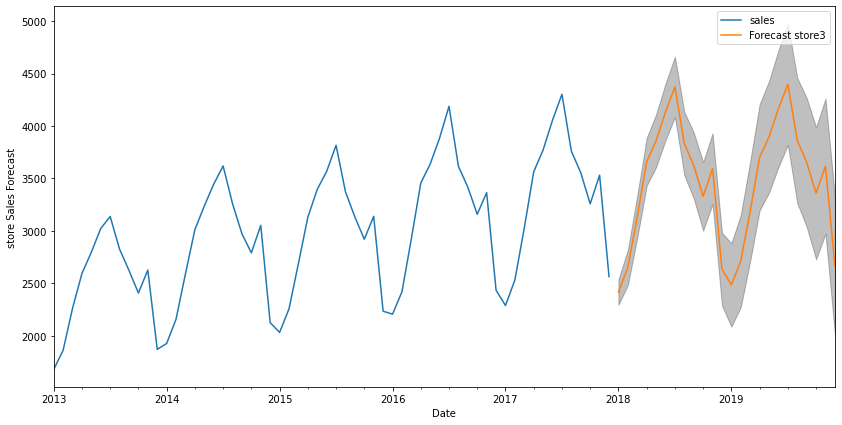

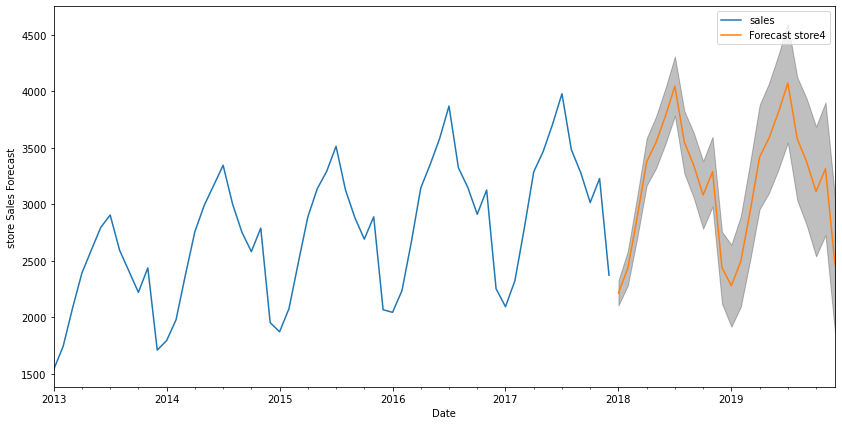

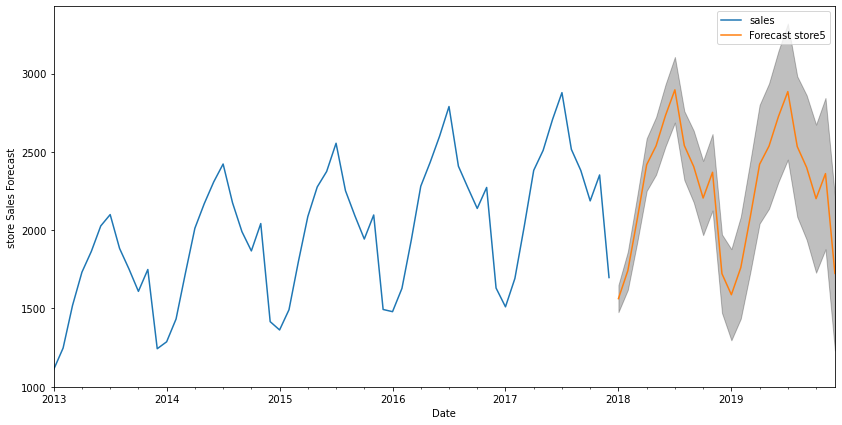

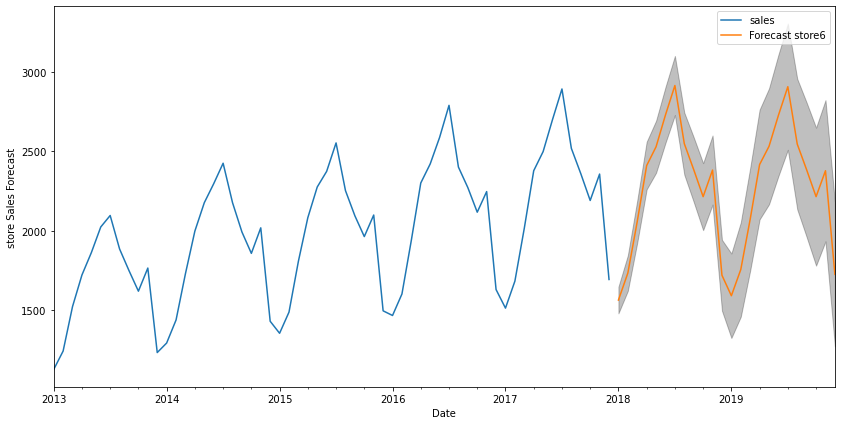

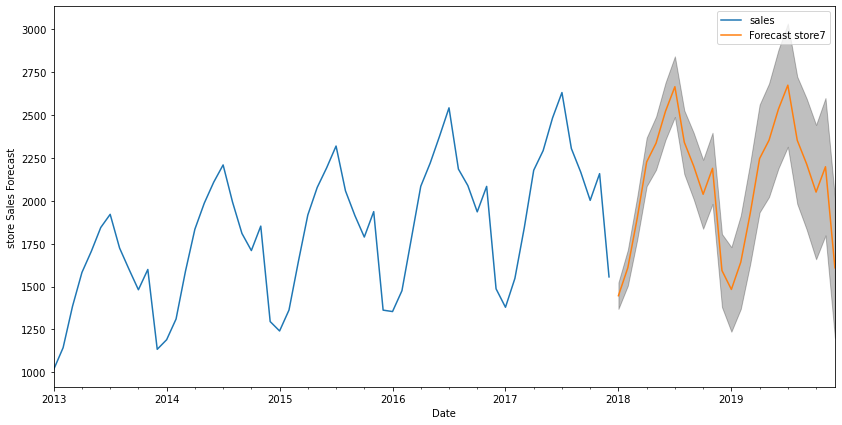

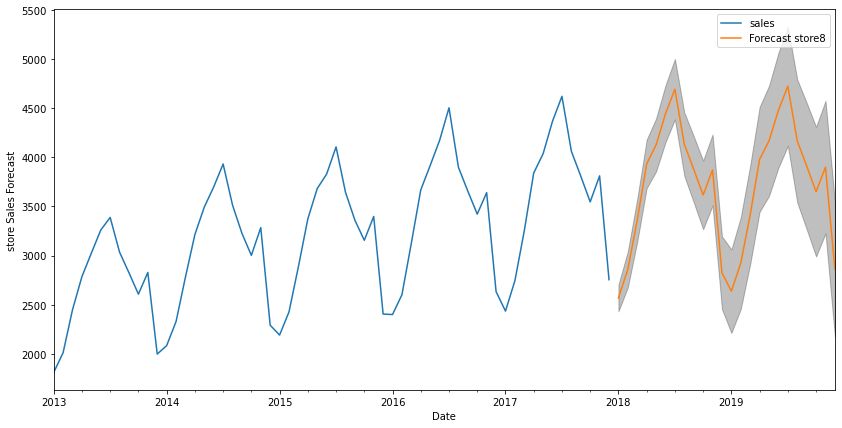

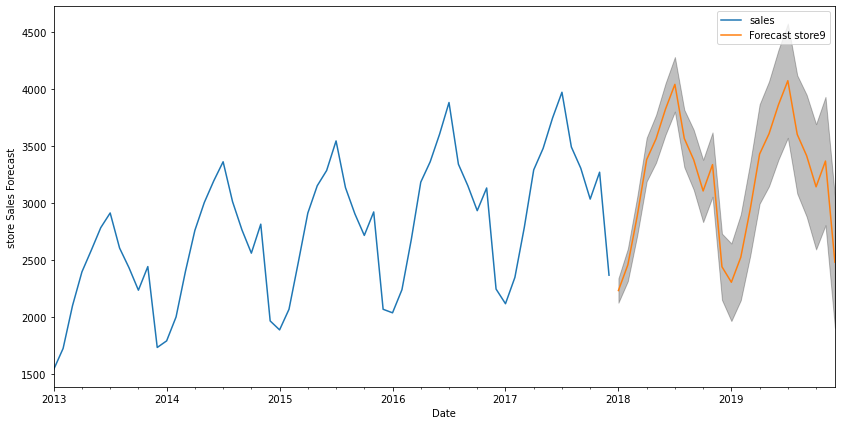

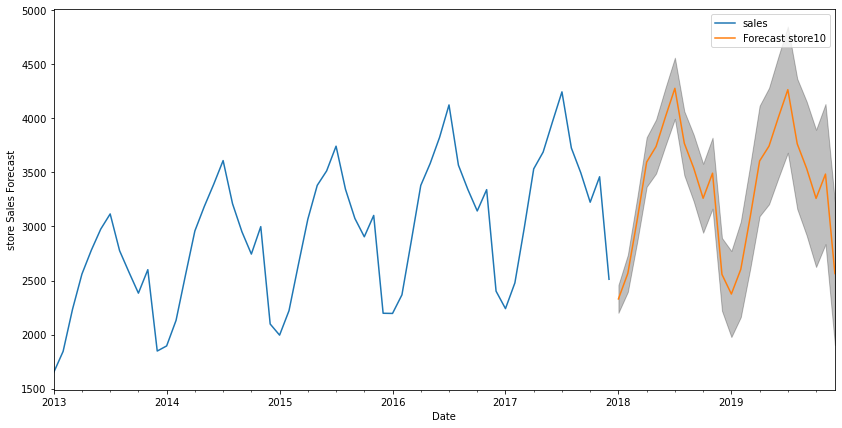

In [71]:
for i in data['store'].unique():
    store_i= data.loc[data['store'] == i]
    store_i=store_i.groupby('date')['sales'].sum().reset_index()
    store_i=store_i.set_index('date')
    store_i=store_i.sales.resample('MS').mean()
    store_i=store_i.reset_index()
    dataset = store_i.set_index('date')
    model_store_final = SARIMAX(dataset,order=(1, 0, 1),seasonal_order=(1, 0, 1, 12),enforce_invertibility=False)
    result_store_final = model_store_final.fit()
    pred_store = result_store_final.get_forecast(steps=24)
    pred_ci_store = pred_store.conf_int()
    ax = dataset.plot(label='observed',figsize=(14,7))
    pred_store.predicted_mean.plot(ax=ax,label='Forecast store'+str(i))
    ax.fill_between(pred_ci_store.index,
               pred_ci_store.iloc[:,0],
               pred_ci_store.iloc[:,1],color='k',alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('store Sales Forecast')
    plt.legend()
    plt.show()